# **A. Text SOM Training and Activate**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Make sure we don not need to restart the kernel
%load_ext autoreload
%autoreload 2

In [ ]:
!sudo apt-get update
!sudo apt-get install libenchant1c2a


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,308 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,789 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [ ]:
!sudo apt-get update
!sudo apt-get install libenchant-2-dev


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common enchant-2 hunspell-en-us libaspell15
  libblki

In [ ]:
!pip install pyenchant


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 14.5 MB/s eta 0:00:00


In [ ]:
!pip install ebooklib gensim PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 10.7 MB/s eta 0:00:00
  Created wheel for ebooklib: filename=EbookLib-0.18-py3-none-any.whl size=38778 sha256=4c363a5bd231d7c8a2458ee059774a99174df1e52d8fde1e2b9951769e4cb7eb
  Stored in directory: /root/.cache/pip/wheels/0f/38/cc/a3728bb72a315d9d8766fb71d362136372066fc25ad838f8fa
Successfully built ebooklib


In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import enchant

import pickle
from sklearn.neighbors import NearestNeighbors

In [ ]:
import glob, os, sys
import numpy as np

In [ ]:
import sys

# update the location
sys.path.append('/content/drive/MyDrive/LiteratureSim')


In [ ]:
#Import the paragrph process code
#If it do not work run that code directly
from text_model_pdfepub import TextModel

In [ ]:
import pickle

In [ ]:
NOVEL_DIR='/content/drive/MyDrive/Noveltest'
NOVEL_FILES = []
NOVEL_FILES.extend(glob.glob(os.path.join(NOVEL_DIR, '*')))

# A.1.1 LSA

In [ ]:
novel_model = TextModel(NOVEL_FILES,vectorization='lsa',min_df=3)

/usr/local/lib/python3.10/dist-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


In [ ]:
import pickle

save_path = "/content/drive/MyDrive/LiteratureSim/novel_model2.pkl"

with open(save_path, 'wb') as f:
    pickle.dump(novel_model, f)

In [ ]:
import pickle

load_path = "/content/drive/MyDrive/LiteratureSim/novel_model2.pkl"

with open(load_path, 'rb') as f:
    novel_model = pickle.load(f)


In [ ]:
#i save the processed book in the pkl file but here i train SOM based on fewer books
#with open('/content/drive/MyDrive/Literature/novel_model.pkl', 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
novel_model.search('cats', n=10)

[{'paragraph': ' When Mr Colpits’s face showed that he was going to make a remark about that, Matthew was before him: ‘We’re researchers. We’re getting a pass from the French government.’ The first annoyance. For a time no one could talk to Matthew, and everyone stayed out of his way: scientists, midshipmen and cats, even the cook.',
  'nr': 467,
  'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z-Library)',
  'type': 'epub'},
 {'paragraph': ' After three days their faces became even longer. ‘Now she takes in four inches per hour,’ the First Lieutenant said. ‘Soon we’ll need no cats. The rats will drown on their own.’* * * Madeira! John was on land again.',
  'nr': 531,
  'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z-Library)',
  'type': 'epub'},
 {'paragraph': 'Mr Fowler and Mr Samuel Flinders were lieutenants and arrogant like so many of their kind. The crew called them ‘luffs’ because they were windbags. Seventy-four men, three cats, and thirty sheep made up the ship’s populat

In [ ]:
novel_model.get_key_words(novel_model.vectorize('strong kangaroo'), n=10)

['asked',
 'think',
 'fast',
 'yet',
 'strong',
 'better',
 'word',
 'able',
 'two',
 'feel']

In [ ]:
print(novel_model.paragraphs[1234])
print(len(novel_model.paragraphs))

{'paragraph': ' But no. That’s nonsense. I don’t know any of this.’ Flora blew her nose. ‘You’re no editor. God bless you.’ She kissed him. Then he went. Heavens, he was glad to be rid of her. In his pleasure he did not even feel pity.', 'nr': 1235, 'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z-Library)', 'type': 'epub'}
4795


In [ ]:
!pip install PyMuPDF


In [ ]:
import torch
import SOM as SOMlib
import matplotlib.pyplot as plt

In [ ]:
sentences = 'Chivalry is not dead it is just not always wearing armor'

In [ ]:
# Dimensions of the SOM grid
m = 5
n = 5
# Number of training examples
# It should be equal to len(novel_model.paragraphs) but too timeconsuming
n_x = 4000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = novel_model.vector_matrix

# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

20
21
22
23
24
25


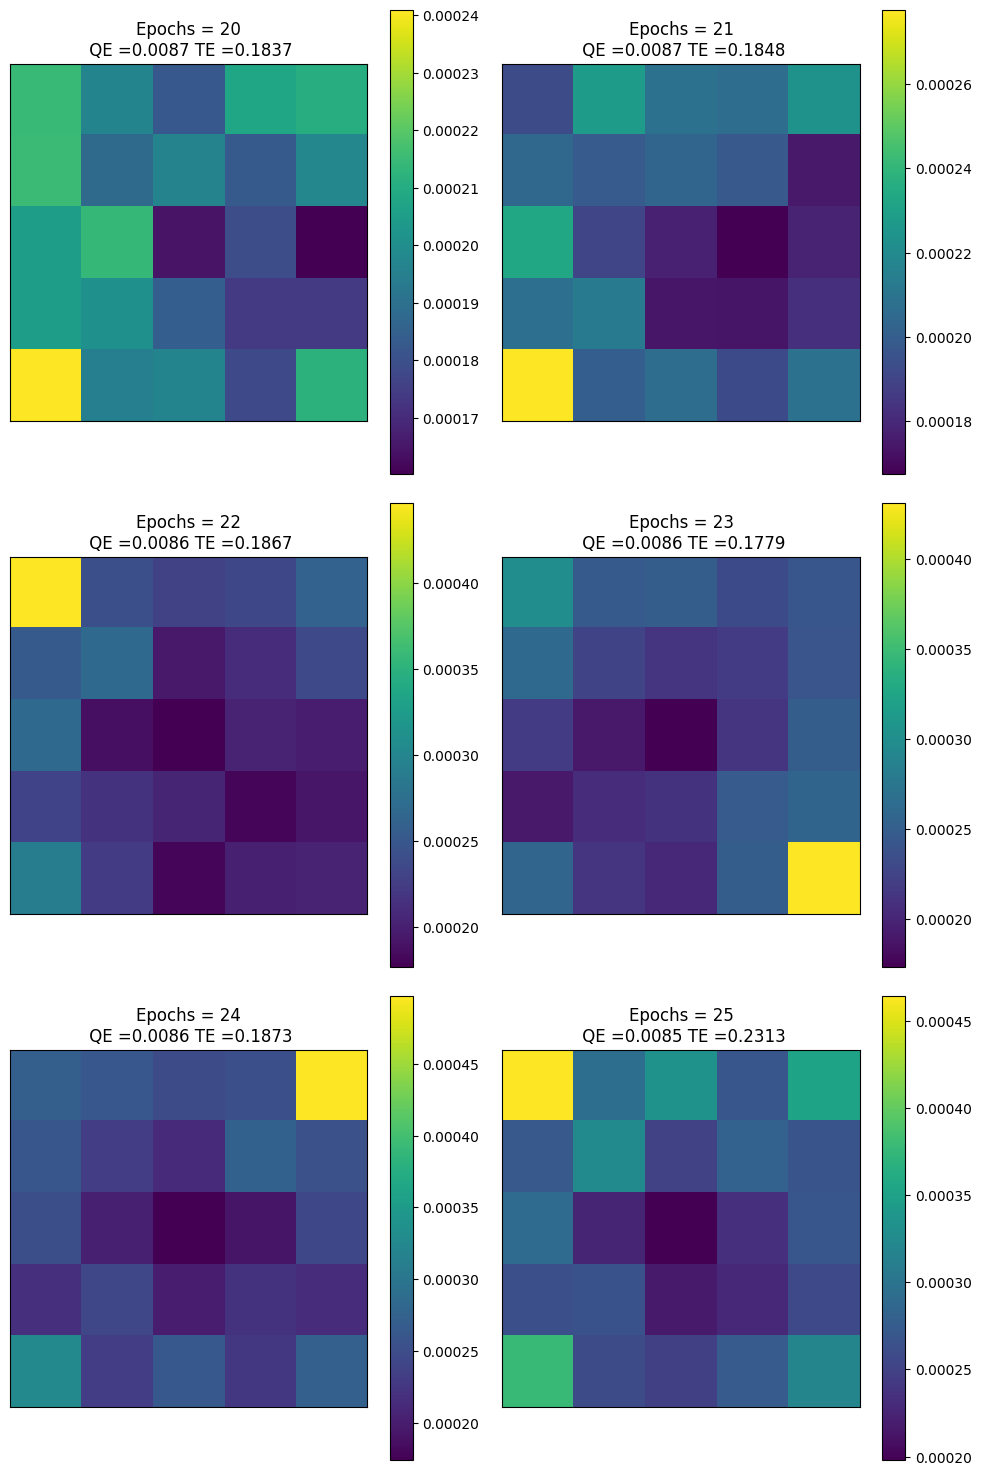

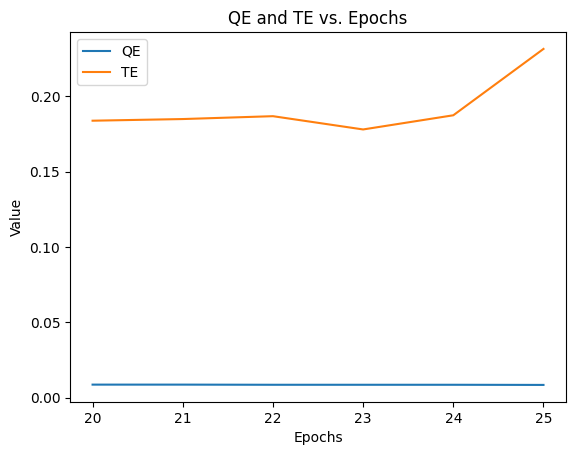

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Initialize the SOM randomly
som = rand.uniform(-0.5, 0.5, (m, n, len(train_data[0])))

num_plots = len(range(20, 26))
num_rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows for subplots
fig, ax = plt.subplots(
    nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
soms = []
qe_values = []  # Stores the QE value after each iteration
te_values = []  # Stores the TE value after each iteration
for epochs, i in zip(range(20, 26), range(20, 26)):  # Number of epochs and number of subgraphs
    print(i)
    total_epochs += epochs
    som = SOMlib.train_SOM(som, n_train_data, learn_rate=0.3, radius_sq=5, epochs=epochs)
    soms.append(som)
    QE = round(SOMlib.calculateQE(som, n_train_data), 4)
    TE = round(SOMlib.calculateTE(som, n_train_data), 4)
    qe_values.append(QE)  # Add the QE value to the list
    te_values.append(TE)


    save_path = "/content/drive/MyDrive/pickle_files/"
    with open(save_path + f'som_epochs_{epochs}.pkl', 'wb') as f:
        pickle.dump(som, f)

    row = (i - 20) // 2  # Calculates the row index of the subgraph
    col = (i - 20) % 2   # Calculates the column index of the subgraph
    im = ax[row, col].imshow(SOMlib.u_matrix(som))
    ax[row, col].title.set_text('Epochs = ' + str(epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))
    fig.colorbar(im, ax=ax[row, col])

plt.tight_layout()  # prevent overlap

# Draw a line chart of changes
plt.figure()
plt.plot(range(20, 26), qe_values, label='QE')
plt.plot(range(20, 26), te_values, label='TE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('QE and TE vs. Epochs')
plt.legend()
plt.show()


In [ ]:
import pickle

# Load pickle file
som_file_path = "/content/drive/MyDrive/pickle_files/som_epochs_23.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)

In [ ]:
# OR
# SOM = soms[-3]

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

start_color = (0, 148, 148)  # blue
middle_color = (241, 235, 201)
end_color = (209, 87, 127)     # red

# Map RGB values from 0-255 to 0-1
start_color = tuple(map(lambda x: x / 255, start_color))
middle_color = tuple(map(lambda x: x / 255, middle_color))
end_color = tuple(map(lambda x: x / 255, end_color))

# Defines the color of the color map
colors = [start_color, middle_color, end_color]

cmap_diverging = LinearSegmentedColormap.from_list('my_cmap', colors)


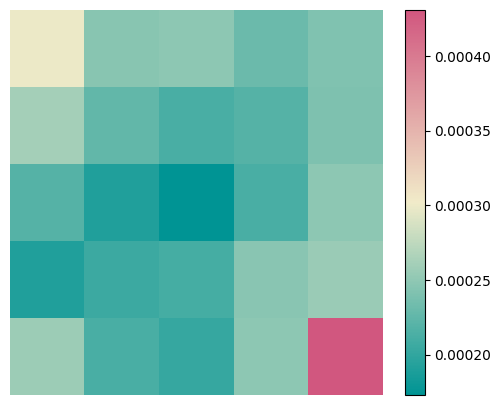

In [ ]:
SOM = soms

from matplotlib import cm
u_matrix_values = SOMlib.u_matrix(SOM)


plt.figure(figsize=(6, 5))
cmap = cm.viridis
im = plt.imshow(u_matrix_values, cmap=cmap_diverging, aspect='auto')


plt.axis('off')
plt.colorbar()
plt.savefig('/content/drive/MyDrive/pickle_files/som_plain_0504.png')
plt.show()

In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(novel_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

# A.1.2 TFIIDF VS LSA

In [ ]:
import pickle

load_path = "/content/drive/MyDrive/LiteratureSim/novel_model2.pkl"

with open(load_path, 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
novel_model.search('Once we dreamt that we were strangers. We wake up to find that we were dear to each other. ', n=10)

[{'paragraph': " Once I looked around mid-lesson and could not find Alberto at all. I remembered that he had been waving at me, calling out to me about dynamics, but now I could not find him. The balcony was empty. I hadn't heard the front door close. Yet it had—with a slam, he told me later. In a pique, he had left for the café.",
  'nr': 344,
  'ID': 'The Spanish Bow (Romano-Lax, Andromeda) (Z-Library)',
  'type': 'epub'},
 {'paragraph': ' "Besides," I said, searching the rumpled bedclothes for my trousers, "she\'s not likely to find a husband. There are complicating factors." "Previously married?" "No." "Ruined reputation? Non-Catholic?"',
  'nr': 1673,
  'ID': 'The Spanish Bow (Romano-Lax, Andromeda) (Z-Library)',
  'type': 'epub'},
 {'paragraph': '‘It’ll do them harm in any event,’ Back suggested casually. ‘Let’s just hope they don’t find out while we depend on them.’The briefest sentence of all was spoken by Hepburn, a Scotsman from near Edinburgh.',
  'nr': 1435,
  'ID': 'The Di

In [ ]:
novel_modelT = TextModel(NOVEL_FILES,vectorization='tfidf',min_df=3)

/usr/local/lib/python3.10/dist-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


In [ ]:
novel_modelT.search('Once we dreamt that we were strangers. We wake up to find that we were dear to each other. ', n=10)

[{'paragraph': ' The men clutched at whatever was handy; no one stirred any more. The next big wave, the same. The ship was lost.John Franklin seemed stranger and stranger. Now he grabbed his left shoulder with his right hand, held it tight and pulled it with all his might.',
  'nr': 1365,
  'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z-Library)',
  'type': 'epub'},
 {'paragraph': '  A man squeezed past our chairs and Aviva tapped a spoon against the table nervously, waiting for the stranger to pass. Before I could continue, she said, "You\'re much more talkative when your partner isn\'t around."',
  'nr': 1555,
  'ID': 'The Spanish Bow (Romano-Lax, Andromeda) (Z-Library)',
  'type': 'epub'},
 {'paragraph': ' "Morocco," he sighed. "You know, when they have sandstorms in Africa, we wake up to yellow grit in our sheets. It\'s not that far, really." I tilted my face toward the sun and closed my eyes. "Justo, please listen to what I\'m saying. We\'d like your help."',
  'nr': 1915,
  

# A.1.3 Doc2Vec (test)

In [ ]:
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import matplotlib.pyplot as plt
import pickle
import SOM as SOMlib


Training SOM for 20 epochs
Training SOM for 21 epochs
Training SOM for 22 epochs
Training SOM for 23 epochs
Training SOM for 24 epochs
Training SOM for 25 epochs


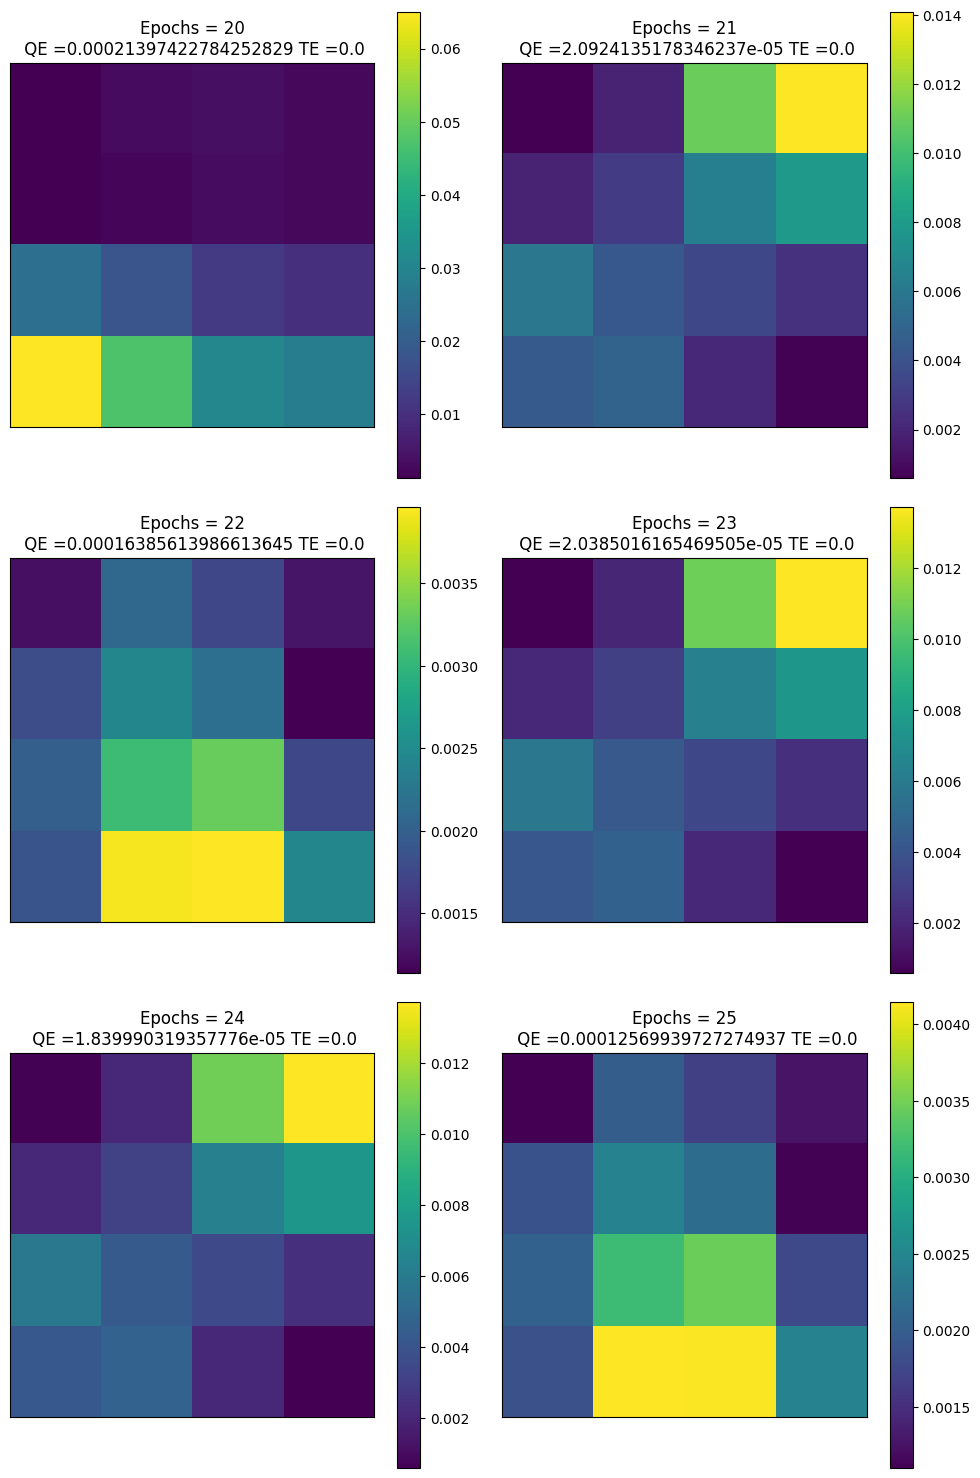

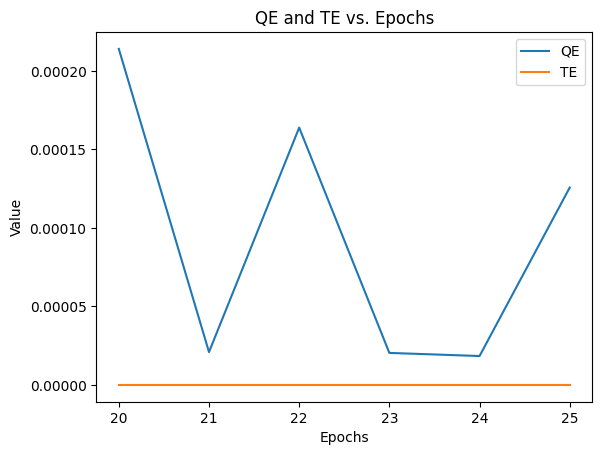

In [ ]:
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
import numpy as np


folder_path = '/content/drive/MyDrive/Noveltest'

# vectorize
tagged_docs = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        with open(file_path, 'r', encoding='latin-1') as f:
            text = f.read()
            tagged_docs.append(TaggedDocument(words=text.split(), tags=[file]))

# Train the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_docs)
doc2vec_model.train(tagged_docs, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Gets vectorized documents
doc_vectors = [doc2vec_model.dv[tag] for tag in doc2vec_model.dv.index_to_key]


epochs_list = [20, 21, 22, 23, 24, 25]
num_plots = len(epochs_list)
num_rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows for subplots
fig, ax = plt.subplots(
    nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows),
    subplot_kw=dict(xticks=[], yticks=[]))


qe_values = []
te_values = []

for epochs, i in zip(epochs_list, range(num_plots)):  # Number of epochs and number of subgraphs
    print("Training SOM for", epochs, "epochs")
    # Initialize
    m, n = 4, 4
    rand = np.random.RandomState(0)
    som = rand.uniform(-0.5, 0.5, (m, n, len(doc_vectors[0])))


    learn_rate = 0.3
    radius_sq = 5
    som = SOMlib.train_SOM(som, doc_vectors, learn_rate=learn_rate, radius_sq=radius_sq, epochs=epochs)


    QE = SOMlib.calculateQE(som, doc_vectors)
    TE = SOMlib.calculateTE(som, doc_vectors)
    qe_values.append(QE)
    te_values.append(TE)

    # Shows the trained SOM in the subgraph
    row = i // 2
    col = i % 2
    im = ax[row, col].imshow(SOMlib.u_matrix(som))
    ax[row, col].title.set_text('Epochs = ' + str(epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))
    fig.colorbar(im, ax=ax[row, col])

plt.tight_layout()  # prevent overlap
plt.show()

# Draw the line chart of the changes of QE and TE with epochs
plt.figure()
plt.plot(epochs_list, qe_values, label='QE')
plt.plot(epochs_list, te_values, label='TE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('QE and TE vs. Epochs')
plt.legend()
plt.show()


# A.2.1 Fit PCA on all cells

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
with open('/content/drive/MyDrive/pickle_files/som_epochs_20.pkl', 'rb') as f:
    loaded_text_som_model = pickle.load(f)

In [ ]:
def normalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    normalised_p = (p-min_d)/(max_d - min_d)
    return normalised_p

In [ ]:
som_height, som_width, vector_dimension = loaded_text_som_model.shape
num_nodes = som_height * som_width

flattened_som = loaded_text_som_model.reshape(num_nodes, vector_dimension)

pca = PCA(n_components=3)
colourComponents = pca.fit_transform(flattened_som)

In [ ]:
colourComponents=normalise(colourComponents,colourComponents)

rgb_values = (colourComponents * 255).astype(int)

som_colors = np.zeros((som_height, som_width, 3), dtype=np.uint8)

for i in range(som_height):
    for j in range(som_width):
        node_idx = i * som_width + j
        som_colors[i, j] = rgb_values[node_idx]

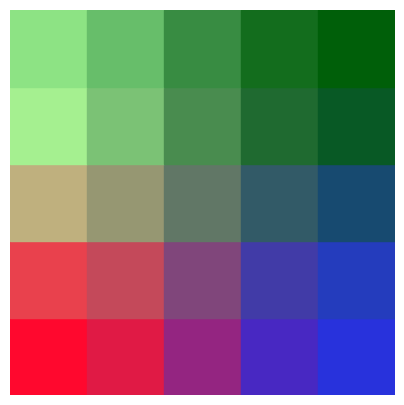

In [ ]:
fig, ax = plt.subplots(figsize=(som_width, som_height))

for i in range(som_height):
    for j in range(som_width):
        color = som_colors[i, j] / 255.0
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

ax.set_xlim(0, som_width)
ax.set_ylim(0, som_height)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

# A.2.2 Fit PCA on the entire training

In [ ]:
#with open('/content/drive/MyDrive/LiteratureSim/novel_model.pkl', 'wb') as f:
    pickle.dump(novel_model, f)

In [ ]:
#i save the processed book in the pkl file
#with open('/content/drive/MyDrive/LiteratureSim/novel_model.pkl', 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
novel_model = TextModel(NOVEL_FILES,vectorization='lsa',min_df=3)

/usr/local/lib/python3.10/dist-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


In [ ]:
pca = PCA(n_components=3)
colourComponents = pca.fit_transform(novel_model.vector_matrix)

In [ ]:
som_height, som_width, vector_dimension = loaded_text_som_model.shape
num_nodes = som_height * som_width

flattened_som = loaded_text_som_model.reshape(num_nodes, vector_dimension)

In [ ]:
colourComponents = pca.transform(flattened_som)

In [ ]:
colourComponents=normalise(colourComponents,colourComponents)

rgb_values = (colourComponents * 255).astype(int)

som_colors = np.zeros((som_height, som_width, 3), dtype=np.uint8)

for i in range(som_height):
    for j in range(som_width):
        node_idx = i * som_width + j
        som_colors[i, j] = rgb_values[node_idx]

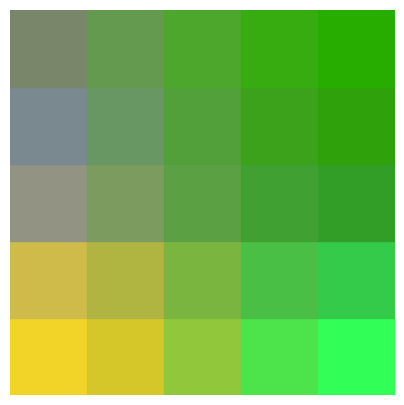

In [ ]:
fig, ax = plt.subplots(figsize=(som_width, som_height))

for i in range(som_height):
    for j in range(som_width):
        color = som_colors[i, j] / 255.0
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

ax.set_xlim(0, som_width)
ax.set_ylim(0, som_height)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

# A.3  Map unit content

In [ ]:
!apt-get install -y fonts-arphic-ukai

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-arphic-ukai
0 upgraded, 1 newly installed, 0 to remove and 44 not upgraded.
Need to get 8,373 kB of archives.
After this operation, 17.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-arphic-ukai all 0.2.20080216.2-5 [8,373 kB]
Fetched 8,373 kB in 1s (7,487 kB/s)
Selecting previously unselected package fonts-arphic-ukai.
(Reading database ... 122994 files and directories currently installed.)
Preparing to unpack .../fonts-arphic-ukai_0.2.20080216.2-5_all.deb ...
Unpacking fonts-arphic-ukai (0.2.20080216.2-5) ...
Setting up fonts-arphic-ukai (0.2.20080216.2-5) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


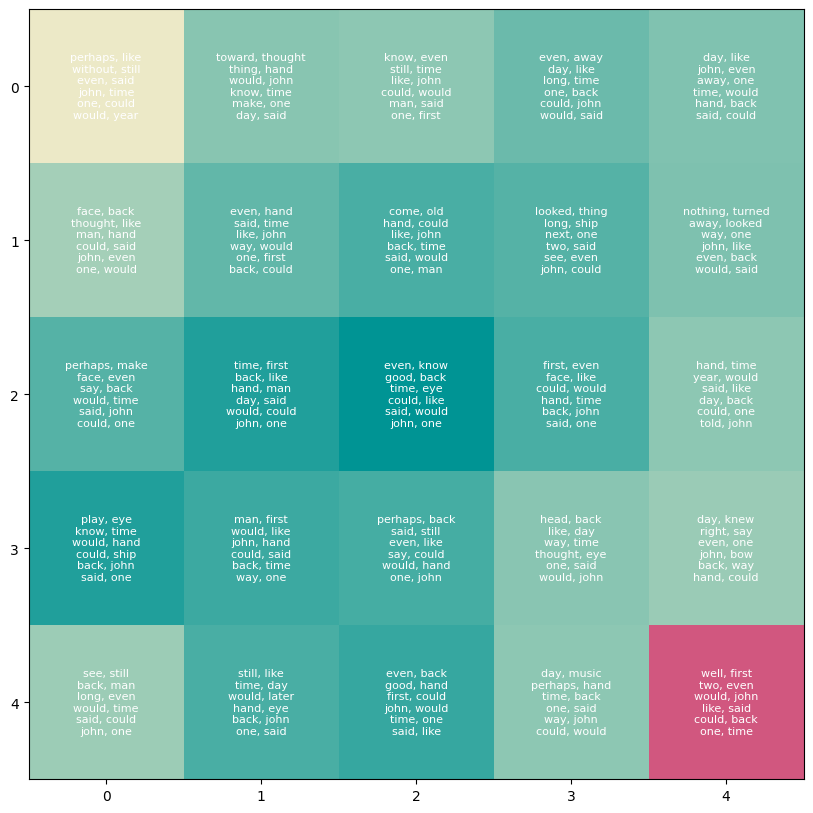

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

# Visualize the SOM with word labels
fig, ax = plt.subplots(figsize=(10, 10))

# Display U matrix
im = ax.imshow(u_matrix_values, cmap=cmap_diverging, aspect='auto')

# Traverse the neuronal unit mapping dictionary
for (i, j), words_list in neuron_word_mapping.items():
    # Make sure the word list is not empty
    if words_list:
        # Gets all paragraph text for the unit
        paragraphs = [word["paragraph"] for word in words_list]
        # Merge all paragraph text into a single string
        combined_text = ' '.join(paragraphs)
        # Use the novel_model.get_key_words() function to extract keywords
        keywords = novel_model.get_key_words(novel_model.vectorize(combined_text), n=12)
        # Divide the keywords into two lines
        num_words = len(keywords)
        if num_words > 0:
            line1 = ', '.join(keywords[:2])
        else:
            line1 = ''
        if num_words > 2:
            line2 = ', '.join(keywords[2:4])
        else:
            line2 = ''
        if num_words > 4:
            line3 = ', '.join(keywords[4:6])
        else:
            line3 = ''
        if num_words > 6:
            line4 = ', '.join(keywords[6:8])
        else:
            line4 = ''
        if num_words > 8:
            line5 = ', '.join(keywords[8:10])
        else:
            line5 = ''
        if num_words > 10:
            line6 = ', '.join(keywords[10:])
        else:
            line6 = ''

        # Display the keyword in the cell position, set the text color to white, and set the size to 6
        ax.text(j, i, f"{line1}\n{line2}\n{line3}\n{line4}\n{line5}\n{line6}", ha='center', va='center', color='white', fontsize=8)



plt.savefig('som_keywords.png', dpi=300)
plt.savefig('/content/drive/MyDrive/pickle_files/som_keyword_0318.png')
plt.show()


# A.4 Activate text SOM with different input

# A.4.1 Input text

In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/pickle_files/som_epochs_23.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
import pickle

load_path = "/content/drive/MyDrive/LiteratureSim/novel_model2.pkl"

with open(load_path, 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
# Initialize the training data
train_data = novel_model.vector_matrix
# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

start_color = (0, 148, 148)  # blue
middle_color = (241, 235, 201)
end_color = (209, 87, 127)     # red

# Map RGB values from 0-255 to 0-1
start_color = tuple(map(lambda x: x / 255, start_color))
middle_color = tuple(map(lambda x: x / 255, middle_color))
end_color = tuple(map(lambda x: x / 255, end_color))

# Define the color of the color map
colors = [start_color, middle_color, end_color]

# Create a color mapping object
cmap_diverging = LinearSegmentedColormap.from_list('my_cmap', colors)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(novel_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

In [ ]:
save_dir = '/content/drive/MyDrive/pickle_files/activated_folder'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
#Get a list of keyword
bir_list = novel_model.get_key_words(novel_model.vectorize('Happy birthday!'), n=10)
print(bir_list)

['new', 'school', 'old', 'story', 'child', 'anything', 'make', 'voice', 'happy', 'captain']


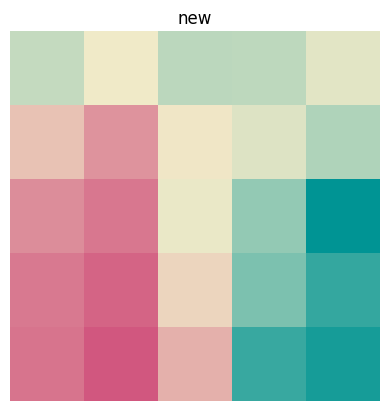

The coordinates of the first five units that match best: [(4, 1), (3, 1), (4, 0), (2, 1), (3, 0)]


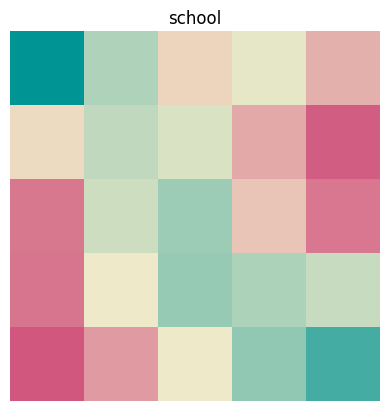

The coordinates of the first five units that match best: [(4, 0), (1, 4), (3, 0), (2, 4), (2, 0)]


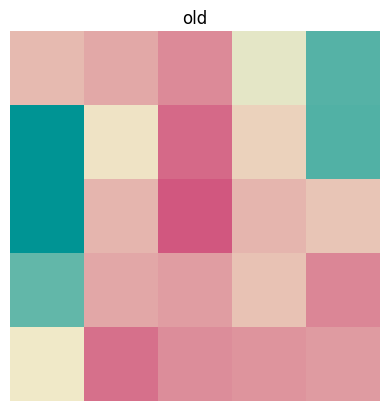

The coordinates of the first five units that match best: [(2, 2), (1, 2), (4, 1), (3, 4), (0, 2)]


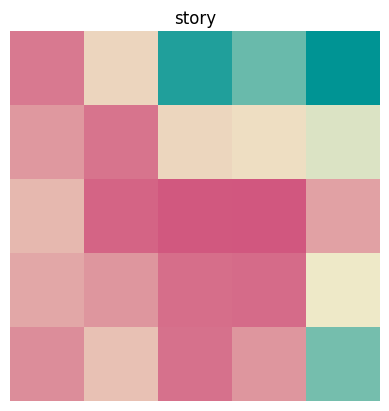

The coordinates of the first five units that match best: [(2, 3), (2, 2), (2, 1), (3, 3), (3, 2)]


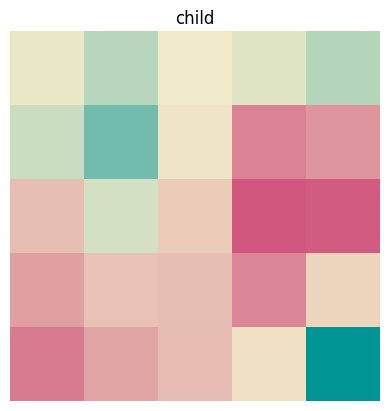

The coordinates of the first five units that match best: [(2, 3), (2, 4), (4, 0), (1, 3), (3, 3)]


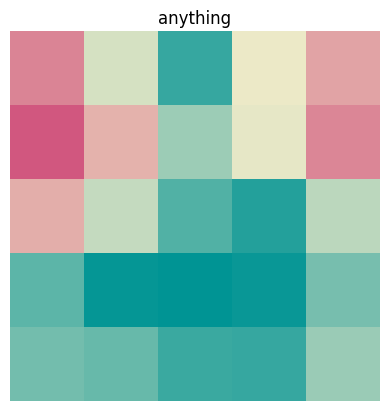

The coordinates of the first five units that match best: [(1, 0), (0, 0), (1, 4), (0, 4), (2, 0)]


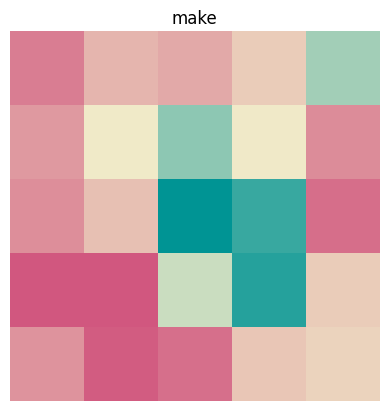

The coordinates of the first five units that match best: [(3, 0), (3, 1), (4, 1), (2, 4), (4, 2)]


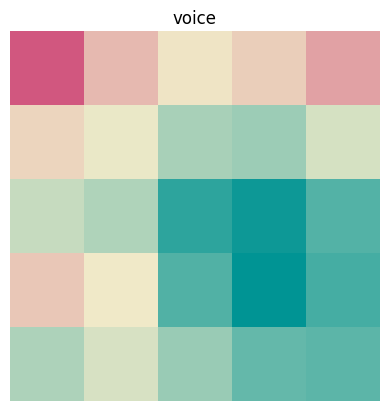

The coordinates of the first five units that match best: [(0, 0), (0, 4), (0, 1), (3, 0), (0, 3)]


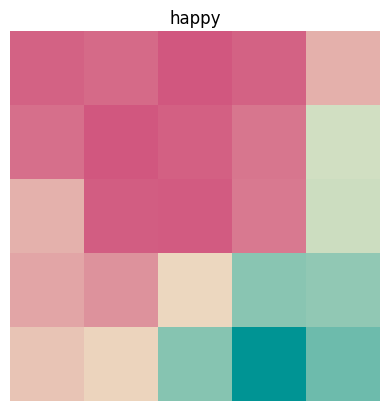

The coordinates of the first five units that match best: [(1, 1), (0, 2), (2, 2), (2, 1), (1, 2)]


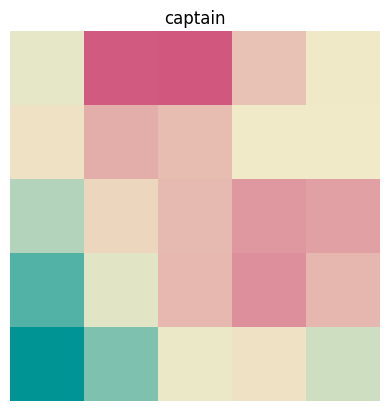

The coordinates of the first five units that match best: [(0, 2), (0, 1), (3, 3), (2, 3), (2, 4)]


In [ ]:
import numpy as np

for sentence in bir_list:
  vectorized_sentence = novel_model.vectorize(sentence)
  vectorized_sentence = np.squeeze(vectorized_sentence)

  activated_SOM = SOMlib.activate(SOM, vectorized_sentence)

  top_five_indices = np.argsort(activated_SOM.flatten())[-5:][::-1]

  top_five_coordinates = [(index // activated_SOM.shape[1], index % activated_SOM.shape[1]) for index in top_five_indices]

  plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
  plt.title(sentence)
  plt.axis('off')

  save_path = os.path.join(save_dir, f'{sentence}.png')
  plt.savefig(save_path)

  plt.show()
  print("The coordinates of the first five units that match best:", top_five_coordinates)

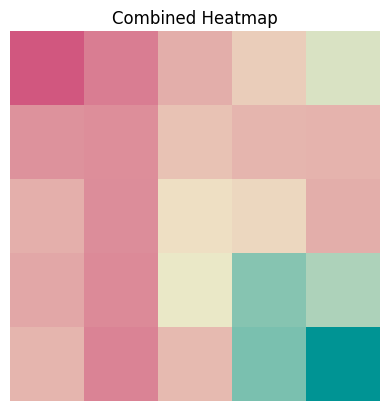

In [ ]:
import numpy as np

# Initialize a comprehensive heat map
combined_heatmap = np.zeros_like(activated_SOM)

# Merge all SOM activation results
for sentence in bir_list:
    vectorized_sentence = novel_model.vectorize(sentence)
    vectorized_sentence = np.squeeze(vectorized_sentence)

    activated_SOM = SOMlib.activate(SOM, vectorized_sentence)

    # The activation results are added to a comprehensive heat map
    combined_heatmap += activated_SOM

# Averaging
combined_heatmap /= len(bir_list)

# Visual integrated heat map
plt.imshow(combined_heatmap, cmap=cmap_diverging, interpolation='none')
plt.title("Combined Heatmap")
plt.axis('off')

save_path = os.path.join(save_dir, f'Combined Heatmap.png')
plt.savefig(save_path)
plt.show()


Top 1 - Index: (4, 1), Content:  He had to try hard to become a good catcher. He was from Ing Ming. Five years old, he was the youngest. ‘I’ve got to watch like hawk,’ Sherard used to say – not ‘like a hawk’ but ‘like hawk’, without the ‘a’, and as he said that his eyes would become very serious and still, like a watchful animal’s, to show what he meant.
Top 2 - Index: (3, 1), Content:  ‘… the true time is 8:24 p.m.?’ Groaning, he tried to work out the angles in his head. Now whatever was inside him came up. So spheric trigonometry didn’t help, either. The brain couldn’t outsmart the belly, that woeful traveller.
Top 3 - Index: (4, 0), Content:  For that reason this tar thinks he knows a lot about painting.’The next day the quarrel started up again. The commodore seemed to like nothing better than to throw the artist into confusion. ‘Painting fear or the arbitrariness of eyesight? Why not just blindness? I have sixty years of fear and arbitrariness behind me.
Top 4 - Index: (2, 1), Con

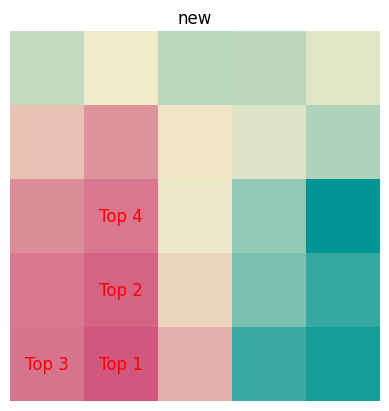

Top 1 - Index: (4, 0), Content:  For that reason this tar thinks he knows a lot about painting.’The next day the quarrel started up again. The commodore seemed to like nothing better than to throw the artist into confusion. ‘Painting fear or the arbitrariness of eyesight? Why not just blindness? I have sixty years of fear and arbitrariness behind me.
Top 2 - Index: (1, 4), Content:  The most distant mountains, like himself, just stood there and gazed.He looked forward to the horses less than to the people he knew, even to the host of the Red Lion in Baumber. They usually made a stop there.
Top 3 - Index: (3, 0), Content:  People who can’t fight, yet expect to be fed, will become a burden on the community. One could see that in Sherard’s parents, and they weren’t even slow. Perhaps he could get work spinning, perhaps field work with a bent back.
Top 4 - Index: (2, 4), Content:  John sat up in bed, hands on his knees, letting his tongue examine the wound left by his lost tooth, in order 

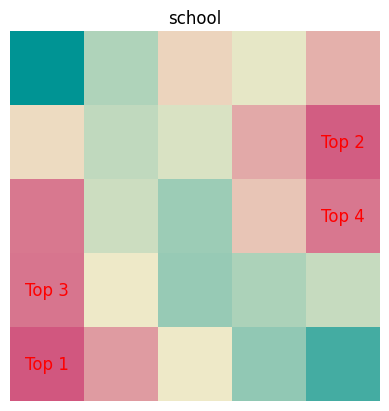

Top 1 - Index: (2, 2), Content:  Sherard Philip Lound was little, but he was John Franklin’s friend.Now John considered the clock of St James’s. Its face was painted on stone, on the side of the thick tower. It had only one hand, and that had to be pushed forward three times a day.
Top 2 - Index: (1, 2), Content:  John had overheard a remark which had connected him with this stubborn clockwork. He hadn’t understood it, but he had felt ever since that the clock had something to do with him.Inside the church, Sir Peregrine Bertie, the marble knight, had been standing for more than a century surveying the congregation, his hand on the hilt of his sword.
Top 3 - Index: (4, 1), Content:  He had to try hard to become a good catcher. He was from Ing Ming. Five years old, he was the youngest. ‘I’ve got to watch like hawk,’ Sherard used to say – not ‘like a hawk’ but ‘like hawk’, without the ‘a’, and as he said that his eyes would become very serious and still, like a watchful animal’s, to show

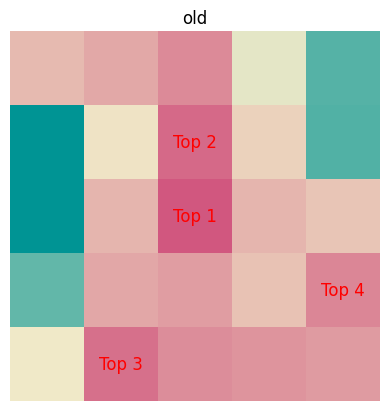

Top 1 - Index: (2, 3), Content:  He held it as firmly as the tree, and he didn’t drop his arm until the end of the game. He was suited to be a rope-holder as no other child was in Spilsby, or even in all of Lincolnshire. The clerk looked over from the Town Hall.
Top 2 - Index: (2, 2), Content:  Sherard Philip Lound was little, but he was John Franklin’s friend.Now John considered the clock of St James’s. Its face was painted on stone, on the side of the thick tower. It had only one hand, and that had to be pushed forward three times a day.
Top 3 - Index: (2, 1), Content:  ‘Give it to him, then he’ll wake up.’ ‘He won’t do nothin’. He just stares.’ And somewhere, in the midst of it, there was always Tom Barker, watching from beneath lowered eyelids. John had to open his eyes wide to catch everything, for the other boy constantly changed his position.
Top 4 - Index: (3, 3), Content: A blip streaked across John’s vision. If he looked up to the hotel chimney, it perched in the uppermost wi

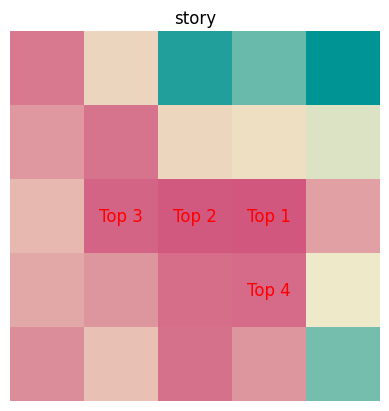

Top 1 - Index: (2, 3), Content:  He held it as firmly as the tree, and he didn’t drop his arm until the end of the game. He was suited to be a rope-holder as no other child was in Spilsby, or even in all of Lincolnshire. The clerk looked over from the Town Hall.
Top 2 - Index: (2, 4), Content:  John sat up in bed, hands on his knees, letting his tongue examine the wound left by his lost tooth, in order to think better. So he had to study being quick the way other people studied the Bible or deer tracks.
Top 3 - Index: (4, 0), Content:  For that reason this tar thinks he knows a lot about painting.’The next day the quarrel started up again. The commodore seemed to like nothing better than to throw the artist into confusion. ‘Painting fear or the arbitrariness of eyesight? Why not just blindness? I have sixty years of fear and arbitrariness behind me.
Top 4 - Index: (1, 3), Content:  Sleeping? His arm hadn’t moved; the rope was taut. What was there for Tom to pick at? The game went on. J

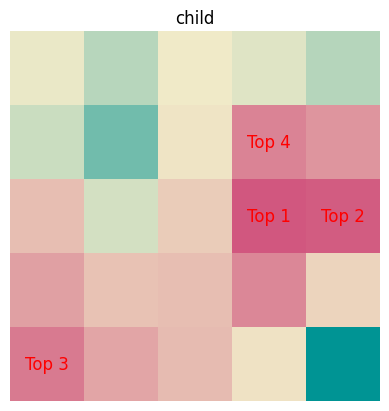

Top 1 - Index: (1, 0), Content:  Careful now! If he answered hastily he’d stutter and choke; that would bother his listeners. On the other hand, Dr Orme had made it clear during the first week once and for all that ‘When somebody says something that’s correct, he has no need to look good.
Top 2 - Index: (0, 0), Content:  Too often something was expected if he said yes. But if he said no, they pounced on him even more. Why no? Reasons! No without a reason was even more quickly exposed than an unfounded yes.I don’t want to make anyone believe anything, he thought.
Top 3 - Index: (1, 4), Content:  The most distant mountains, like himself, just stood there and gazed.He looked forward to the horses less than to the people he knew, even to the host of the Red Lion in Baumber. They usually made a stop there.
Top 4 - Index: (0, 4), Content:  How did they get it over the antlers? Surely, that again was a question nobody would want to answer. To the left of the stag one could read ‘Dinners and T

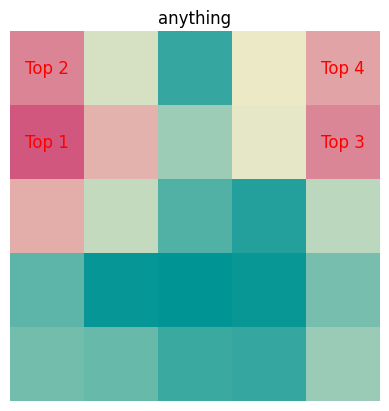

Top 1 - Index: (3, 0), Content:  People who can’t fight, yet expect to be fed, will become a burden on the community. One could see that in Sherard’s parents, and they weren’t even slow. Perhaps he could get work spinning, perhaps field work with a bent back.
Top 2 - Index: (3, 1), Content:  ‘… the true time is 8:24 p.m.?’ Groaning, he tried to work out the angles in his head. Now whatever was inside him came up. So spheric trigonometry didn’t help, either. The brain couldn’t outsmart the belly, that woeful traveller.
Top 3 - Index: (4, 1), Content:  He had to try hard to become a good catcher. He was from Ing Ming. Five years old, he was the youngest. ‘I’ve got to watch like hawk,’ Sherard used to say – not ‘like a hawk’ but ‘like hawk’, without the ‘a’, and as he said that his eyes would become very serious and still, like a watchful animal’s, to show what he meant.
Top 4 - Index: (2, 4), Content:  John sat up in bed, hands on his knees, letting his tongue examine the wound left by h

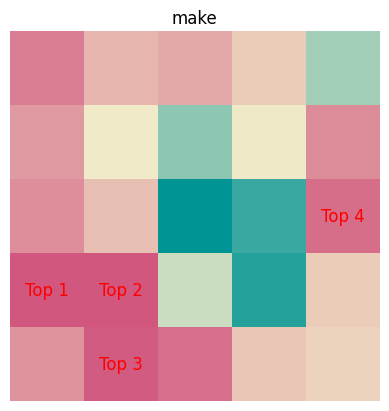

Top 1 - Index: (0, 0), Content:  Too often something was expected if he said yes. But if he said no, they pounced on him even more. Why no? Reasons! No without a reason was even more quickly exposed than an unfounded yes.I don’t want to make anyone believe anything, he thought.
Top 2 - Index: (0, 4), Content:  How did they get it over the antlers? Surely, that again was a question nobody would want to answer. To the left of the stag one could read ‘Dinners and Teas’, and to the right ‘Ales, Wines, Spirits’.
Top 3 - Index: (0, 1), Content:  Evening came.Knowing about the sea was called navigation. John repeated that word several times after Matthew. It meant stars, instruments and careful thought. That pleased him. He said, ‘I’d like to learn how to set sails.
Top 4 - Index: (3, 0), Content:  People who can’t fight, yet expect to be fed, will become a burden on the community. One could see that in Sherard’s parents, and they weren’t even slow. Perhaps he could get work spinning, perhaps

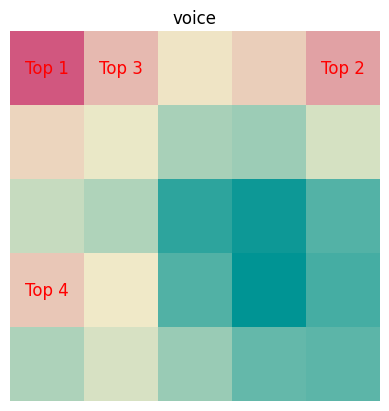

Top 1 - Index: (1, 1), Content:  He was eager to know about the strange world beyond, and his plans were well thought out.In a narrow drainage ditch he waded as far as the stream Lymn. They’d think he had gone in the direction of Horncastle and not of the sea.
Top 2 - Index: (0, 2), Content:  He wore a cockade on his hat, like all naval officers on shore. The two nodded in his direction, said something to each other, and stood still. To avoid staring at them, John studied the white stag lying on top of the protruding bay window, the gold crown round its neck.
Top 3 - Index: (2, 2), Content:  Sherard Philip Lound was little, but he was John Franklin’s friend.Now John considered the clock of St James’s. Its face was painted on stone, on the side of the thick tower. It had only one hand, and that had to be pushed forward three times a day.
Top 4 - Index: (2, 1), Content:  ‘Give it to him, then he’ll wake up.’ ‘He won’t do nothin’. He just stares.’ And somewhere, in the midst of it, there 

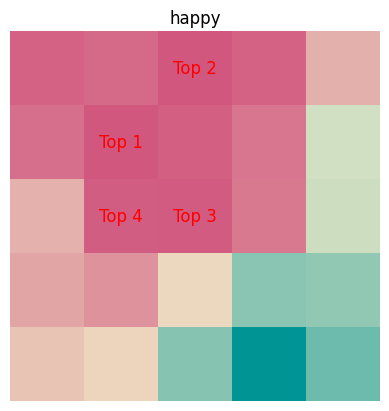

Top 1 - Index: (0, 2), Content:  He wore a cockade on his hat, like all naval officers on shore. The two nodded in his direction, said something to each other, and stood still. To avoid staring at them, John studied the white stag lying on top of the protruding bay window, the gold crown round its neck.
Top 2 - Index: (0, 1), Content:  Evening came.Knowing about the sea was called navigation. John repeated that word several times after Matthew. It meant stars, instruments and careful thought. That pleased him. He said, ‘I’d like to learn how to set sails.
Top 3 - Index: (3, 3), Content: A blip streaked across John’s vision. If he looked up to the hotel chimney, it perched in the uppermost window. If he fixed on the window’s crossbars, it slithered down to the hotel sign. That’s how it jerked farther and farther down as he lowered his glance, but up it went again with a sneer when he looked at the sky.
Top 4 - Index: (2, 3), Content:  He held it as firmly as the tree, and he didn’t drop

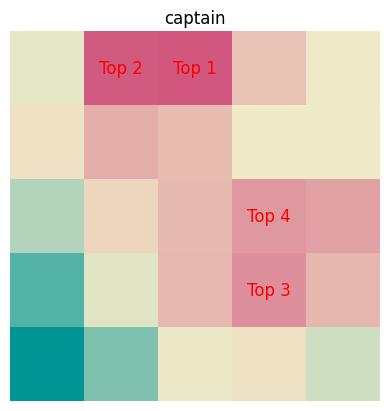

In [ ]:
import numpy as np
import os

for input_sentence in bir_list:
    # vectorize
    vectorized_input_sentence = novel_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # top 4
    top_three_indices = np.argsort(activated_SOM.flatten())[-4:][::-1]
    top_three_coordinates = [(index // activated_SOM.shape[1], index % activated_SOM.shape[1]) for index in top_three_indices]

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.title(input_sentence)
    plt.axis('off')

    # svae and print content
    for i, coord in enumerate(top_three_coordinates, 1):
        plt.text(coord[1], coord[0], f"Top {i}", color='red', fontsize=12, ha='center', va='center')
        top_sentence = neuron_word_mapping[coord][0]["paragraph"]
        print(f"Top {i} - Index: {coord}, Content: {top_sentence}")

    save_path = os.path.join(save_dir, f'{input_sentence}.png')
    plt.savefig(save_path)
    plt.show()


In [ ]:
# Some helpful code

In [ ]:
# Creates a two-dimensional list, SOMcontents, to store the contents of each SOM neuron unit
train_data = novel_model.vector_matrix
SOMcontents = []
for i in range(len(SOM)):
    row = []
    for j in range(len(SOM[0])):
        row.append([])
    SOMcontents.append(row)

for f, fi in zip(train_data, novel_model.paragraphs):
    g,h = SOMlib.find_BMU(SOM, f)
    SOMcontents[g][h].append(fi)

In [ ]:
# Print the first 15 elements of the contents of the column 3 unit, row 4, in SOMcontents.
SOMcontents[4][3][:15]

[{'paragraph': ' Also the confusing arrangement of the eyes! What did a chicken see? When it looked at John with one eye, what did the other one make out? With that it began: chickens lacked the panoramic look that holds everything together, and the speedy, appropriate walk.',
  'nr': 18,
  'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z-Library)',
  'type': 'epub'},
 {'paragraph': ' So it was all a matter of looking. He knew the tree pretty well, but that didn’t make it any faster. His eyes refused to be rushed.Again he sat in the fork of the tree. Quarter past four. He still had time.',
  'nr': 70,
  'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z-Library)',
  'type': 'epub'},
 {'paragraph': ' He was determined to become fast, so fast that his mouth wouldn’t be able to keep up with the counting.Five hours past noon. He sat, panting and sweating, in the fork of the tree and pushed the stocking up on his forehead.',
  'nr': 75,
  'ID': 'The Discovery Of Slowness (Nadolny Sten) (Z

#A.4.2 Input image

In [ ]:
# I used fuyu to go through all the files and save the diagram description in csv.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Read the CSV file and get the contents of the first 10 second columns
file_path = "/content/drive/MyDrive/image_fuyu.csv"
df = pd.read_csv(file_path)
top_10_content = df.iloc[:10, 1].tolist()


In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/pickle_files/som_epochs_23.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(novel_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

Best Match - Index: (3, 2), Content:  Sleeping? His arm hadn’t moved; the rope was taut. What was there for Tom to pick at? The game went on. John had understood nothing. Everything was too fast: the game, the others’ talk, the goings-on in the street in front of the Town Hall.


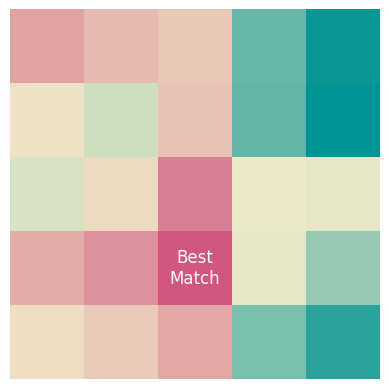

Best Match - Index: (2, 2), Content: Tomorrow they’d go to Horncastle for the horse fair. He had already started to look forward to it. He knew that drive. When the coach left the village, the wall of the churchyard flickered past. Then came the cottages of Ing Ming, domain of the poor.


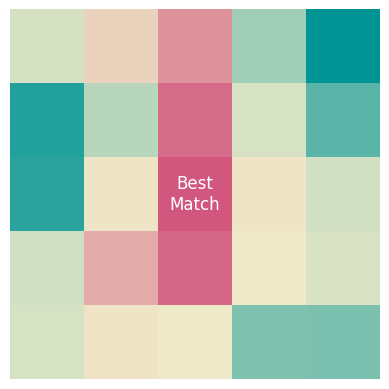

Best Match - Index: (4, 0), Content:  They played gross tricks on the eye. They stood about motionlessly, scratched, then pecked, froze again as though they had never pecked, brazenly pretended they had been standing there for minutes without moving.


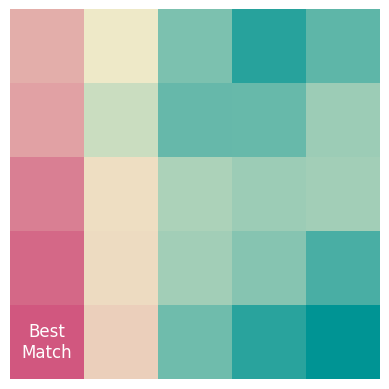

Best Match - Index: (0, 0), Content:  He would change nothing in that. If perhaps by a miracle things went back to where they’d been, what if he had allowed the rope to slip? The children giggled and laughed; they sounded like barnyard fowl.


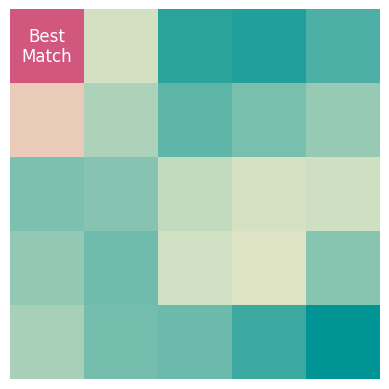

Best Match - Index: (3, 0), Content:  He had to try hard to become a good catcher. He was from Ing Ming. Five years old, he was the youngest. ‘I’ve got to watch like hawk,’ Sherard used to say – not ‘like a hawk’ but ‘like hawk’, without the ‘a’, and as he said that his eyes would become very serious and still, like a watchful animal’s, to show what he meant.


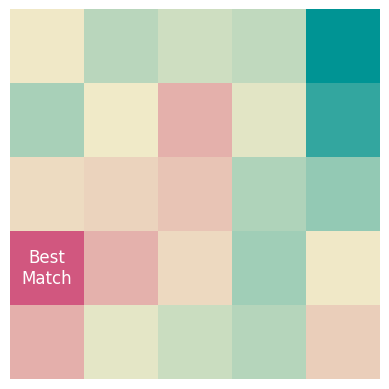

Best Match - Index: (3, 0), Content:  He had to try hard to become a good catcher. He was from Ing Ming. Five years old, he was the youngest. ‘I’ve got to watch like hawk,’ Sherard used to say – not ‘like a hawk’ but ‘like hawk’, without the ‘a’, and as he said that his eyes would become very serious and still, like a watchful animal’s, to show what he meant.


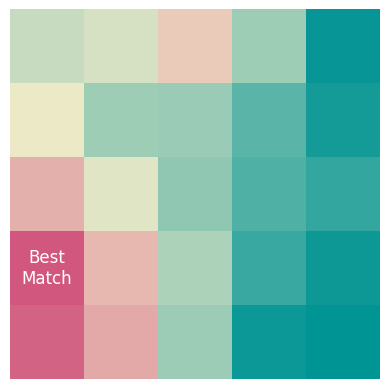

Best Match - Index: (3, 2), Content:  Sleeping? His arm hadn’t moved; the rope was taut. What was there for Tom to pick at? The game went on. John had understood nothing. Everything was too fast: the game, the others’ talk, the goings-on in the street in front of the Town Hall.


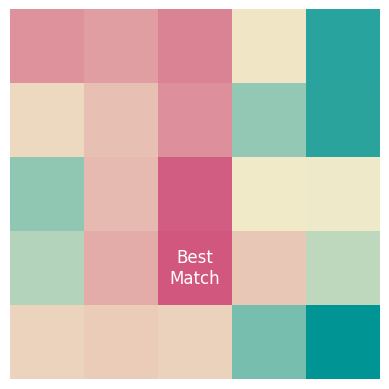

Best Match - Index: (4, 0), Content:  They played gross tricks on the eye. They stood about motionlessly, scratched, then pecked, froze again as though they had never pecked, brazenly pretended they had been standing there for minutes without moving.


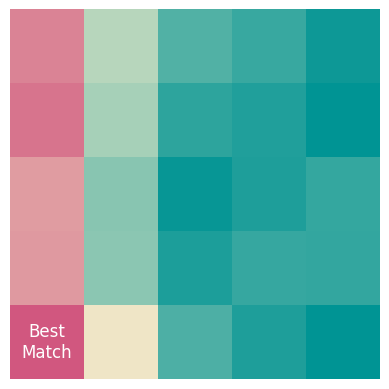

Best Match - Index: (3, 2), Content:  Sleeping? His arm hadn’t moved; the rope was taut. What was there for Tom to pick at? The game went on. John had understood nothing. Everything was too fast: the game, the others’ talk, the goings-on in the street in front of the Town Hall.


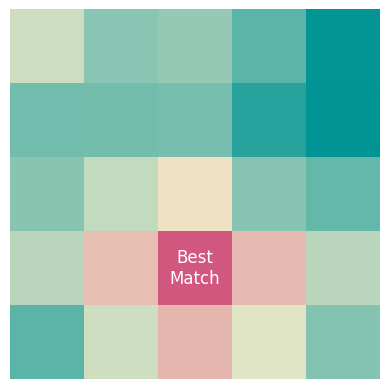

In [ ]:
import re

# Reading CSV file
df = pd.read_csv("/content/drive/MyDrive/image_fuyu.csv")

# Gets the contents of cells 2 through 12 of the Output column
output_values = df['Output'][1:10]

for output_value in output_values:
    # input
    input_sentence = output_value

    # vectorize
    vectorized_input_sentence = novel_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # beat match
    best_match_index = np.unravel_index(np.argmax(activated_SOM), activated_SOM.shape)
    best_sentence = neuron_word_mapping[best_match_index][0]["paragraph"]

    # clear the title
    plt.title('')

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.axis('off')

    # mark
    plt.text(best_match_index[1], best_match_index[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')

    print(f"Best Match - Index: {best_match_index}, Content: {best_sentence}")

    plt.show()


# A.4.3 Input video (via subtitle)

In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/pickle_files/som_epochs_23.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
import pickle

load_path = "/content/drive/MyDrive/LiteratureSim/novel_model2.pkl"

with open(load_path, 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
# Initialize the training data
train_data = novel_model.vector_matrix
# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

start_color = (0, 148, 148)  # blue
middle_color = (241, 235, 201)
end_color = (209, 87, 127)     # red

# Map RGB values from 0-255 to 0-1
start_color = tuple(map(lambda x: x / 255, start_color))
middle_color = tuple(map(lambda x: x / 255, middle_color))
end_color = tuple(map(lambda x: x / 255, end_color))

# Define the color of the color map
colors = [start_color, middle_color, end_color]

# Create a color mapping object
cmap_diverging = LinearSegmentedColormap.from_list('my_cmap', colors)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(novel_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

In [ ]:
save_dir = '/content/drive/MyDrive/pickle_files/activated_folder'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
save_pathM = "/content/drive/MyDrive/SomMovie/movie_model.pkl"

with open(save_pathM, 'rb') as f:
    movie_model = pickle.load(f)

In [ ]:
# ten examples
paragraphs_list = []

for i in range(10):
    paragraph_content = movie_model.paragraphs[i]['paragraph']
    paragraphs_list.append(paragraph_content)

print(paragraphs_list)

["You're the one not leaving me on my own. Julieta? Bea! I don't believe it! What a surprise! Just last week I saw your daughter at Lake Como! You saw Antía? Yes, just imagine! We were looking at each other and I went up to her because she didn't recognize me. But you look exactly the same. Or even better. And what did she say? That she'd come to the city to buy things for her children. She's got three! Two boys and a girl. Yes, I don't know how she manages. - Do you have children? - No, I'm not even married. What a pity, I'm in a terrible hurry. I'm delighted to see you looking so well. Where are you living? In Milan and New York.", "I'm an editor at Vogue. I travel a lot. I was at Lake Como for a photo shoot. That's great... Say hello to your mother. - Mom died three years ago. - I'm sorry. My brother lives here. We're meeting him and my nieces now and we're late. What else did Antía say? Very little. I asked about you, she said you were still living in Madrid, and now look! Yes, I'm

Best Match - Index: (0, 1), Content:  Evening came.Knowing about the sea was called navigation. John repeated that word several times after Matthew. It meant stars, instruments and careful thought. That pleased him. He said, ‘I’d like to learn how to set sails.


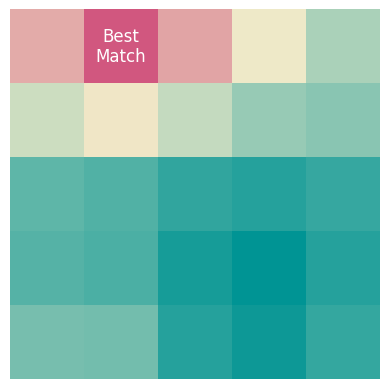

Best Match - Index: (0, 0), Content:  Too often something was expected if he said yes. But if he said no, they pounced on him even more. Why no? Reasons! No without a reason was even more quickly exposed than an unfounded yes.I don’t want to make anyone believe anything, he thought.


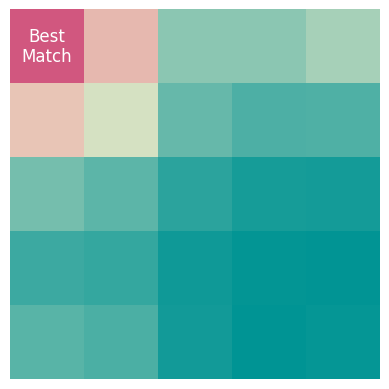

Best Match - Index: (1, 2), Content:  John had overheard a remark which had connected him with this stubborn clockwork. He hadn’t understood it, but he had felt ever since that the clock had something to do with him.Inside the church, Sir Peregrine Bertie, the marble knight, had been standing for more than a century surveying the congregation, his hand on the hilt of his sword.


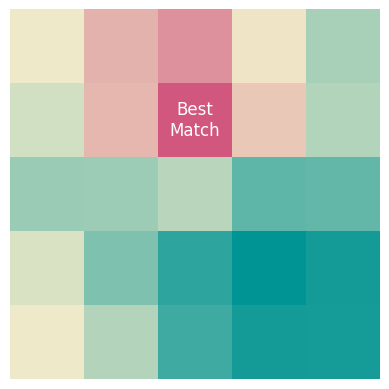

Best Match - Index: (0, 1), Content:  Evening came.Knowing about the sea was called navigation. John repeated that word several times after Matthew. It meant stars, instruments and careful thought. That pleased him. He said, ‘I’d like to learn how to set sails.


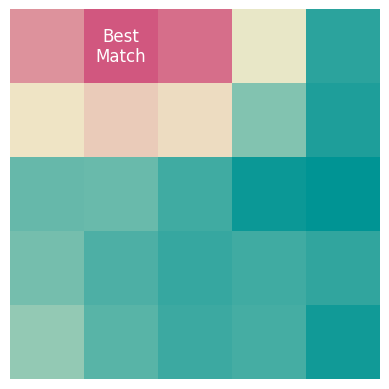

Best Match - Index: (2, 0), Content:  Father wanted to see the innkeeper at the bar. Then came something yellow in a tall glass. Poison for Father’s legs. The innkeeper passed it to him with his dreadful glance. The drink was called Luther and Calvin.


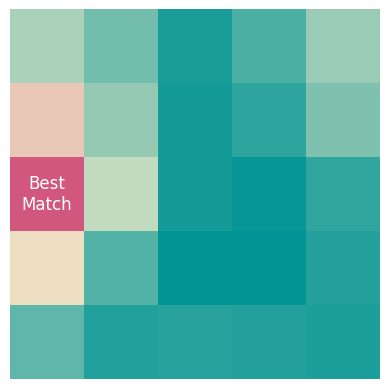

Best Match - Index: (0, 3), Content:  ‘Like a scarecrow,’ said Tom Barker.John couldn’t keep up with the game, so he was no good as an umpire. He could never see exactly whether the ball hit the ground. He didn’t know if it was really the ball that one of them had caught just then, or if the player it landed next to had just held out his hands.


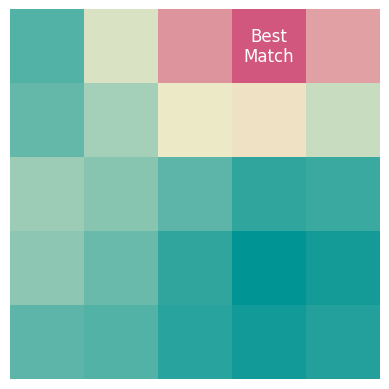

Best Match - Index: (0, 2), Content:  He wore a cockade on his hat, like all naval officers on shore. The two nodded in his direction, said something to each other, and stood still. To avoid staring at them, John studied the white stag lying on top of the protruding bay window, the gold crown round its neck.


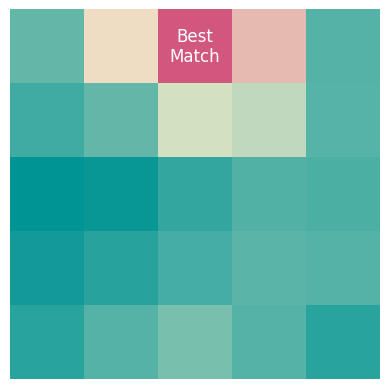

Best Match - Index: (3, 4), Content:    PART I John Franklin’s Early Years   1 The VillageJohn Franklin was ten years old, and he was still so slow that he couldn’t catch a ball. He held the rope for others. It reached from the lowest branch of the tree to his upraised hand.


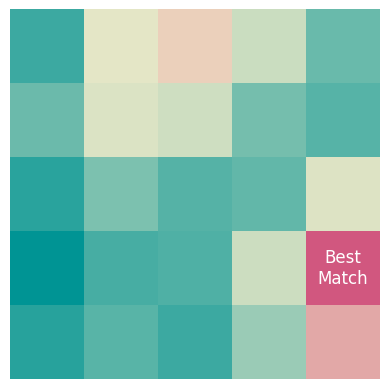

Best Match - Index: (3, 4), Content:    PART I John Franklin’s Early Years   1 The VillageJohn Franklin was ten years old, and he was still so slow that he couldn’t catch a ball. He held the rope for others. It reached from the lowest branch of the tree to his upraised hand.


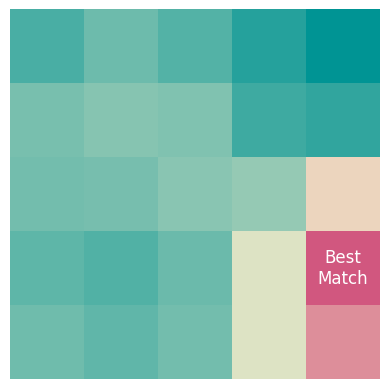

Best Match - Index: (0, 2), Content:  He wore a cockade on his hat, like all naval officers on shore. The two nodded in his direction, said something to each other, and stood still. To avoid staring at them, John studied the white stag lying on top of the protruding bay window, the gold crown round its neck.


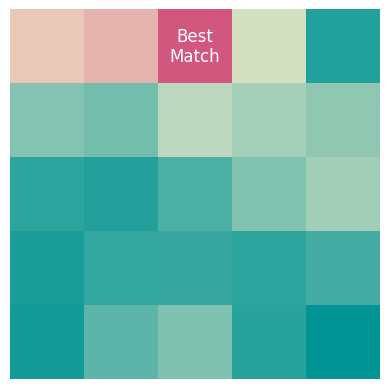

In [ ]:
import re

for i in paragraphs_list:
    # input
    input_sentence = i

    # vectorize
    vectorized_input_sentence = movie_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # beat match
    best_match_index = np.unravel_index(np.argmax(activated_SOM), activated_SOM.shape)
    best_sentence = neuron_word_mapping[best_match_index][0]["paragraph"]

    # clear the title
    plt.title('')

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.axis('off')

    # mark
    plt.text(best_match_index[1], best_match_index[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')

    print(f"Best Match - Index: {best_match_index}, Content: {best_sentence}")

    plt.show()


# **B. Video SOM Training and Activate**

# B.1 SOM Training

In [ ]:
#Make sure we don not need to restart the kernel
%load_ext autoreload
%autoreload 2

In [ ]:
!sudo apt-get update
!sudo apt-get install libenchant1c2a
!sudo apt-get update
!sudo apt-get install libenchant-2-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,077 kB]
Get:13 http://archive.ubuntu.com/ub

In [ ]:
!pip install pyenchant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 864.4 kB/s eta 0:00:00


In [ ]:
!pip install ebooklib gensim PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for ebooklib: filename=EbookLib-0.18-py3-none-any.whl size=38778 sha256=6818f8f10391d1c9ded9b3b5b16723f4ae7cc567a83df180537000dfe5253d5c
  Stored in directory: /root/.cache/pip/wheels/0f/38/cc/a3728bb72a315d9d8766fb71d362136372066fc25ad838f8fa
Successfully built ebooklib


In [ ]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 25.5 MB/s eta 0:00:00


In [ ]:
!pip install pytesseract opencv-python pdf2image
!pip install chardet

In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=70550bf15b1f6358c0fec26f827cba1a52d33521c22bd354a49844ed32ad635d
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import enchant
import pickle
from sklearn.neighbors import NearestNeighbors
import glob, os, sys
import numpy as np

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import torch
import sys
# update the location
sys.path.append('/content/drive/MyDrive/LiteratureSim')
import SOM as SOMlib
import matplotlib.pyplot as plt

In [ ]:
import pickle
import os
import re
from fpdf import FPDF

In [ ]:
#Preprocess subtitle

def preprocess_subtitle(subtitle_file):
    with open(subtitle_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()

    subtitle_content = ''
    for line in lines:
        # Use regular expressions to match the timeline and delete it
        line = re.sub(r'\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}', '', line)
        # Remove HTML tags
        line = re.sub(r'<\/?i>', '', line)
        # Ignore empty lines and lines starting with a number
        if not line.strip() or line.strip().isdigit():
            continue
        subtitle_content += line.strip() + '\n'

    return subtitle_content

def create_pdf(subtitle_folder, output_folder):
    for filename in os.listdir(subtitle_folder):
        if filename.endswith('.srt'):
            subtitle_file = os.path.join(subtitle_folder, filename)
            subtitle_content = preprocess_subtitle(subtitle_file)

            # Generates a pdf file name, the same as a subtitle file, but with a.pdf suffix
            pdf_filename = os.path.splitext(filename)[0] + '.pdf'
            output_path = os.path.join(output_folder, pdf_filename)

            # Create PDF and write content
            pdf = FPDF()
            pdf.add_page()
            pdf.set_font("Arial", size = 12)
            pdf.multi_cell(0, 10, txt = subtitle_content)
            pdf.output(output_path)

subtitle_folder = '/content/drive/MyDrive/SomMovie/SubtitleO'
output_folder = '/content/drive/MyDrive/SomMovie/SubtitleP'

create_pdf(subtitle_folder, output_folder)


In [ ]:
#Import the paragrph process code

from text_model_pdfepub import TextModel

In [ ]:
MOVIE_DIR='/content/drive/MyDrive/SomMovie/SubtitleP'
MOVIE_FILES = []
MOVIE_FILES.extend(glob.glob(os.path.join(MOVIE_DIR, '*')))

In [ ]:
movie_model = TextModel(MOVIE_FILES,vectorization='lsa',min_df=3)

In [ ]:
save_pathM = "/content/drive/MyDrive/SomMovie/movie_model.pkl"

with open(save_pathM, 'wb') as f:
    pickle.dump(movie_model, f)


In [ ]:
save_pathM = "/content/drive/MyDrive/SomMovie/movie_model.pkl"

with open(save_pathM, 'rb') as f:
    movie_model = pickle.load(f)


In [ ]:
movie_model.search('moon', n=10)

[{'paragraph': 'in "Short Stories of the 80s" - I\'m sorry. - You and I have to talk. I think not. I\'ve got nothing more to say. But I do. I went to St. John\'s School. You were my literature teacher, and you were madly in love with me. I remember how you\'d embrace me from behind while you declared your love. I can\'t believe you\'ve forgotten. I remember the buttons on your soutane digging into my backbone. Have you really forgotten? I\'ll expect you at my house at 7:00. My address is on the back of the envelope, Fr. Manolo. Push the door. It\'s just stuck. That wasn\'t the Ignacio you and I loved.',
  'nr': 51,
  'ID': 'Bad_Education',
  'type': 'pdf'},
 {'paragraph': "-No, neither. I will see you in a week. -Am I not well doctor? -That's not it... However, your adolescence was kind of special. -It wasn't special. -It was. Very special. And we must analyze it in depth. Yes, lets analyze it. -Should I come in a week? -Very well. I am glad. -What are you doing here? -I was just going

In [ ]:
len(movie_model.paragraphs)

642

In [ ]:
# Dimensions of the SOM grid
m = 5
n = 5
# Number of training examples
n_x = 640
rand = np.random.RandomState(0)
# Initialize the training data
train_data = movie_model.vector_matrix

# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

21
22
23
24
25
26


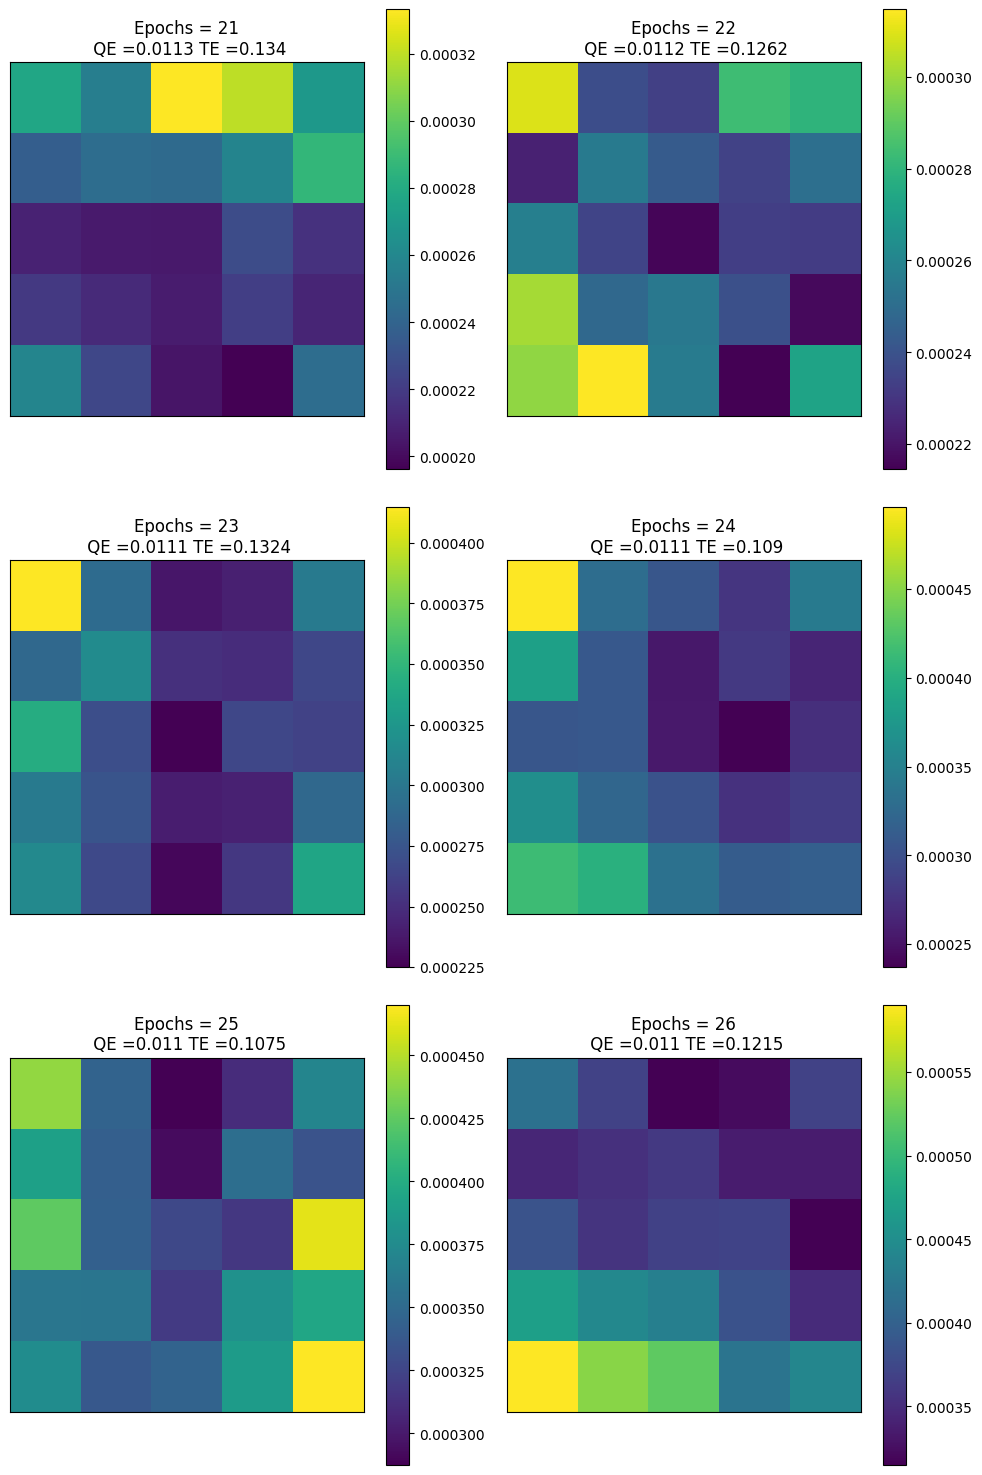

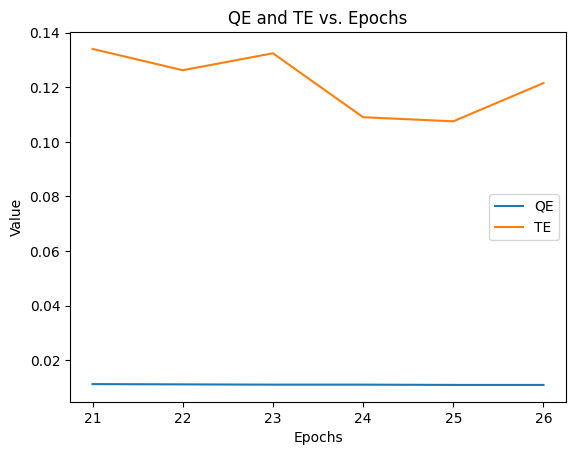

In [ ]:
# Initialize the SOM randomly
som = rand.uniform(-0.5, 0.5, (m, n, len(train_data[0])))

# Define the scope to traverse
epoch_range = range(21, 27)
num_plots = len(epoch_range)
num_rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows for subplots
fig, ax = plt.subplots(
    nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
soms = []
qe_values = []
te_values = []
for epochs, i in zip(epoch_range, epoch_range):  # Number of epochs and number of subgraphs
    print(i)
    total_epochs += epochs
    som = SOMlib.train_SOM(som, n_train_data, learn_rate=0.3, radius_sq=5, epochs=epochs)
    soms.append(som)
    QE = round(SOMlib.calculateQE(som, n_train_data), 4)
    TE = round(SOMlib.calculateTE(som, n_train_data), 4)
    qe_values.append(QE)
    te_values.append(TE)

    # SAVE PATH
    save_path = "/content/drive/MyDrive/SomMovie/"
    with open(save_path + f'som_epochs_{epochs}.pkl', 'wb') as f:
        pickle.dump(som, f)

    row = (i - epoch_range[0]) // 2  # Calculates the row index of the subgraph
    col = (i - epoch_range[0]) % 2   # Calculates the column index of the subgraph
    im = ax[row, col].imshow(SOMlib.u_matrix(som))
    ax[row, col].title.set_text('Epochs = ' + str(epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))
    fig.colorbar(im, ax=ax[row, col])

plt.tight_layout()  # prevent overlap

# Draw a line chart of changes
plt.figure()
plt.plot(epoch_range, qe_values, label='QE')
plt.plot(epoch_range, te_values, label='TE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('QE and TE vs. Epochs')
plt.legend()
plt.show()


#B.2 Activate video SOM with different input

#B.2.1 Input text

In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/SomMovie/som_epochs_25.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(movie_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

In [ ]:
save_dir = '/content/drive/MyDrive/SomMovie'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
with open('/content/drive/MyDrive/LiteratureSim/novel_model2.pkl', 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
print(novel_model.paragraphs[0]['paragraph'])


   PART I John Franklin’s Early Years   1 The VillageJohn Franklin was ten years old, and he was still so slow that he couldn’t catch a ball. He held the rope for others. It reached from the lowest branch of the tree to his upraised hand.


In [ ]:
# Store a list of the contents of the first ten paragraphs
paragraphs_list = []

for i in range(10):
    paragraph_content = novel_model.paragraphs[i]['paragraph']
    paragraphs_list.append(paragraph_content)

print(paragraphs_list)


['   PART I John Franklin’s Early Years   1 The VillageJohn Franklin was ten years old, and he was still so slow that he couldn’t catch a ball. He held the rope for others. It reached from the lowest branch of the tree to his upraised hand.', ' He held it as firmly as the tree, and he didn’t drop his arm until the end of the game. He was suited to be a rope-holder as no other child was in Spilsby, or even in all of Lincolnshire. The clerk looked over from the Town Hall.', ' His glance seemed approving.Perhaps there was no one in the whole of England who could stand still for over an hour holding up the end of a rope. He stood without moving, like a cross on a grave, towering like a statue.', ' ‘Like a scarecrow,’ said Tom Barker.John couldn’t keep up with the game, so he was no good as an umpire. He could never see exactly whether the ball hit the ground. He didn’t know if it was really the ball that one of them had caught just then, or if the player it landed next to had just held out

Best Match - Index: (0, 0), Content: Who have we got here? Will you give Grandpa a kiss? - How was the trip? - Really long. We're worn out. Let me introduce you. This is Sanáa. Julieta. And this wonder is Antía. Have you got a case? Yes, a brown one, it's got my name on it. Can you get it? And a stroller! How's Mom? Fine, we're getting by. You'll see her now. And that girl? It's Sanáa, the girl I told you about. She's the woman who helps you? She looks after your mom and helps me on the land. We were lucky to find her. She's changed our lives. Let's get in the car. - Don't you miss the school? - I don't have time. Between your mother and the land,


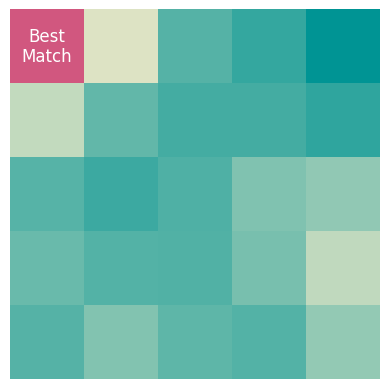

Best Match - Index: (3, 0), Content: That's no good, because I'm the teacher and teachers aren't supposed to have sex with their pupils. - Tell me someone else. - Kim Basinger. Really lovely. Much prettier than me, toady! Ãngela Molina. She's beautiful, too. Well, Calypso was as beautiful as Kim Basinger and Ãngela Molina together. And she offered Ulysses everything you could imagine. Diego, what could she have offered him? Her body. Of course. And what else? Something we've all dreamed of... - Eternal youth. - Exactly. And immortality. Yet Ulysses rejected it and he set sail to face countless dangers. Which of the three meanings would you choose


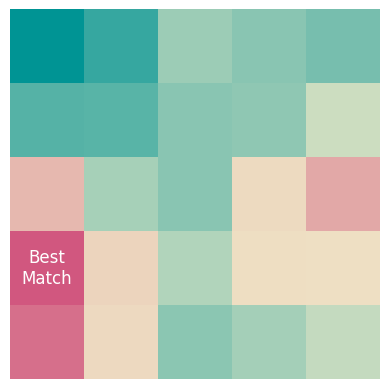

Best Match - Index: (1, 3), Content: I got your letter and I came. I never imagined that your wife... Don't think about that now. Good morning. - These cookies are so good! - They're typical of here. I was fixing breakfast. I was really hungry. Anything for me? We'll find something... I took your letter as an invitation to come and see you. That was my intention. I never thought that your wife had died. I'm sorry. It was for the best. She had no life. Marian told me you were here, waiting for the bus, but that she wasn't certain you'd leave. She told me you were with a woman. Ava, I think. She's an old friend, you'll meet her. She's an artist like you. I'm not an artist. I teach Classical Literature. And now, not even that.


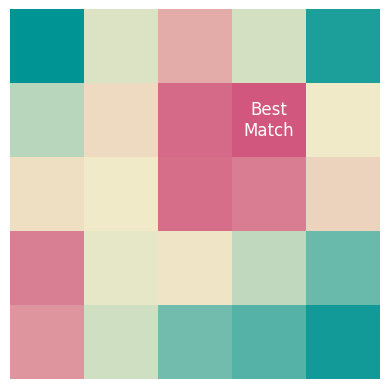

Best Match - Index: (2, 2), Content: I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Please, get on the train. He was sitting where you are now. He wanted to talk, but I didn't like how he was looking at me and I ran out. How could I have known he felt so bad? Any girl would have done the same. I should have realized. Don't torture yourself.


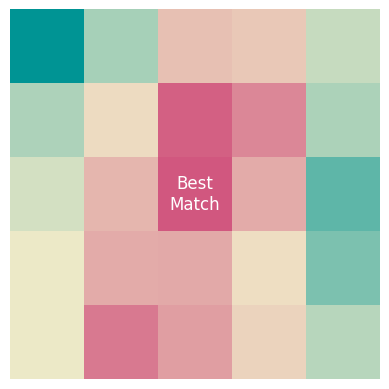

Best Match - Index: (1, 3), Content: I got your letter and I came. I never imagined that your wife... Don't think about that now. Good morning. - These cookies are so good! - They're typical of here. I was fixing breakfast. I was really hungry. Anything for me? We'll find something... I took your letter as an invitation to come and see you. That was my intention. I never thought that your wife had died. I'm sorry. It was for the best. She had no life. Marian told me you were here, waiting for the bus, but that she wasn't certain you'd leave. She told me you were with a woman. Ava, I think. She's an old friend, you'll meet her. She's an artist like you. I'm not an artist. I teach Classical Literature. And now, not even that.


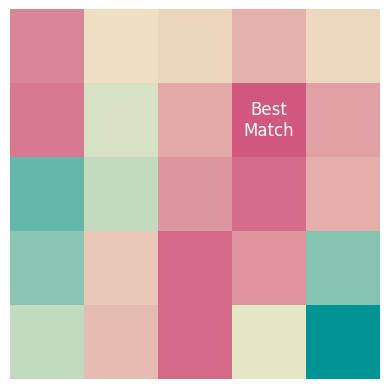

Best Match - Index: (2, 4), Content: We'll get there early. You don't have to, Mom. I'm with my friend Bea. I met her here and now we're best friends. Can I go and spend a week with them in Madrid? You don't mind, do you? But we don't know them. But she's my friend... I'll put her mother on, she can tell you. Hello, how are you? I'm Claudia, Beatriz's mother. How's my daughter? Very well, great. I didn't know her before, but camp has done wonders for her. I wanted to ask your permission to take her to Madrid with us. They've grown really close and are making such a fuss about it... Doesn't the camp end tomorrow? Yes, but I came a day early. I was hoping to take them this afternoon. What do you think? Well, if she'd like that...


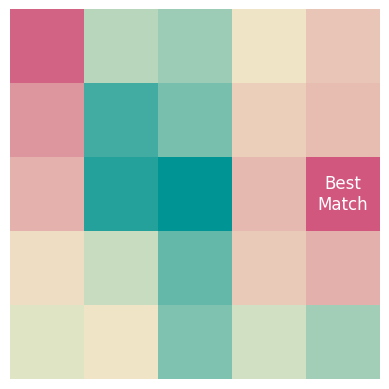

Best Match - Index: (1, 3), Content: I got your letter and I came. I never imagined that your wife... Don't think about that now. Good morning. - These cookies are so good! - They're typical of here. I was fixing breakfast. I was really hungry. Anything for me? We'll find something... I took your letter as an invitation to come and see you. That was my intention. I never thought that your wife had died. I'm sorry. It was for the best. She had no life. Marian told me you were here, waiting for the bus, but that she wasn't certain you'd leave. She told me you were with a woman. Ava, I think. She's an old friend, you'll meet her. She's an artist like you. I'm not an artist. I teach Classical Literature. And now, not even that.


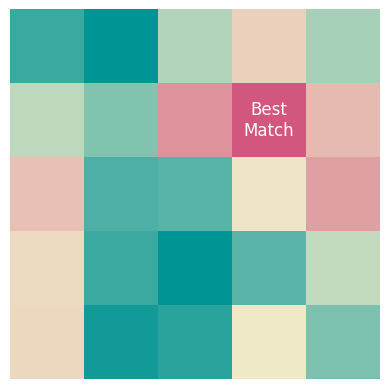

Best Match - Index: (4, 4), Content: because you were a child, because it was too painful for me, or simply out of shame. But you're not a child anymore. Beatriz told me that you have children of your own. Three, no less. You're a grown woman, and a mother. Where do I begin? I'll tell you about your father. When you asked me how I met him, I told you it was on a train. But I didn't tell you everything. I was 25. It was an unpleasant night and very windy. Is this seat free? Yes. That branch was really something. Did it scare you? Yes. Are you traveling alone? Yes. When I saw you alone I thought, "We'll keep each other company. "


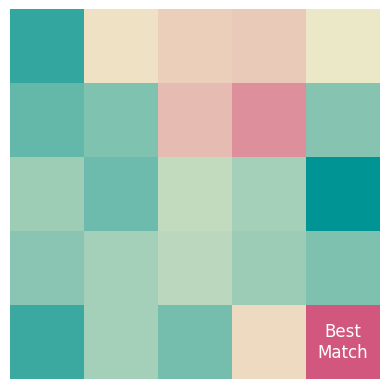

Best Match - Index: (1, 0), Content: Come on, Canelo! Leave it there. We'll go into the kitchen. When did you meet Ana? Ana? I didn't know her. I supposed so. She was in bed the last six years. The sea! It's really striking the first time. Sit down. So you've come to see Xoan. Do you want a cookie? No. I don't think he'll be back tonight. He's with Ava. Do you know Ava? She does ceramics and sculptures. Ana and Ava were good friends, when Ana could still talk or listen. The poor thing was a vegetable, and a man needs a woman. But it's not for me to criticize Xoan. More coffee? - No. - Then give me the cup. So what are you going to do?


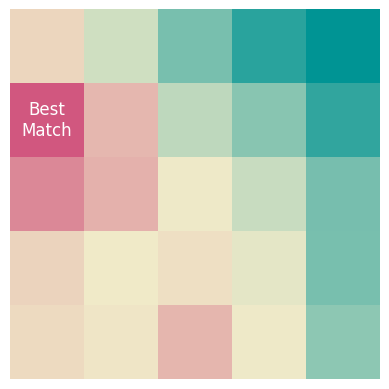

Best Match - Index: (1, 4), Content: for the sea that Ulysses yearned for? Thalassa? No! - Pontos. - That's it! Pontos, the sea, the high sea, the road to adventure and the unknown. Come in. Hello. Julieta, have a seat. Thank you. Mrs. Martínez is coming back next week so your substitution time is over. We are very happy with your work. Very happy indeed. There's never been such attendance in the Classical Literature classes. Thank you. I've really enjoyed these six months. I'm delighted. Well... Wait. This letter came, it's for you. Is it for you? Yes, it is. Dear Julieta,


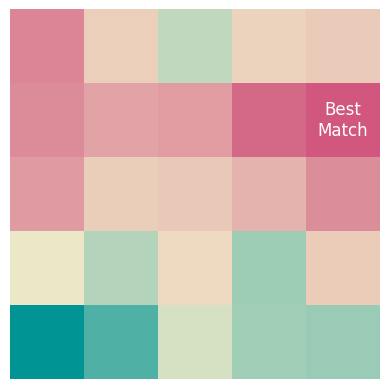

In [ ]:
import re

for i in paragraphs_list:
    # input
    input_sentence = i

    # vectorize
    vectorized_input_sentence = movie_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # beat match
    best_match_index = np.unravel_index(np.argmax(activated_SOM), activated_SOM.shape)
    best_sentence = neuron_word_mapping[best_match_index][0]["paragraph"]

    # clear the title
    plt.title('')

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.axis('off')

    # mark
    plt.text(best_match_index[1], best_match_index[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')

    print(f"Best Match - Index: {best_match_index}, Content: {best_sentence}")

    plt.show()


# B.2.2 Input image

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Read the CSV file and get the contents of the first 10 second columns
file_path = "/content/drive/MyDrive/image_fuyu.csv"
df = pd.read_csv(file_path)
top_10_content = df.iloc[:10, 1].tolist()


In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/SomMovie/som_epochs_25.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(movie_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

Best Match - Index: (0, 0), Content: Who have we got here? Will you give Grandpa a kiss? - How was the trip? - Really long. We're worn out. Let me introduce you. This is Sanáa. Julieta. And this wonder is Antía. Have you got a case? Yes, a brown one, it's got my name on it. Can you get it? And a stroller! How's Mom? Fine, we're getting by. You'll see her now. And that girl? It's Sanáa, the girl I told you about. She's the woman who helps you? She looks after your mom and helps me on the land. We were lucky to find her. She's changed our lives. Let's get in the car. - Don't you miss the school? - I don't have time. Between your mother and the land,


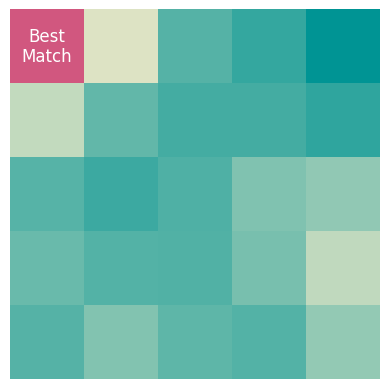

Best Match - Index: (3, 0), Content: That's no good, because I'm the teacher and teachers aren't supposed to have sex with their pupils. - Tell me someone else. - Kim Basinger. Really lovely. Much prettier than me, toady! Ãngela Molina. She's beautiful, too. Well, Calypso was as beautiful as Kim Basinger and Ãngela Molina together. And she offered Ulysses everything you could imagine. Diego, what could she have offered him? Her body. Of course. And what else? Something we've all dreamed of... - Eternal youth. - Exactly. And immortality. Yet Ulysses rejected it and he set sail to face countless dangers. Which of the three meanings would you choose


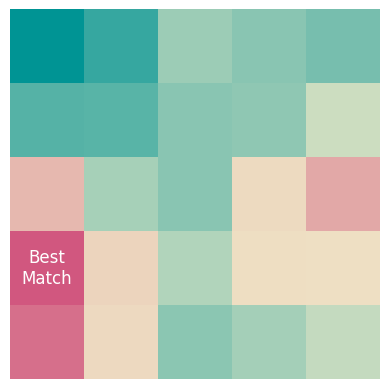

Best Match - Index: (1, 3), Content: I got your letter and I came. I never imagined that your wife... Don't think about that now. Good morning. - These cookies are so good! - They're typical of here. I was fixing breakfast. I was really hungry. Anything for me? We'll find something... I took your letter as an invitation to come and see you. That was my intention. I never thought that your wife had died. I'm sorry. It was for the best. She had no life. Marian told me you were here, waiting for the bus, but that she wasn't certain you'd leave. She told me you were with a woman. Ava, I think. She's an old friend, you'll meet her. She's an artist like you. I'm not an artist. I teach Classical Literature. And now, not even that.


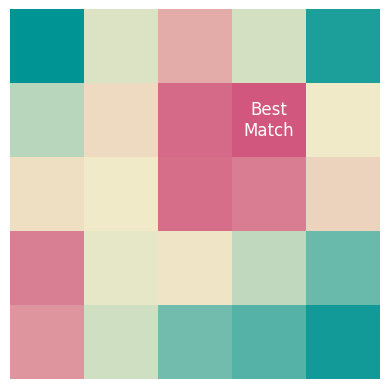

Best Match - Index: (2, 2), Content: I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Please, get on the train. He was sitting where you are now. He wanted to talk, but I didn't like how he was looking at me and I ran out. How could I have known he felt so bad? Any girl would have done the same. I should have realized. Don't torture yourself.


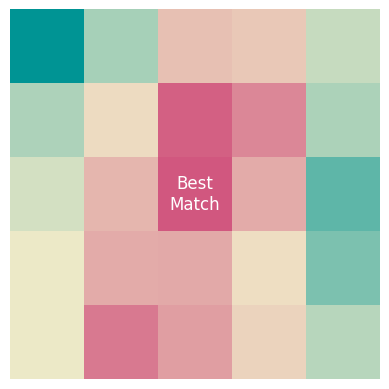

Best Match - Index: (1, 3), Content: I got your letter and I came. I never imagined that your wife... Don't think about that now. Good morning. - These cookies are so good! - They're typical of here. I was fixing breakfast. I was really hungry. Anything for me? We'll find something... I took your letter as an invitation to come and see you. That was my intention. I never thought that your wife had died. I'm sorry. It was for the best. She had no life. Marian told me you were here, waiting for the bus, but that she wasn't certain you'd leave. She told me you were with a woman. Ava, I think. She's an old friend, you'll meet her. She's an artist like you. I'm not an artist. I teach Classical Literature. And now, not even that.


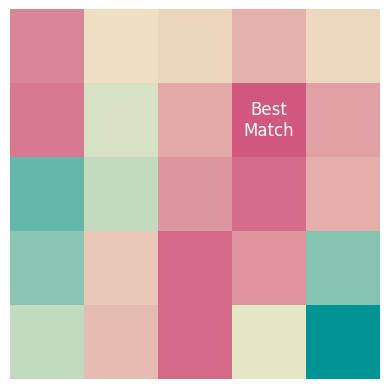

Best Match - Index: (2, 4), Content: We'll get there early. You don't have to, Mom. I'm with my friend Bea. I met her here and now we're best friends. Can I go and spend a week with them in Madrid? You don't mind, do you? But we don't know them. But she's my friend... I'll put her mother on, she can tell you. Hello, how are you? I'm Claudia, Beatriz's mother. How's my daughter? Very well, great. I didn't know her before, but camp has done wonders for her. I wanted to ask your permission to take her to Madrid with us. They've grown really close and are making such a fuss about it... Doesn't the camp end tomorrow? Yes, but I came a day early. I was hoping to take them this afternoon. What do you think? Well, if she'd like that...


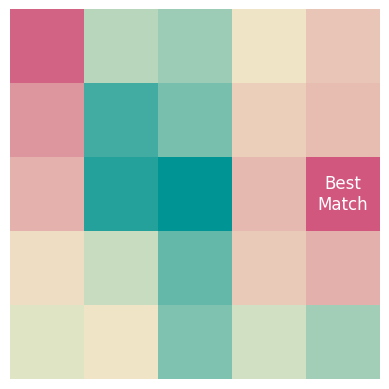

Best Match - Index: (1, 3), Content: I got your letter and I came. I never imagined that your wife... Don't think about that now. Good morning. - These cookies are so good! - They're typical of here. I was fixing breakfast. I was really hungry. Anything for me? We'll find something... I took your letter as an invitation to come and see you. That was my intention. I never thought that your wife had died. I'm sorry. It was for the best. She had no life. Marian told me you were here, waiting for the bus, but that she wasn't certain you'd leave. She told me you were with a woman. Ava, I think. She's an old friend, you'll meet her. She's an artist like you. I'm not an artist. I teach Classical Literature. And now, not even that.


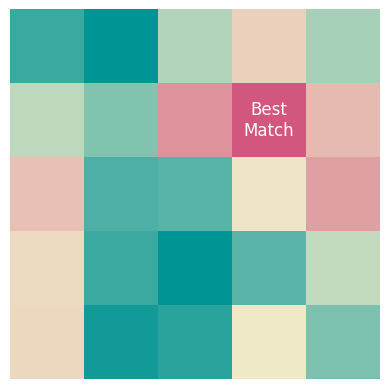

Best Match - Index: (4, 4), Content: because you were a child, because it was too painful for me, or simply out of shame. But you're not a child anymore. Beatriz told me that you have children of your own. Three, no less. You're a grown woman, and a mother. Where do I begin? I'll tell you about your father. When you asked me how I met him, I told you it was on a train. But I didn't tell you everything. I was 25. It was an unpleasant night and very windy. Is this seat free? Yes. That branch was really something. Did it scare you? Yes. Are you traveling alone? Yes. When I saw you alone I thought, "We'll keep each other company. "


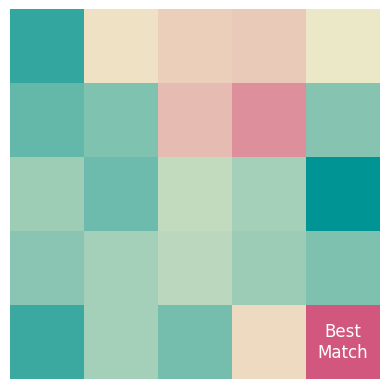

Best Match - Index: (1, 0), Content: Come on, Canelo! Leave it there. We'll go into the kitchen. When did you meet Ana? Ana? I didn't know her. I supposed so. She was in bed the last six years. The sea! It's really striking the first time. Sit down. So you've come to see Xoan. Do you want a cookie? No. I don't think he'll be back tonight. He's with Ava. Do you know Ava? She does ceramics and sculptures. Ana and Ava were good friends, when Ana could still talk or listen. The poor thing was a vegetable, and a man needs a woman. But it's not for me to criticize Xoan. More coffee? - No. - Then give me the cup. So what are you going to do?


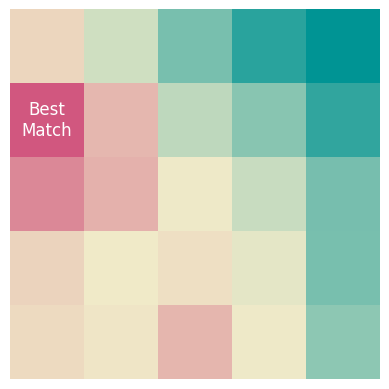

Best Match - Index: (1, 4), Content: for the sea that Ulysses yearned for? Thalassa? No! - Pontos. - That's it! Pontos, the sea, the high sea, the road to adventure and the unknown. Come in. Hello. Julieta, have a seat. Thank you. Mrs. Martínez is coming back next week so your substitution time is over. We are very happy with your work. Very happy indeed. There's never been such attendance in the Classical Literature classes. Thank you. I've really enjoyed these six months. I'm delighted. Well... Wait. This letter came, it's for you. Is it for you? Yes, it is. Dear Julieta,


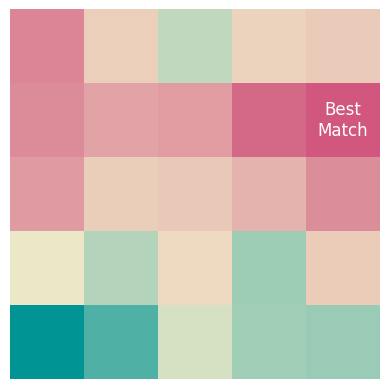

In [ ]:
import re

# Reading CSV file
df = pd.read_csv("/content/drive/MyDrive/image_fuyu.csv")

# Gets the contents of cells 2 through 12 of the Output column
output_values = df['Output'][1:10]

for i in paragraphs_list:
    # input
    input_sentence = i

    # vectorize
    vectorized_input_sentence = movie_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # beat match
    best_match_index = np.unravel_index(np.argmax(activated_SOM), activated_SOM.shape)
    best_sentence = neuron_word_mapping[best_match_index][0]["paragraph"]

    # clear the title
    plt.title('')

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.axis('off')

    # mark
    plt.text(best_match_index[1], best_match_index[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')

    print(f"Best Match - Index: {best_match_index}, Content: {best_sentence}")

    plt.show()



#B.2.3 Input video

In [ ]:
import random

def select_random_subtitles(srt_file, num_subtitles=10):
    with open(srt_file, 'r', encoding='latin-1') as file:  # Open file with latin-1 encoding
        lines = file.readlines()


    subtitles = []
    subtitle = ''
    for line in lines:
        if line.strip():
            subtitle += line.strip() + '\n'
        elif subtitle:
            subtitles.append(subtitle.strip())
            subtitle = ''

    # Select ten subtitles at random
    random_subtitles = random.sample(subtitles, num_subtitles)

    # Delete serial number and timeline
    for i in range(len(random_subtitles)):
        subtitle_lines = random_subtitles[i].split('\n')[2:]
        # Delete </i> and <i>
        subtitle_lines = [line.replace('</i>', '').replace('<i>', '') for line in subtitle_lines]
        random_subtitles[i] = '\n'.join(subtitle_lines)

    return random_subtitles


In [ ]:
srt_file = '/content/drive/MyDrive/SomMovie/SubtitleO/Julieta.srt'
random_subtitles = select_random_subtitles(srt_file)

In [ ]:
random_subtitles

["I think I'll do the sitting room tomorrow.",
 'I was at Lake Como for a photo shoot.',
 'I thought to myself, that woman is so pretty',
 'I liked to see her working',
 "I didn't expect more,",
 'Would you like anything? Something to eat?',
 'People have a right to retire.',
 'Julieta.',
 'They gave them the attributes\nthey needed for their survival.',
 "I believe she didn't grow up\nin a home based on faith."]

In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/SomMovie/som_epochs_25.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(movie_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

Best Match - Index: (3, 4), Content: I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Please, get on the train. He was sitting where you are now. He wanted to talk, but I didn't like how he was looking at me and I ran out. How could I have known he felt so bad? Any girl would have done the same. I should have realized. Don't torture yourself.


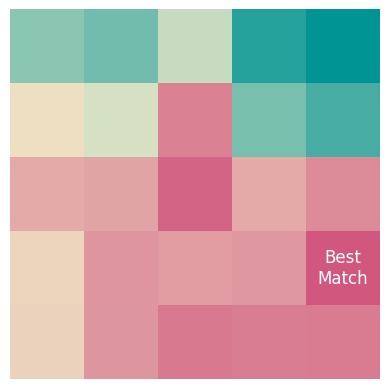

Best Match - Index: (3, 4), Content: I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Please, get on the train. He was sitting where you are now. He wanted to talk, but I didn't like how he was looking at me and I ran out. How could I have known he felt so bad? Any girl would have done the same. I should have realized. Don't torture yourself.


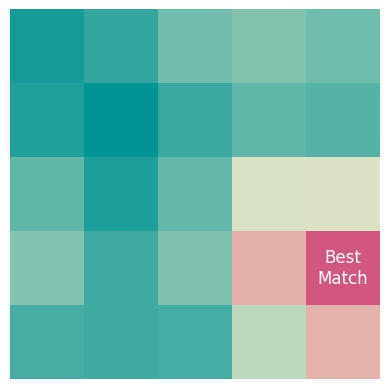

Best Match - Index: (2, 1), Content: - So should I go? - Yes, I think so. - Can't I help you cut out â€¦? - No, thanks a lot. - So long. - My pleasure. You look great! So do you. - Do read "The Visit". - Yes, I will. - I'm dying of curiosity. - Great. See you. I thought he'd never leave! - Is he really a friend of yours? - Yes. I haven't seen him since school. We were really close. Well, he was my first love. But he's changed a lot. I didn't recognize him. Will you see him again? It seemed that you liked him. No, there's nothing less erotic than an actor looking for work. "The Visit".


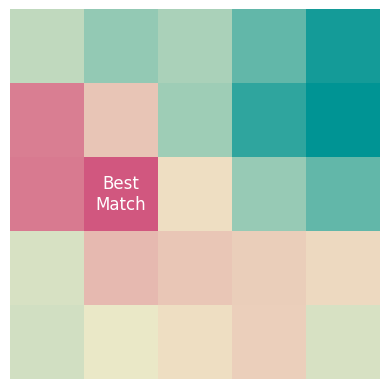

Best Match - Index: (3, 2), Content: Come on, Canelo! Leave it there. We'll go into the kitchen. When did you meet Ana? Ana? I didn't know her. I supposed so. She was in bed the last six years. The sea! It's really striking the first time. Sit down. So you've come to see Xoan. Do you want a cookie? No. I don't think he'll be back tonight. He's with Ava. Do you know Ava? She does ceramics and sculptures. Ana and Ava were good friends, when Ana could still talk or listen. The poor thing was a vegetable, and a man needs a woman. But it's not for me to criticize Xoan. More coffee? - No. - Then give me the cup. So what are you going to do?


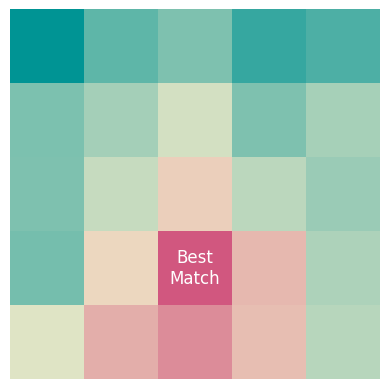

Best Match - Index: (4, 1), Content: between us for a long time. It's about Antía. When we went to close up your house, Marian came. Antía! I couldn't prevent her seeing Antía and talking to her. She told her everything about Xoan's last day. Your row and that Xoan put out to sea even though it was choppy that day. But Marian wasn't there. She went home before. Apparently Xoan rang her to ask what you'd talked about. Antía never said anything, she never asked me anything. She asked me. She wanted to confirm if you'd argued because of me and if the sea really was choppy. I had no idea about the state of the sea. And I said I wouldn't discuss the rest with a child. She was furious.


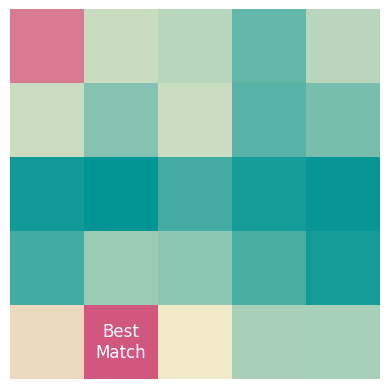

Best Match - Index: (4, 4), Content: because you were a child, because it was too painful for me, or simply out of shame. But you're not a child anymore. Beatriz told me that you have children of your own. Three, no less. You're a grown woman, and a mother. Where do I begin? I'll tell you about your father. When you asked me how I met him, I told you it was on a train. But I didn't tell you everything. I was 25. It was an unpleasant night and very windy. Is this seat free? Yes. That branch was really something. Did it scare you? Yes. Are you traveling alone? Yes. When I saw you alone I thought, "We'll keep each other company. "


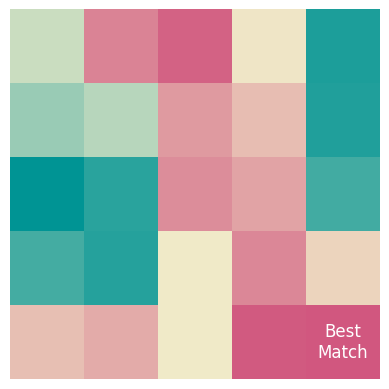

Best Match - Index: (4, 4), Content: because you were a child, because it was too painful for me, or simply out of shame. But you're not a child anymore. Beatriz told me that you have children of your own. Three, no less. You're a grown woman, and a mother. Where do I begin? I'll tell you about your father. When you asked me how I met him, I told you it was on a train. But I didn't tell you everything. I was 25. It was an unpleasant night and very windy. Is this seat free? Yes. That branch was really something. Did it scare you? Yes. Are you traveling alone? Yes. When I saw you alone I thought, "We'll keep each other company. "


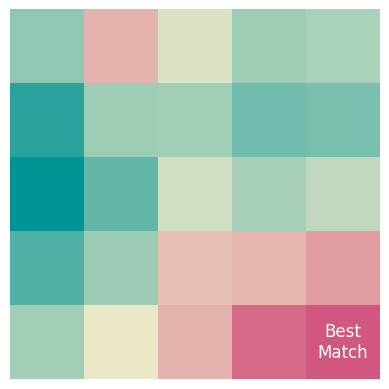

Best Match - Index: (0, 0), Content: Who have we got here? Will you give Grandpa a kiss? - How was the trip? - Really long. We're worn out. Let me introduce you. This is Sanáa. Julieta. And this wonder is Antía. Have you got a case? Yes, a brown one, it's got my name on it. Can you get it? And a stroller! How's Mom? Fine, we're getting by. You'll see her now. And that girl? It's Sanáa, the girl I told you about. She's the woman who helps you? She looks after your mom and helps me on the land. We were lucky to find her. She's changed our lives. Let's get in the car. - Don't you miss the school? - I don't have time. Between your mother and the land,


/content/drive/MyDrive/LiteratureSim/SOM.py:61: RuntimeWarning: divide by zero encountered in divide
  normalised_p = (p-min_d)/(max_d - min_d)
/content/drive/MyDrive/LiteratureSim/SOM.py:61: RuntimeWarning: invalid value encountered in divide
  normalised_p = (p-min_d)/(max_d - min_d)


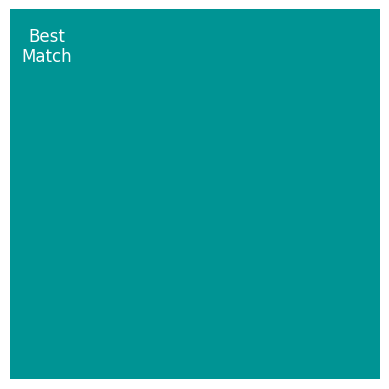

Best Match - Index: (3, 1), Content: You can still catch the 8:00 bus. It stops in the square. Let's go. You can come home with me and my husband will take you to the bus. It's no bother. I'm tired. I'd rather wait here, if you don't mind. Where? Right there, in the entrance. On your own? Well... I'd stay with you, but I can't. I've neglected my husband these last days. Well, Canelo will keep you company. Thank you. Don't fall asleep and miss the bus. Shall I call you? Don't worry. I'll call you. Canelo, come here! Hello. Come up here. How's it going? Don't wake up.


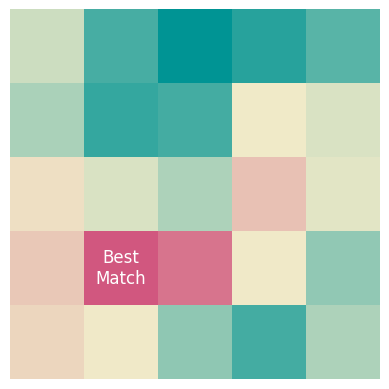

Best Match - Index: (4, 0), Content: You're the one not leaving me on my own. Julieta? Bea! I don't believe it! What a surprise! Just last week I saw your daughter at Lake Como! You saw Antía? Yes, just imagine! We were looking at each other and I went up to her because she didn't recognize me. But you look exactly the same. Or even better. And what did she say? That she'd come to the city to buy things for her children. She's got three! Two boys and a girl. Yes, I don't know how she manages. - Do you have children? - No, I'm not even married. What a pity, I'm in a terrible hurry. I'm delighted to see you looking so well. Where are you living? In Milan and New York.


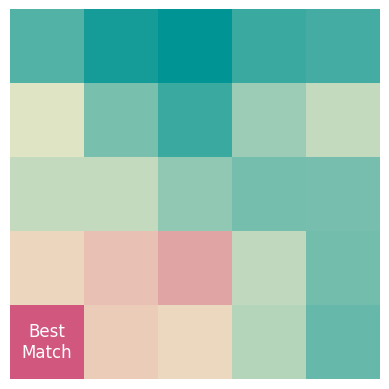

All Best Sentences: ["I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Please, get on the train. He was sitting where you are now. He wanted to talk, but I didn't like how he was looking at me and I ran out. How could I have known he felt so bad? Any girl would have done the same. I should have realized. Don't torture yourself.", "I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Plea

In [ ]:
import re

best_sentences = []

for i in random_subtitles:
    # input
    input_sentence = i

    # vectorize
    vectorized_input_sentence = movie_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # beat match
    best_match_index = np.unravel_index(np.argmax(activated_SOM), activated_SOM.shape)
    best_sentence = neuron_word_mapping[best_match_index][0]["paragraph"]

    # Add the best matching sentences to the list
    best_sentences.append(best_sentence)

    # clear the title
    plt.title('')

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.axis('off')

    # mark
    plt.text(best_match_index[1], best_match_index[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')

    print(f"Best Match - Index: {best_match_index}, Content: {best_sentence}")

    plt.show()


print("All Best Sentences:", best_sentences)


In [ ]:
best_sentences[0]

"I noticed him because he didn't have a coat. I think he was drunk. He's probably still wandering around. That's why we've stopped. Take this. Get back inside! You'll catch pneumonia. What's on the stretcher? What? Is it the stag? No, why do you say that? Is it a man? Go inside. Is it him? Is that why we stopped? A man in a black sweater. He had glasses. Please, get on the train. He was sitting where you are now. He wanted to talk, but I didn't like how he was looking at me and I ran out. How could I have known he felt so bad? Any girl would have done the same. I should have realized. Don't torture yourself."

#B.3 Outpt to clip

In [ ]:
!pip install moviepy

In [ ]:
!apt-get install ffmpeg -y

In [ ]:
#We can also output the video directly, as long as we attach the following code in the previous step
#Take best_sentences[0], the output from the previous step, as an example

In [ ]:
import os

# path
subtitle_folder = "/content/drive/MyDrive/SomMovie/SubtitleO"

# keyword
query = ' '.join(best_sentences[0].split()[:4])

# Initializes the variable used to store the found subtitle file name and timestamp
found_subtitle = None
timestamp = None

# Supported encoding formats
encodings = ['utf-8', 'gbk']

# Traverse the files in the subtitle folder
for filename in os.listdir(subtitle_folder):
    filepath = os.path.join(subtitle_folder, filename)
    if os.path.isfile(filepath):
        for encoding in encodings:
            try:
                with open(filepath, 'r', encoding=encoding) as file:
                    lines = file.readlines()
                    # Check that each line of subtitles contains the query phrase
                    for i, line in enumerate(lines):
                        if query in line:
                            # Fetch timestamp
                            timestamp_candidates = [lines[j].strip() for j in range(max(0, i-2), i+1)]
                            for candidate in timestamp_candidates[::-1]:  # Walk from back to front
                                if '-->' in candidate:  # Check whether it is a timestamp
                                    timestamp = candidate
                                    found_subtitle = filename
                                    break
                        if found_subtitle:
                            break
                    if found_subtitle:
                        break
            except UnicodeDecodeError:
                continue
    if found_subtitle:
        break

# Print results
if found_subtitle:
    print("Find a matching subtitle file:", found_subtitle)
    print("The corresponding time stamp:", timestamp)
else:
    print("No matching subtitle file found.")


找到匹配的字幕文件: Julieta.srt
对应的时间戳: 00:18:43,540 --> 00:18:47,586


In [ ]:
found_subtitle

'Julieta.srt'

In [ ]:
timestamp

'00:18:43,540 --> 00:18:47,586'

In [ ]:
import os
import shutil
import re
from moviepy.editor import VideoFileClip

def find_matching_video(subtitle_filename, subtitle_folder, video_folder):
    # Remove file extension from subtitle filename
    subtitle_base = os.path.splitext(subtitle_filename)[0]

    # Find matching video filename
    matching_video = None
    for filename in os.listdir(video_folder):
        # Remove file extension and compare
        if os.path.splitext(filename)[0] == subtitle_base:
            matching_video = filename
            break

    if matching_video is None:
        print("No matching video found for subtitle:", subtitle_filename)
        return None

    return os.path.join(video_folder, matching_video)

def extract_clip(video_path, start_time, end_time, output_folder):
    # Load video clip
    video_clip = VideoFileClip(video_path)

    # Convert time strings to seconds
    start_time_sec = convert_to_seconds(start_time)
    end_time_sec = convert_to_seconds(end_time)

    # Extract clip with 3 seconds before and after specified time range
    clip = video_clip.subclip(max(start_time_sec - 3, 0), end_time_sec + 3)

    # Generate output filename
    output_filename = os.path.basename(video_path)

    # Output clip to specified folder
    output_path = os.path.join(output_folder, os.path.splitext(os.path.basename(video_path))[0] + ".mp4")
    clip.write_videofile(output_path, codec="libx264")


    # Close video clip
    video_clip.close()

    return output_path

def convert_to_seconds(time_str):
    # Parse time string and convert to seconds
    parts = re.split(':|,', time_str)
    hours = int(parts[0])
    minutes = int(parts[1])
    seconds = int(parts[2])
    milliseconds = int(parts[3])
    total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
    return total_seconds

def main():
    # Subtitle filename and time range (change these as needed)
    subtitle_filename = found_subtitle
    time_range = timestamp

    # Folders
    subtitle_folder = "/content/drive/MyDrive/SomMovie/SubtitleO"
    video_folder = "/content/drive/MyDrive/film"
    output_folder = "/content/drive/MyDrive/outputFilms"

    # Find matching video
    video_path = find_matching_video(subtitle_filename, subtitle_folder, video_folder)
    if video_path is None:
        return

    # Extract clip
    output_path = extract_clip(video_path, *time_range.split(" --> "), output_folder)
    print("Video clip extracted:", output_path)

    # Show the video (assuming you have some code or method to do this)
    # show_video(output_path)

if __name__ == "__main__":
    main()

Moviepy - Building video /content/drive/MyDrive/outputFilms/Julieta.mp4.
MoviePy - Writing audio in JulietaTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/outputFilms/Julieta.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/outputFilms/Julieta.mp4
Video clip extracted: /content/drive/MyDrive/outputFilms/Julieta.mp4


# B.4 Data process

In [ ]:
import cv2

In [ ]:
def extract_screenshot(film_FILES, screenshot_path):
    screenshots_info = []

    for fi in film_FILES:
        cap = cv2.VideoCapture(fi)
        frame_interval = 120
        frame_count = 0
        filename, file_extension = os.path.splitext(os.path.basename(fi))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            if frame_count % frame_interval == 0:
                filename_without_extension = os.path.splitext(filename)[0]
                image_name = f'{filename_without_extension}_{frame_count}.jpg'
                image_path = os.path.join(screenshot_path, image_name)
                cv2.imwrite(image_path, frame)

                screenshots_info.append({'frame_count': frame_count, 'image': image_name, 'film_name': f"{filename}{file_extension}"})

            frame_count += 1

        cap.release()

    return screenshots_info


In [ ]:
film_DIR='/content/drive/MyDrive/film'
film_FILES = []
film_FILES.extend(glob.glob(os.path.join(film_DIR, '*')))

screenshot_path = '/content/drive/MyDrive/filmshot/'

In [ ]:
screenshots_info = extract_screenshot (film_FILES, screenshot_path)

In [ ]:
screenshots_info[2000:2030]

[{'frame_count': 76200,
  'image': 'Parallel_Mothers_76200.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 76320,
  'image': 'Parallel_Mothers_76320.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 76440,
  'image': 'Parallel_Mothers_76440.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 76560,
  'image': 'Parallel_Mothers_76560.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 76680,
  'image': 'Parallel_Mothers_76680.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 76800,
  'image': 'Parallel_Mothers_76800.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 76920,
  'image': 'Parallel_Mothers_76920.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 77040,
  'image': 'Parallel_Mothers_77040.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 77160,
  'image': 'Parallel_Mothers_77160.jpg',
  'film_name': 'Parallel_Mothers.mkv'},
 {'frame_count': 77280,
  'image': 'Parallel_Mothers_77

In [ ]:

def parse_subtitle_file(subtitle_file):
    subtitles = []
    subtitle_info = {'index': None, 'time': None, 'paragraph': ''}
    with open(subtitle_file, 'r', encoding='latin1') as file:
        for line in file:
            line = line.strip()
            if line.isdigit():
                if subtitle_info:
                    subtitles.append(subtitle_info)
                subtitle_info = {'index': int(line), 'time': None, 'paragraph': ''}
            elif '-->' in line:
                start_time, end_time = line.split(' --> ')
                subtitle_info['time'] = (time_to_frame(start_time), time_to_frame(end_time))
            else:
                if 'paragraph' not in subtitle_info:
                    subtitle_info['paragraph'] = ''
                subtitle_info['paragraph'] += line + ' '
        if subtitle_info:
            subtitles.append(subtitle_info)
    return subtitles

def time_to_frame(time_str, fps=24):
    parts = time_str.split(':')
    hours = int(parts[0])
    minutes = int(parts[1])
    seconds, milliseconds = map(int, re.split(r'[,.]', parts[2]))
    total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
    total_frames = total_seconds * fps
    return int(total_frames)

In [ ]:
subtitle_folder = "/content/drive/MyDrive/SomMovie/SubtitleO"

subtitle_files = [os.path.join(subtitle_folder, f) for f in os.listdir(subtitle_folder) if f.endswith('.srt')]

for subtitle_file in subtitle_files:
    subtitles = parse_subtitle_file(subtitle_file)


In [ ]:
screenshotsPairs = copy.deepcopy(screenshots_info)
# Add subtitles to the screenshot_info
for screenshot in screenshotsPairs:
    a = screenshot['frame_count']
    paragraphs = []
    for subtitle in subtitles:
        if subtitle['time'] is not None:  # 检查时间信息是否存在
            b, c = subtitle['time']
            if a + 120 - b > c - a - 120 and b > a:
                paragraphs.append(subtitle['paragraph'])
    if paragraphs:
        screenshot['paragraph'] = ' '.join(paragraphs)
    else:
        screenshot['paragraph'] = " "


In [ ]:
import pickle

save_path = "/content/drive/MyDrive/screenshotsPairs.pkl"

with open(save_path, 'wb') as f:
    pickle.dump(screenshotsPairs, f)

In [ ]:
import pickle

load_path = "/content/drive/MyDrive/screenshotsPairs.pkl"

with open(load_path, 'rb') as f:
    screenshotsPairs = pickle.load(f)


In [ ]:
screenshotsPairs[24:30]

[{'frame_count': 2880,
  'image': 'Dolor_y_gloria_2880.jpg',
  'film_name': 'Dolor_y_gloria.mkv',
  'paragraph': ' '},
 {'frame_count': 3000,
  'image': 'Dolor_y_gloria_3000.jpg',
  'film_name': 'Dolor_y_gloria.mkv',
  'paragraph': 'Hello, Lorenzo.   - Hi. - Come in.  '},
 {'frame_count': 3120,
  'image': 'Dolor_y_gloria_3120.jpg',
  'film_name': 'Dolor_y_gloria.mkv',
  'paragraph': ' '},
 {'frame_count': 3240,
  'image': 'Dolor_y_gloria_3240.jpg',
  'film_name': 'Dolor_y_gloria.mkv',
  'paragraph': ' '},
 {'frame_count': 3360,
  'image': 'Dolor_y_gloria_3360.jpg',
  'film_name': 'Dolor_y_gloria.mkv',
  'paragraph': ' '},
 {'frame_count': 3480,
  'image': 'Dolor_y_gloria_3480.jpg',
  'film_name': 'Dolor_y_gloria.mkv',
  'paragraph': "- How are you? - I'm a real mess.  "}]

# **C. Image SOM Training and Activate**

#C.1 SOM Training

#C.1.1 Data preprocess

In [ ]:
from sklearn.cluster import KMeans
import random
import scipy
import sklearn
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import re
import numpy as np
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file,
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3),
  include_top=False,
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
Files_Path=r'/content/drive/MyDrive/ImageSom2'
faceFiles = os.listdir(Files_Path)

if '.DS_Store' in faceFiles:
    faceFiles.remove('.DS_Store')

faceFiles = faceFiles[:1000]

In [ ]:
import re

faceFiles.sort(key=lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else float('inf'))

In [ ]:
features = []
for m in faceFiles:
    path = os.path.join(Files_Path, m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 58ms/step


In [ ]:
import pickle

file_path = '/content/drive/MyDrive/features_images.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(features, f)


In [ ]:
featureImagePairs = []
for i in range(len(features)):
    featureImage = {}
    featureImage['image'] = faceFiles[i]
    featureImage['feature'] = features[i]
    featureImagePairs.append(featureImage)

In [ ]:
featureImagePairs[25]

{'image': 'photo_8_page_21_image_23.jpg',
 'feature': array([0.2755039 , 1.0311103 , 0.23062642, ..., 0.21814786, 0.30113614,
        1.2912494 ], dtype=float32)}

#C.1.2 Difine *function*

In [ ]:
def normalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    normalised_p = (p-min_d)/(max_d - min_d)
    return normalised_p

def denormalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    denormalised_p = p * (max_d - min_d) + min_d
    return denormalised_p

In [ ]:
def euclidean(a, b):
    return np.linalg.norm(a-b)

def u_matrix(lattice):
    """Builds a U-matrix on top of the trained lattice.

        Parameters
        ---
        lattice : list

            The SOM generated lattice

        Returns
        ---
        The lattice of the shape (R,C):

        R - number of rows; C - number of columns;
        """
    X, Y, Z = lattice.shape
    u_values = np.empty((X,Y), dtype=np.float64)

    for y in range(Y):
        for x in range(X):
            current = lattice[x,y]
            dist = 0
            num_neigh = 0
            # left
            if x-1 >= 0:
                #middle
                vec = lattice[x-1,y]
                dist += euclidean(current, vec)
                num_neigh += 1
                if y - 1 >= 0:
                    #sup
                    vec = lattice[x-1, y-1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
                if y + 1 < Y:
                    # down
                    vec = lattice[x-1,y+1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
            # middle
            if y - 1 >= 0:
                # up
                vec = lattice[x,y-1]
                dist += euclidean(current, vec)
                num_neigh += 1
            # down
            if y + 1 < Y:
                vec = lattice[x,y+1]
                dist += euclidean(current, vec)
                num_neigh += 1
            # right
            if x + 1 < X:
                # middle
                vec = lattice[x+1,y]
                dist += euclidean(current, vec)
                num_neigh += 1
                if y - 1 >= 0:
                    #up
                    vec = lattice[x+1,y-1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
                if y + 1 < lattice.shape[1]:
                    # down
                    vec = lattice[x+1,y+1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
            u_values[x,y] = dist / num_neigh
    u_values = (u_values - 1) * -1
    return u_values

In [ ]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)

# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq,
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])
    return SOM

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1,
             lr_decay = .1, radius_decay = .1, epochs = 10):
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex,
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)
    return SOM

In [ ]:
def calculateQE(SOM,data):
    sumSqDist = 0
    for d in data:
        g,h = find_BMU(SOM, d)
        v1 = SOM[g,h]
        v2 = d
        sumSqDist += scipy.spatial.distance.cdist([v1],[v2],'sqeuclidean')[0][0]
    QE = sumSqDist/len(data)
    return QE

# Return the (g,h) index of the BMU in the grid
def find_BMU_2(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argpartition(distSq, 2, axis=None)[2], distSq.shape)

def calculateTE(SOM,data):
    failed = 0
    for d in data:
        g1,h1 = find_BMU(SOM,d)
        g2,h2 = find_BMU_2(SOM,d)
        dist = scipy.spatial.distance.cityblock([g1,h1], [g2,h2])
        if dist>1:
            failed+=1
    return failed/len(data)

def activate(train_data, SOM, p):
    normalP = normalise(train_data, p)
    activatedSOM = np.array([[euclidean(normalP, c) for c in r] for r in SOM])
    normalisedActivatedSOM = normalise(activatedSOM, activatedSOM)
    activatedSOM = (normalisedActivatedSOM -1)*(-1)
    return activatedSOM

#C.1.3 SOM train

In [ ]:
# Dimensions of the SOM grid
m = 6
n = 6
# Number of training examples
n_x = 1000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = features

# Normalised Training Data
n_train_data = normalise(train_data, train_data)

# Initialize the SOM randomly
SOM = rand.uniform(-0.5, 1, (m, n, len(train_data[0])))

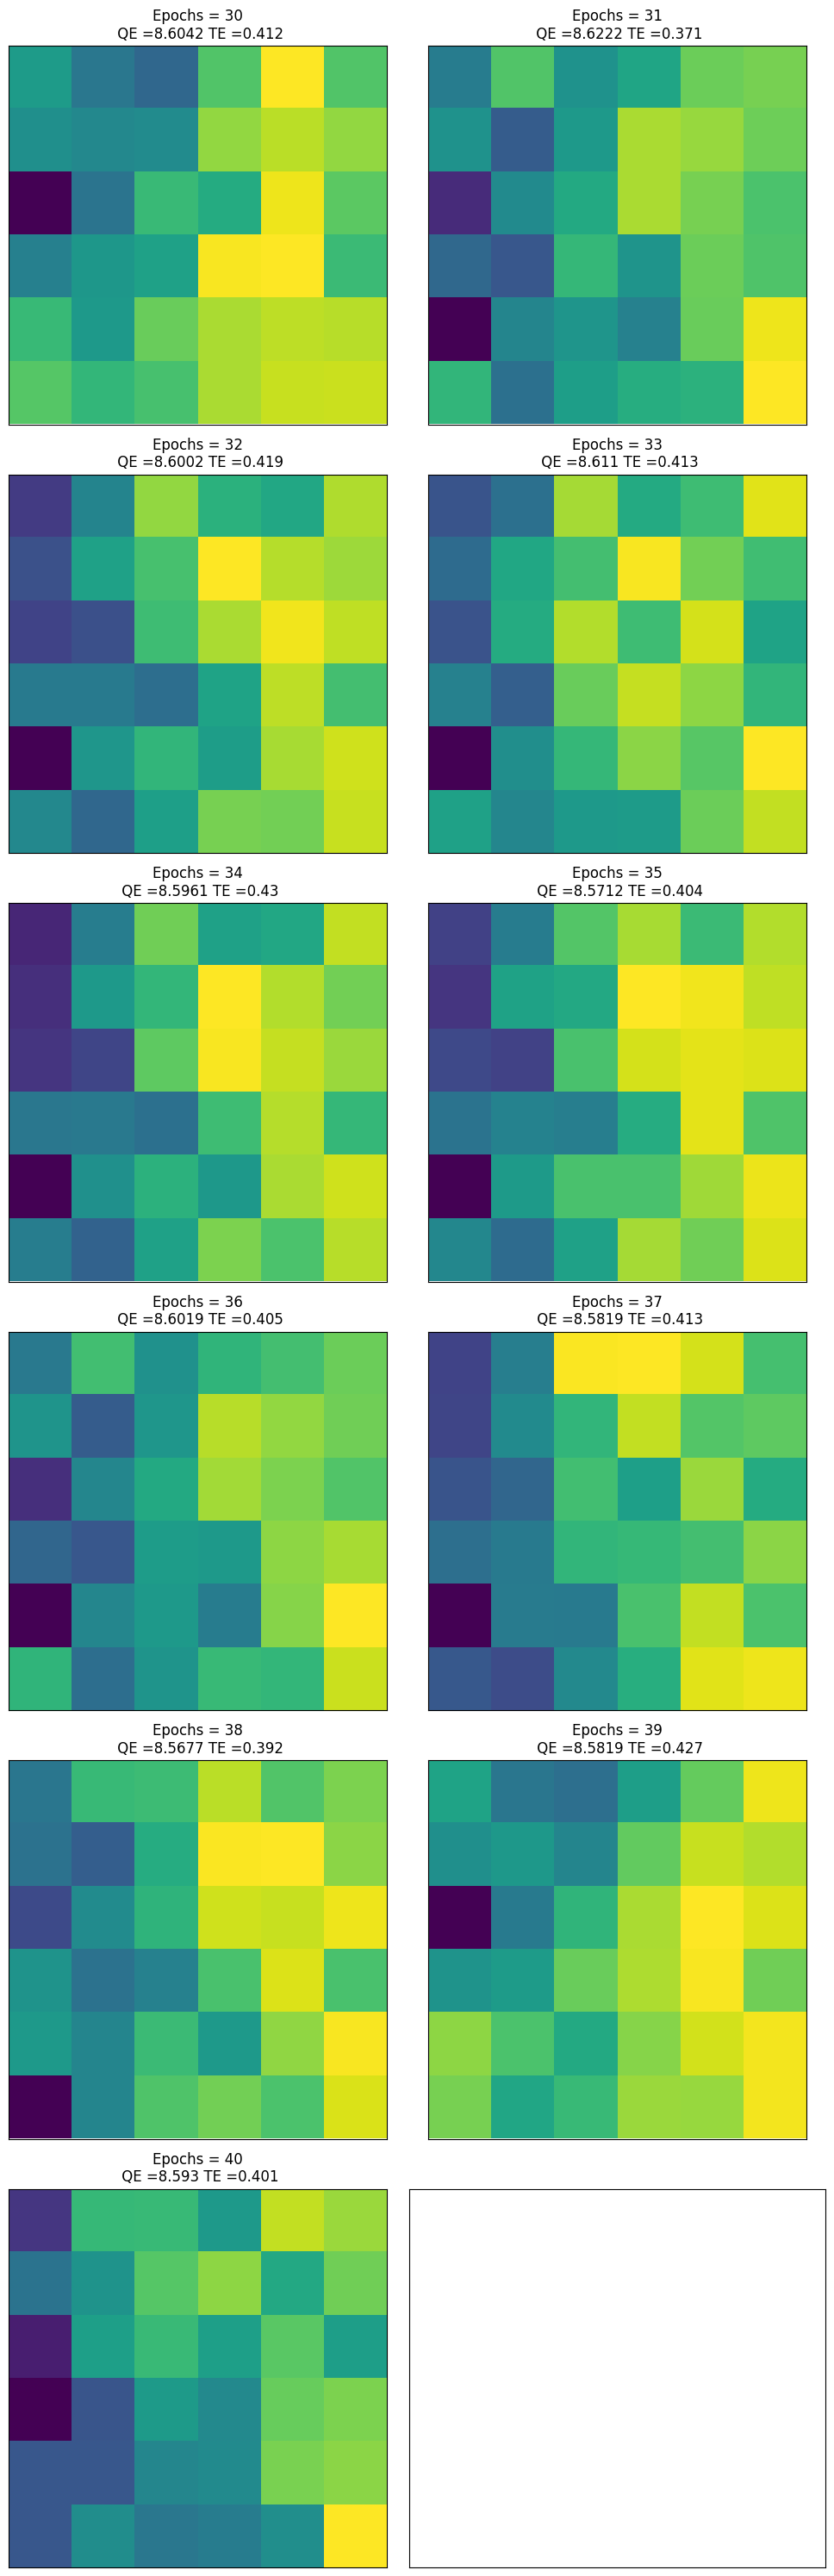

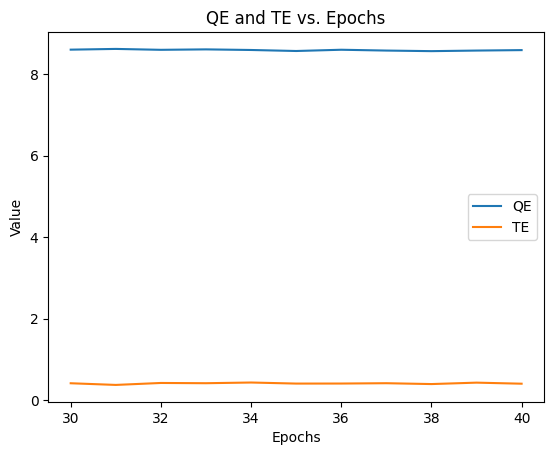

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Define start and end epochs values
start_epochs = 30
end_epochs = 40


num_plots = len(range(start_epochs, end_epochs + 1))  # Count the number of subgraphs to draw
num_rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows in the subgraph
fig, ax = plt.subplots(
    nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
SOMS = []
qe_values = []
te_values = []

for epochs, i in zip(range(start_epochs, end_epochs + 1), range(start_epochs, end_epochs + 1)):  # Set epochs range and number of subgraphs
    total_epochs += epochs
    SOM = train_SOM(SOM, n_train_data, learn_rate = .1, radius_sq = 2, epochs = epochs)
    SOMS.append(SOM)
    QE = round(calculateQE(SOM, n_train_data), 4)
    TE = round(calculateTE(SOM, n_train_data), 4)
    qe_values.append(QE)
    te_values.append(TE)

    # PATH
    save_path = "/content/drive/MyDrive/Image_SOMpkl/"
    with open(save_path + f'som_epochs_{epochs}.pkl', 'wb') as f:
        pickle.dump(SOM, f)

    row = (i - start_epochs) // 2  # Calculates the row index of the subgraph
    col = (i - start_epochs) % 2   # Calculates the column index of the subgraph
    ax[row, col].imshow(u_matrix(SOM))
    ax[row, col].title.set_text('Epochs = ' + str(epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))


plt.tight_layout()  # Avoid overlap


plt.figure()
plt.plot(range(start_epochs, end_epochs + 1), qe_values, label='QE')
plt.plot(range(start_epochs, end_epochs + 1), te_values, label='TE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('QE and TE vs. Epochs')
plt.legend()
plt.show()


In [ ]:
SOM = SOMS[1]

In [ ]:
find_BMU(SOM, normalise(train_data,featureImagePairs[0]['feature']))

(4, 2)

In [ ]:
# Make sure that the SOMimages list matches the dimensions of the SOM
SOMimages = []
for i in range(len(SOM)):
    row = []
    for j in range(len(SOM[0])):
        row.append([])
    SOMimages.append(row)

In [ ]:
# Each feature vector is associated with BMU
for fi in featureImagePairs:
    g,h = find_BMU(SOM, normalise(train_data, fi['feature']))
    SOMimages[g][h].append(fi)

In [ ]:
SOMimages[0][0]

[{'image': 'photo_8_page_19_image_21.jpg',
  'feature': array([0.6397125 , 1.0097803 , 0.49140355, ..., 0.8284151 , 0.08516309,
         0.        ], dtype=float32)},
 {'image': 'photo_8_page_24_image_14.jpg',
  'feature': array([0.        , 0.4837866 , 0.88367003, ..., 1.6724758 , 0.55868876,
         0.55632204], dtype=float32)},
 {'image': 'photo_8_page_12_image_15.jpg',
  'feature': array([1.3765900e-03, 2.7361912e-01, 4.3730295e-01, ..., 2.7063608e+00,
         2.8906831e-01, 6.1715055e-01], dtype=float32)},
 {'image': 'photo_8_page_24_image_13.jpg',
  'feature': array([0.       , 1.0628445, 1.7749323, ..., 1.9594934, 1.8741319,
         0.7379637], dtype=float32)},
 {'image': 'photo_8_page_39_image_25.jpg',
  'feature': array([0.6776571 , 0.5568318 , 0.54588   , ..., 1.558089  , 0.23588173,
         0.13008395], dtype=float32)},
 {'image': 'photo_8_page_28_image_27.jpg',
  'feature': array([0.2686279 , 2.0465426 , 1.3261895 , ..., 1.2294099 , 0.85361487,
         0.76052475], dty

In [ ]:
[[len(c) for c in r] for r in SOMimages]

[[34, 17, 36, 39, 28, 45],
 [25, 31, 27, 17, 21, 32],
 [25, 18, 21, 38, 27, 29],
 [31, 28, 15, 29, 25, 37],
 [25, 30, 26, 17, 18, 35],
 [35, 19, 29, 24, 35, 32]]

#C.2 Map image

In [ ]:
from scipy import spatial

imageGrid = []
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            #Find the image closest to the SOM vector
            closest_image = min(cell, key=lambda x: spatial.distance.cosine(x['feature'], SOM[g][h]))
            imageGrid.append(closest_image['image'])
        else:
            imageGrid.append('white.png')

def img_reshape(img):
    img_path = os.path.join(Files_Path, img)
    img = Image.open(img_path).convert('RGB')
    img = img.resize((100, 100))
    img = np.asarray(img)
    return img

In [ ]:
# Create a dictionary to store the mapping between the image of the SOM node and the original file name
SOM_image_filenames = {}

for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            image_filename = cell[0]['image']
            SOM_image_filenames[(g, h)] = image_filename

# Prints an image and the original file name for each SOM node
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            image_filename = cell[0]['image']
            print(f"SOM node ({g}, {h}) , corresponding original file name is: {image_filename}")


In [ ]:
import shutil

# Set the path to the destination folder
target_folder_path = '/content/drive/MyDrive/Image_Project'

# Copy the image file to the destination folder
for image_filename in imageGrid:
    source_image_path = os.path.join(Files_Path, image_filename)  # original path
    target_image_path = os.path.join(target_folder_path, image_filename)  # target path
    shutil.copy(source_image_path, target_image_path)  # copy


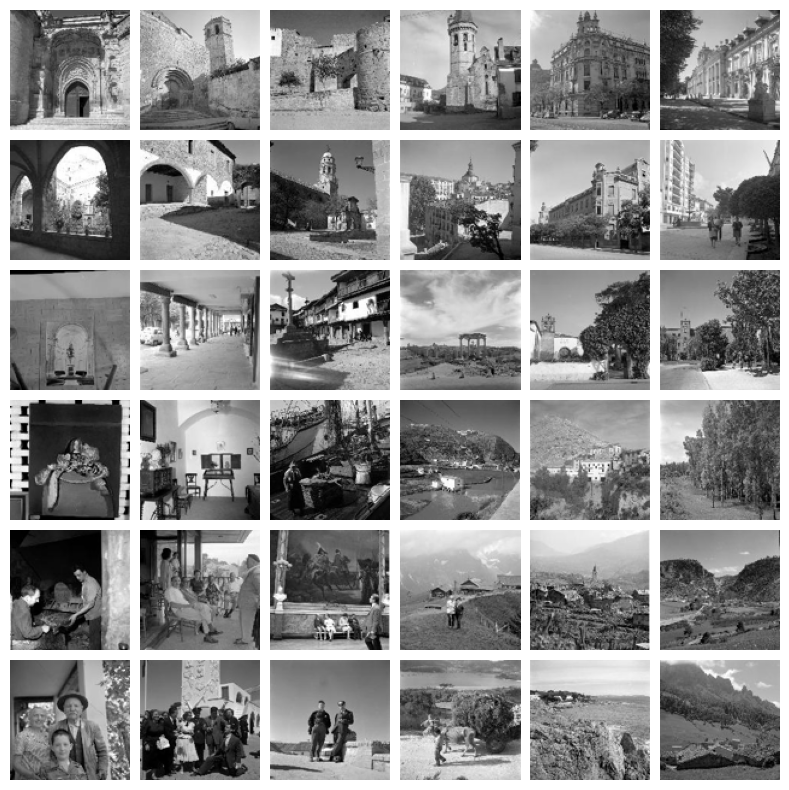

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

img_arr = []
for image in imageGrid:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(6, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.axis('off')
save_path = '/content/drive/MyDrive/'  # PATH
plt.savefig(save_path)
plt.show()

# C.3 Activate image SOM with different input

# C.3.1 Input text

In [ ]:
# In order to match the text vector, I tried to reduce the dimension of the image vector to
# 300 with PCA when training. Finally, SOM can be trained, but the content is meaningless. Perhaps text
# vectors and picture vectors of the same dimension express different meanings. So I also trained
# a SOM for the description of the image in order to search the text.

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import enchant
import pickle
from sklearn.neighbors import NearestNeighbors

In [ ]:
import glob, os, sys
import numpy as np
import pickle
import csv

In [ ]:
import sys
# update the location
sys.path.append('/content/drive/MyDrive/LiteratureSim')

In [ ]:
!pip install PyMuPDF

In [ ]:
# Colab has problems when I load self-defined modules, so here I define TextModel2 directly in the cell

import ebooklib, re, os, gensim
from ebooklib import epub
from PyPDF2 import PdfReader

import numpy as np

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words, stopwords, names

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import TruncatedSVD # also known as Latent semantic analysis

import enchant

ENGLISH_DICT1 = enchant.Dict("en_UK")
ENGLISH_DICT2 = enchant.Dict("en_US")

STOP_WORDS = stopwords.words("english")
LEMMATIZER = WordNetLemmatizer()
STEMMER = PorterStemmer()

def is_english_word(word):
    # Initialize the Enchant English dictionary
    return (ENGLISH_DICT1.check(word) or ENGLISH_DICT2.check(word))

def preprocess(paragraphs):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    stop_words = stopwords.words("english")

    processed_docs = []

    for paragraph in paragraphs:
        words = gensim.utils.simple_preprocess(paragraph, min_len = 3, deacc=True)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        filtered_words = [word for word in lemmatized_words if ((word not in stop_words)and(is_english_word(word)))]
        #stemmed_words = [stemmer.stem(word) for word in filtered_words]
        #processed_doc = " ".join(stemmed_words)
        processed_doc = " ".join(filtered_words)
        processed_docs.append(processed_doc)
    return processed_docs

def merge_strings_until_limit(strings, min_length, max_length, test_for_max = 0):
    merged_string = ""
    merged_strings = []

    for s in strings:
        if len(merged_string) <= min_length:
            merged_string += s

        elif len(merged_string) > max_length and test_for_max<5:
                splitParagraph = merged_string.split('.')
                splitParagraphRePoint = []
                for sp in splitParagraph:
                    splitParagraphRePoint.append(sp+'.')

                merged = merge_strings_until_limit(splitParagraphRePoint, min_length, max_length, test_for_max+1)
                merged_strings.extend(merged)
                merged_string = s
        else:
            merged_strings.append(merged_string)
            merged_string = s

    if merged_string:
        merged_strings.append(merged_string)

    return merged_strings

def read_epub_paragraphs(epub_file, ID, filetype):
    book = epub.read_epub(epub_file)
    paragraphs = []

    for item in book.get_items_of_type(ebooklib.ITEM_DOCUMENT):
        content = item.get_content().decode('utf-8')
        content = re.sub('<[^<]+?>', '', content)
        content = re.sub('\s+', ' ', content)
        content = re.sub('\n', ' ', content)

        paragraphs.extend(content.strip().split("&#13;"))

    paragraphs = merge_strings_until_limit(paragraphs, 200, 1000)
    paragraphs = [{'paragraph':paragraphs[i], 'nr':i, 'ID':ID, 'type':filetype} for i in range(len(paragraphs))]
    return paragraphs[1:-1]

def read_csv_paragraphs(csv_file, ID, filetype):
    paragraphs = []
    with open(csv_file, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        for row in reader:
            paragraph = row['paragraph']
            nr = row['nr']
            ID = row['ID']
            paragraphs.append({'paragraph': paragraph, 'nr': nr, 'ID': ID, 'type': filetype})
    return paragraphs



class TextModel2:
    def __init__(self, files, vectorization='lsa', dimension=200, min_df=2):
        self.vectorization = vectorization
        self.paragraphs = []

        for f in files:
            ID = os.path.splitext(os.path.basename(f))[0]
            filetype = f.split('.')[-1]
            if filetype == 'csv':
                paragraph = read_csv_paragraphs(f, ID, 'csv')

            self.paragraphs.extend(paragraph)

        self.preprocessed_paragraphs = preprocess(p['paragraph'] for p in self.paragraphs)

        if self.vectorization == 'tfidf':
            self.tfidf_vectorizer = TfidfVectorizer(min_df=min_df)
            self.vector_matrix = self.tfidf_vectorizer.fit_transform(self.preprocessed_paragraphs)
        elif self.vectorization == 'lsa':
            self.tfidf_vectorizer = TfidfVectorizer(min_df=min_df)
            self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(self.preprocessed_paragraphs)
            self.svd = TruncatedSVD(n_components=dimension, algorithm='randomized')
            self.vector_matrix = self.svd.fit_transform(self.tfidf_matrix)

        self.nnModel = NearestNeighbors(n_neighbors=10,
                                        metric='cosine',
                                        algorithm='brute',
                                        n_jobs=-1)
        self.nnModel.fit(self.vector_matrix)

    def vectorize(self, query):
        if self.vectorization == 'lsa':
            processedQuery = preprocess([query])[0]
            tfidf_query = self.tfidf_vectorizer.transform([processedQuery])
            query_vector = self.svd.transform(tfidf_query)
            return query_vector
        elif self.vectorization == 'tfidf':
            processedQuery = preprocess([query])[0]
            query_vector = self.tfidf_vectorizer.transform([processedQuery])
            return query_vector

    def search(self, query, n=3, distance=False):
        qv = self.vectorize(query)
        neighbours = self.nnModel.kneighbors(qv, n, return_distance=distance)[0]
        paragraphs = [tuple(p.items()) for p in (self.paragraphs[i] for i in neighbours)]
        unique_paragraphs = list(set(paragraphs))
        return [dict(p) for p in unique_paragraphs]

    def get_key_words(self, v, n=10):
        if self.vectorization == 'lsa':
            v = self.svd.inverse_transform(v)[0]
            top_indices = np.argpartition(v, -n)[-n:]
            words = self.tfidf_vectorizer.get_feature_names_out()
            return [words[i] for i in top_indices]
        elif self.vectorization == 'tfidf':
            top_indices = np.argpartition(v, -n)[-n:]
            words = self.tfidf_vectorizer.get_feature_names_out()
            return [words[i] for i in top_indices]

In [ ]:
IMAGE_DIR='/content/drive/MyDrive/ImageCSV'
IMAGE_FILES = []
IMAGE_FILES.extend(glob.glob(os.path.join(IMAGE_DIR, '*')))

In [ ]:
import csv

In [ ]:
imagefuyu_model = TextModel2(IMAGE_FILES,vectorization='lsa',min_df=3)

In [ ]:
import pickle

save_path = "/content/drive/MyDrive/image_fuyu_model2.pkl"

with open(save_path, 'wb') as f:
    pickle.dump(imagefuyu_model, f)

In [ ]:
import pickle

load_path = "/content/drive/MyDrive/image_fuyu_model2.pkl"

with open(load_path, 'rb') as f:
    imagefuyu_model = pickle.load(f)


In [ ]:
imagefuyu_model.search('dog', n=10)

[{'paragraph': 'In the picture, a man is walking his dog on a leash next to a horse. The dog is standing beside the horse, and the man is walking the dog while the dog is attentively watching.\n',
  'nr': '477',
  'ID': 'photo_8_page_32_image_12.jpg',
  'type': 'csv'},
 {'paragraph': 'In the picture, a man is riding a horse-drawn carriage down a street, accompanied by two dogs. The horse and carriage are positioned in the middle of the street, with the horse and dogs walking next to each other.\n\nThere are multiple people present in the scene, some standing close to the carriage and others further away. One person is standing close to the left side of the carriage, while another is standing near the right edge. Additionally, there is a third person standing in the middle of the street, closer to the left side of the picture.\n\nA car is parked on the left side of the street, and another person is standing',
  'nr': '1070',
  'ID': 'photo_8_page_27_image_11.jpg',
  'type': 'csv'},
 {'p

In [ ]:
import torch
import SOM as SOMlib
import matplotlib.pyplot as plt

In [ ]:
# Dimensions of the SOM grid
m = 5
n = 5
# Number of training examples
n_x = 1100
rand = np.random.RandomState(0)
# Initialize the training data
train_data = imagefuyu_model.vector_matrix

# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

20
21
22
23
24
25


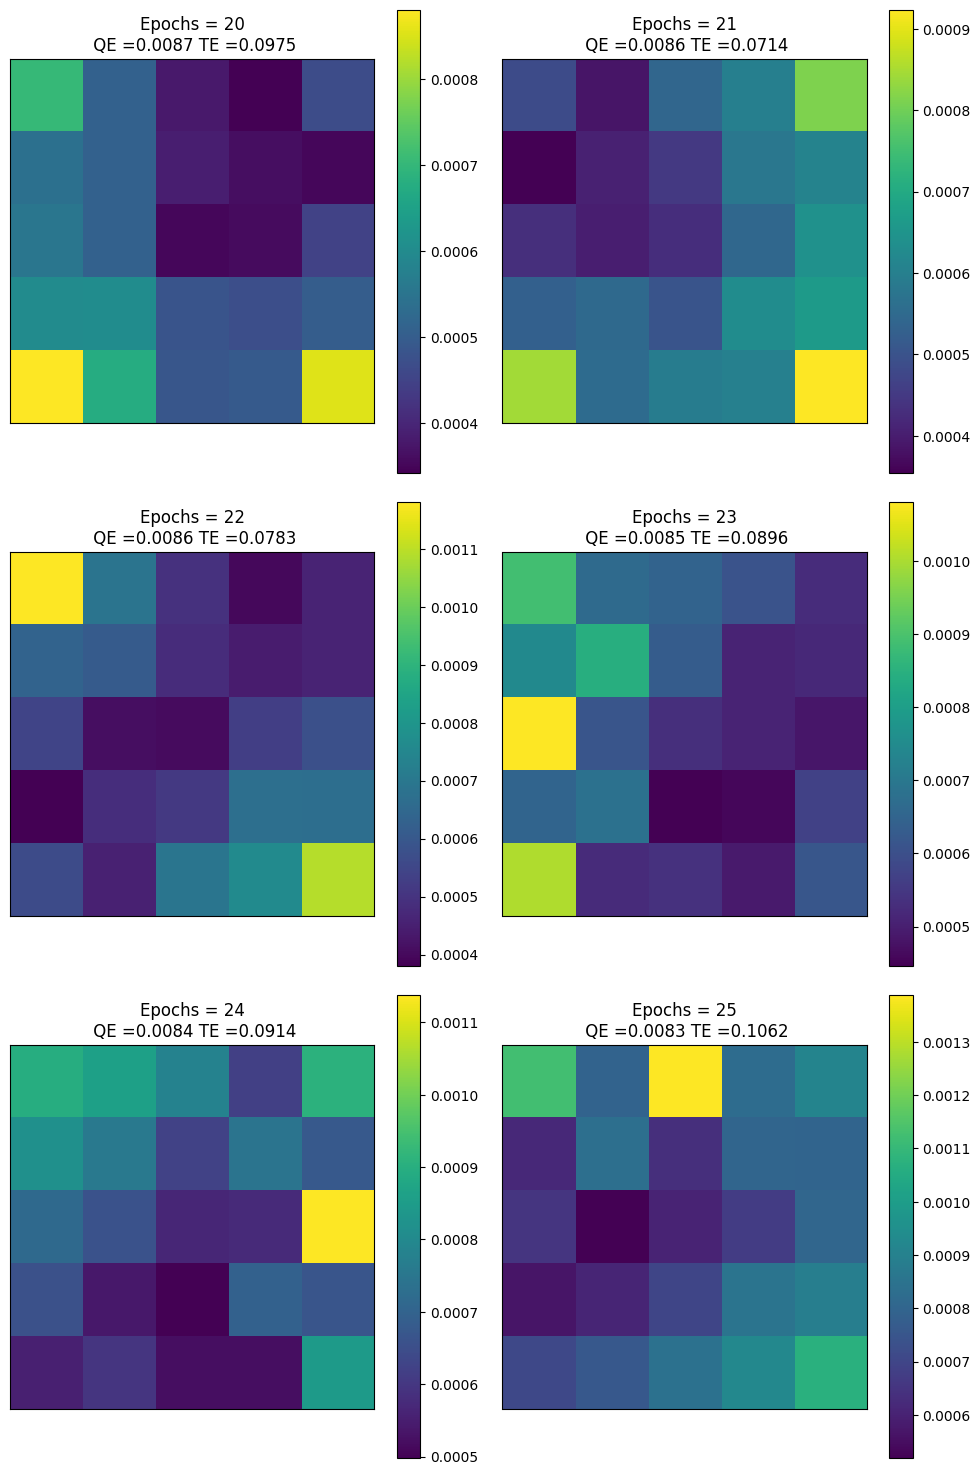

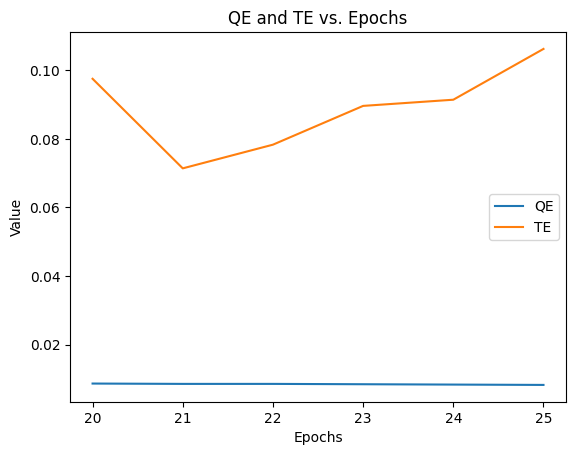

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Initialize the SOM randomly
som = rand.uniform(-0.5, 0.5, (m, n, len(train_data[0])))

num_plots = len(range(20, 26))
num_rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows for subplots
fig, ax = plt.subplots(
    nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
soms = []
qe_values = []  # Stores the QE value after each iteration
te_values = []  # Stores the TE value after each iteration
for epochs, i in zip(range(20, 26), range(20, 26)):  # Number of epochs and number of subgraphs
    print(i)
    total_epochs += epochs
    som = SOMlib.train_SOM(som, n_train_data, learn_rate=0.3, radius_sq=5, epochs=epochs)
    soms.append(som)
    QE = round(SOMlib.calculateQE(som, n_train_data), 4)
    TE = round(SOMlib.calculateTE(som, n_train_data), 4)
    qe_values.append(QE)  # Add the QE value to the list
    te_values.append(TE)


    save_path = "/content/drive/MyDrive/pickle_files/"
    with open(save_path + f'imagefuyu_som_epochs_{epochs}.pkl', 'wb') as f:
        pickle.dump(som, f)

    row = (i - 20) // 2  # Calculates the row index of the subgraph
    col = (i - 20) % 2   # Calculates the column index of the subgraph
    im = ax[row, col].imshow(SOMlib.u_matrix(som))
    ax[row, col].title.set_text('Epochs = ' + str(epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))
    fig.colorbar(im, ax=ax[row, col])

plt.tight_layout()  # prevent overlap

# Draw the line chart of the changes of QE and TE with epochs
plt.figure()
plt.plot(range(20, 26), qe_values, label='QE')
plt.plot(range(20, 26), te_values, label='TE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('QE and TE vs. Epochs')
plt.legend()
plt.show()


In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/pickle_files/imagefuyu_som_epochs_21.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

start_color = (0, 148, 148)
middle_color = (241, 235, 201)
end_color = (209, 87, 127)

start_color = tuple(map(lambda x: x / 255, start_color))
middle_color = tuple(map(lambda x: x / 255, middle_color))
end_color = tuple(map(lambda x: x / 255, end_color))

colors = [start_color, middle_color, end_color]

cmap_diverging = LinearSegmentedColormap.from_list('my_cmap', colors)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(imagefuyu_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

In [ ]:
save_dir = '/content/drive/MyDrive/SomImage'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
with open('/content/drive/MyDrive/LiteratureSim/novel_model2.pkl', 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
# Ten examples
import random

paragraphs_list = []

random_paragraph_indices = random.sample(range(len(novel_model.paragraphs)), 10)
for i in random_paragraph_indices:
    paragraph_content = novel_model.paragraphs[i]['paragraph']
    paragraphs_list.append(paragraph_content)

print(paragraphs_list)


[' I had visited Bayreuth once myself, in the 1920s; nearly every music lover who passes through Bavaria did, before Wagnerism became synonymous with Nazism. I had experienced the excellent acoustics of the Festspielhaus, so enchantingly designed by Wagner that operagoers were said to wander the village in a daze for hours after a performance, barely able to distinguish fantasy from reality.', ' Count Guzmán toyed with composition, but most of all he loved to teach. He had tutored many court musicians and even King Alfonso XIII, from the time the boy King was old enough to sit at a piano bench. The scores the count had used with royals and court prodigies were still marked from those long-ago lessons.', ' I didn\'t say anything. Aviva reached for my hand but I ignored her. She pushed a water glass across the table. When I ignored that, she dipped a napkin in the water and held it toward my brow. "You can\'t say yes on my behalf," I said finally.', " Many who passed through Campo Seco s

Best Match - Index: (0, 4), Content: photo_8_page_27_image_19.jpg


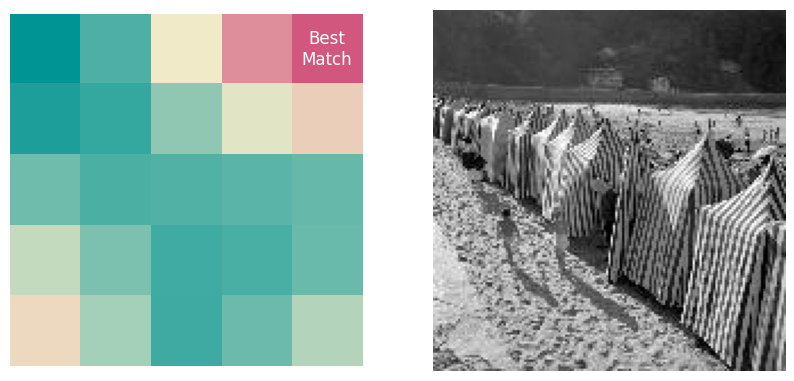

Best Match - Index: (0, 2), Content: photo_8_page_24_image_8.jpg


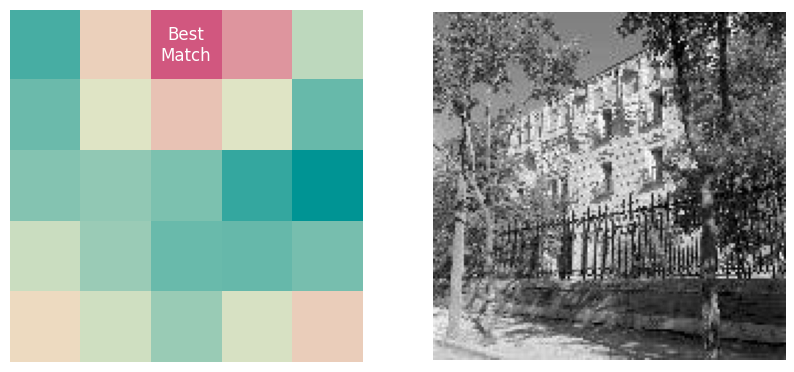

Best Match - Index: (0, 4), Content: photo_8_page_27_image_19.jpg


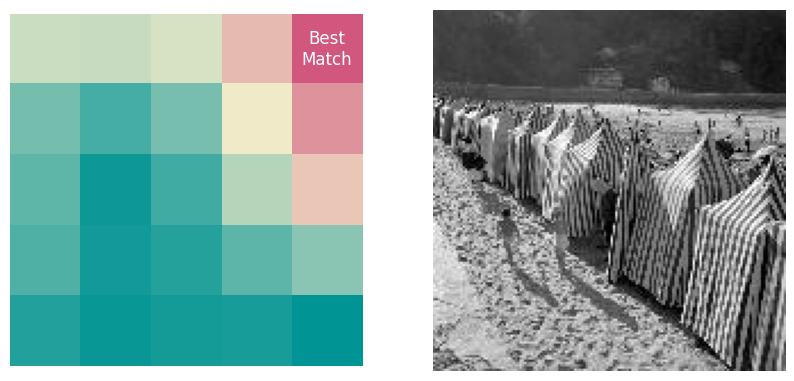

Best Match - Index: (4, 0), Content: photo_8_page_26_image_14.jpg


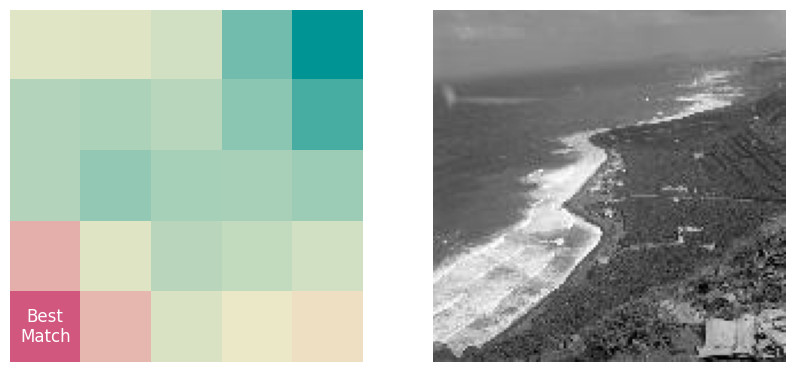

Best Match - Index: (0, 0), Content: photo_8_page_25_image_14.jpg


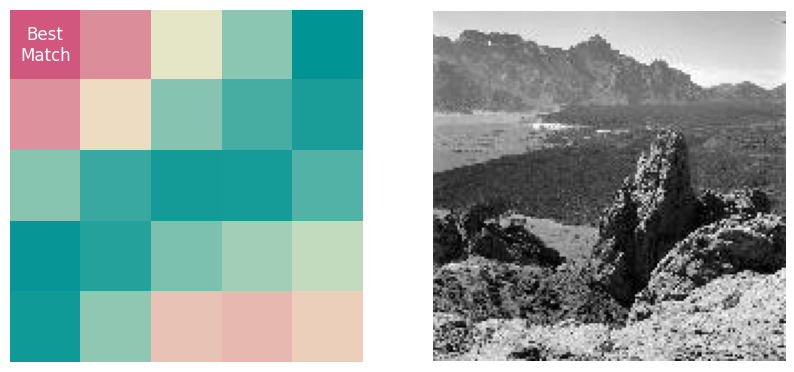

Best Match - Index: (0, 4), Content: photo_8_page_27_image_19.jpg


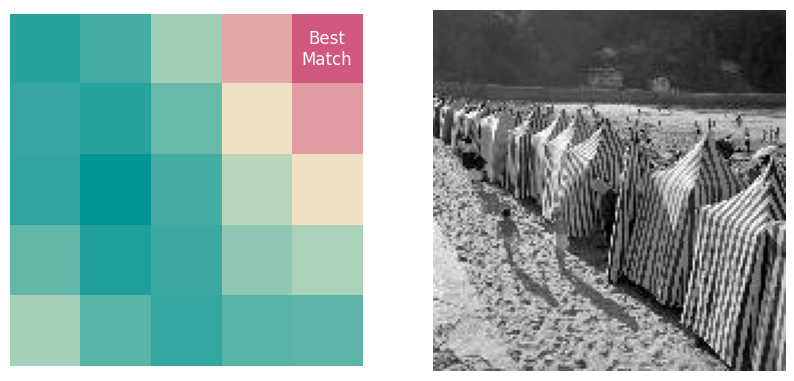

Best Match - Index: (1, 0), Content: photo_8_page_12_image_12.jpg


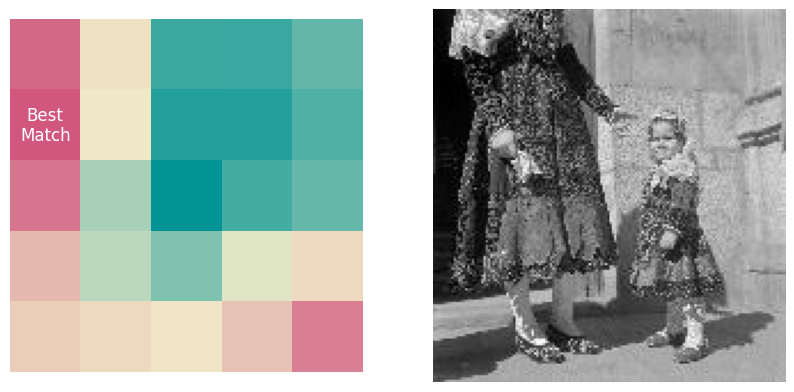

Best Match - Index: (4, 4), Content: photo_8_page_13_image_22.jpg


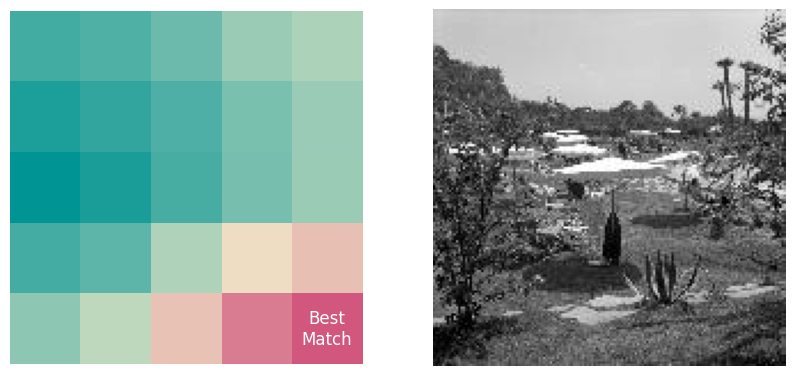

Best Match - Index: (4, 0), Content: photo_8_page_26_image_14.jpg


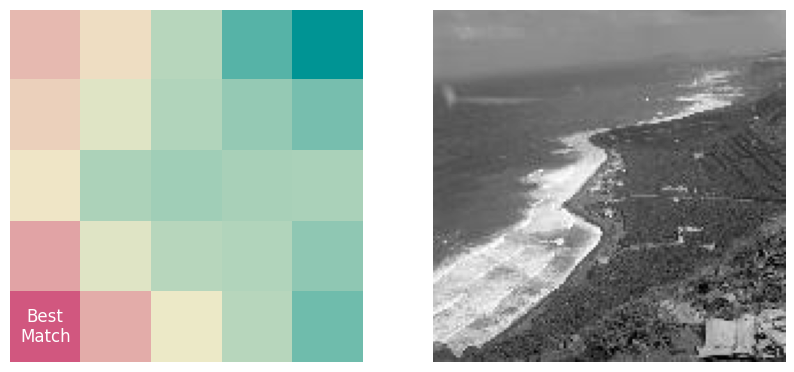

Best Match - Index: (4, 4), Content: photo_8_page_13_image_22.jpg


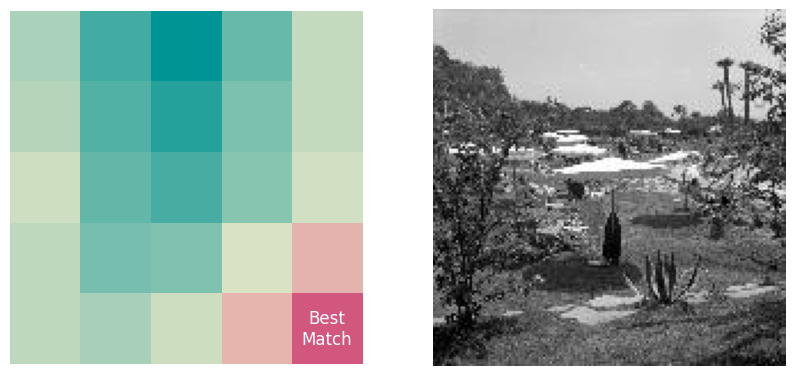

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

for input_sentence in paragraphs_list:
    vectorized_input_sentence = novel_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    top_index = np.argmax(activated_SOM)
    top_coordinate = (top_index // activated_SOM.shape[1], top_index % activated_SOM.shape[1])

    # Creates an image that contains two subgraphs
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display SOM images
    axes[0].imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    # axes[0].set_title(input_sentence)
    axes[0].axis('off')

    axes[0].text(top_coordinate[1], top_coordinate[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')
    top_sentence = neuron_word_mapping[top_coordinate][0]["ID"]
    print(f"Best Match - Index: {top_coordinate}, Content: {top_sentence}")

    # Gets the image file name corresponding to the cell ID
    image_file_name = neuron_word_mapping[top_coordinate][0]["ID"]

    # Concatenate file paths
    image_path = os.path.join("/content/drive/MyDrive/ImageSom2", image_file_name)

    # Load and display the image
    image = plt.imread(image_path)

    # Grayscale color mapping
    axes[1].imshow(image, cmap='gray')
    axes[1].axis('off')

    plt.show()


#C.3.2 Input image

In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/Image_SOMpkl/som_epochs_38.pkl"

with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)
SOM = soms

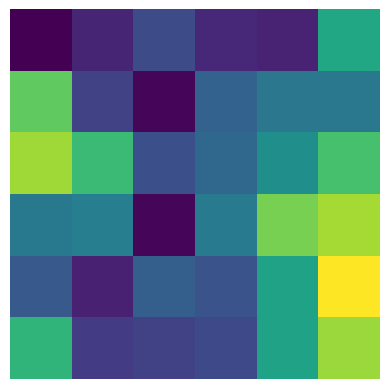

In [ ]:
activatedSOM = activate(train_data, SOM, normalise(train_data,featureImagePairs[34]['feature']))
fig = plt.figure()
plt.imshow(activatedSOM)
plt.axis('off')
plt.show()

In [ ]:
def distance_between(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)
    return np.linalg.norm(a - b)

In [ ]:
def find_closest_image_index(distance):
    closest_index = 0
    distance_closest = distance[0]

    for index in range(1, len(distance)):
        if distance[index] < distance_closest:
            distance_closest = distance[index]
            closest_index = index

    return closest_index

In [ ]:
image_data_dict = []
for i in range(len(SOM)):
    row = []
    for j in range(len(SOM[0])):
        row.append([])
    image_data_dict.append(row)
for i in featureImagePairs:
    query=i['feature']
    g,h = find_BMU(SOM,query)
    image_data_dict [g][h].append(i)

In [ ]:
def get_closest_image(a,b):
  cell = SOM[a][b]
  distance = [distance_between(cell, i['feature']) for i in image_data_dict[a][b]]
  closest_image_index=find_closest_image_index(distance)
  return closest_image_index

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import image as mpimg

def search_imagesom(query):
    result=[]
    query_features=[]
    path_prefix = '/content/drive/MyDrive/ImageSom2/'
    path = query
    q_f = processImage(path, model)
    query_features.append(q_f)
    activatedSOM = activate(n_train_data, SOM, query_features)
    fig = plt.figure(figsize=(7, 3))

    plt.subplot(1, 2, 1)
    im = plt.imshow(activatedSOM, cmap=cm.viridis, aspect='auto')
    plt.title(f'SOM Activation\nQE = {QE}, TE = {TE}')
    plt.colorbar(im, shrink=0.95, label='Distance')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    g, h = find_BMU(SOM, query_features)
    closest_image_index = get_closest_image(g, h)
    closest_image_path = path_prefix + image_data_dict[g][h][closest_image_index]['image']
    closest_image = mpimg.imread(closest_image_path)
    plt.imshow(closest_image, cmap='gray')
    plt.title('Closest Image')
    plt.axis('off')
    plt.show()

    return result


1/1 [==============================] - 0s 61ms/step


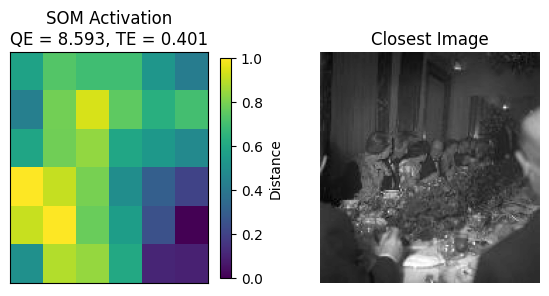

[]

In [ ]:
search_imagesom('/content/drive/MyDrive/ImageSom2/photo_8_page_10_image_14.jpg')

1/1 [==============================] - 0s 65ms/step


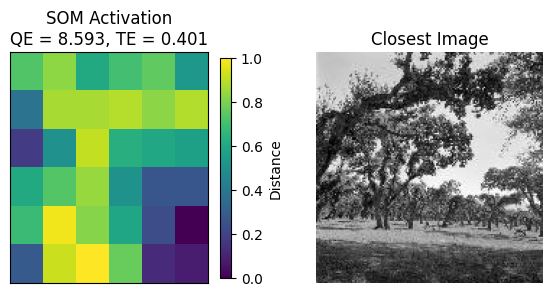

1/1 [==============================] - 0s 107ms/step


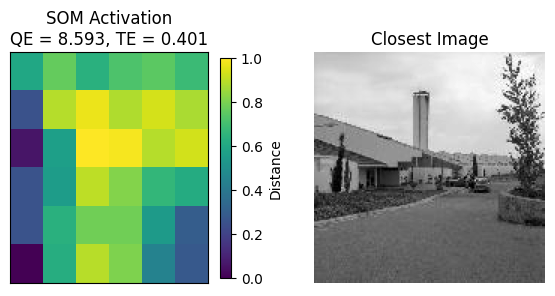

1/1 [==============================] - 0s 95ms/step


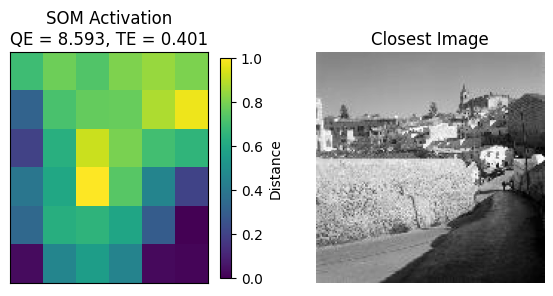

1/1 [==============================] - 0s 133ms/step


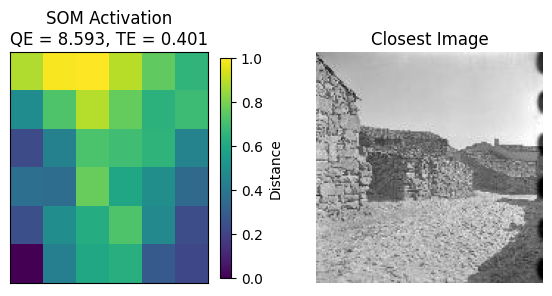

1/1 [==============================] - 0s 96ms/step


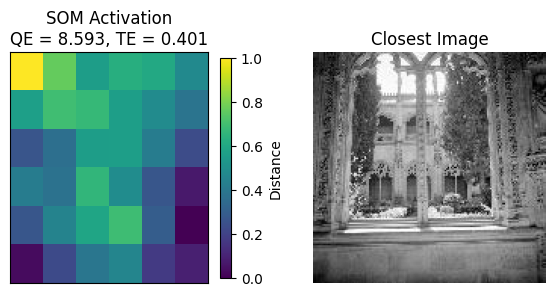

1/1 [==============================] - 0s 116ms/step


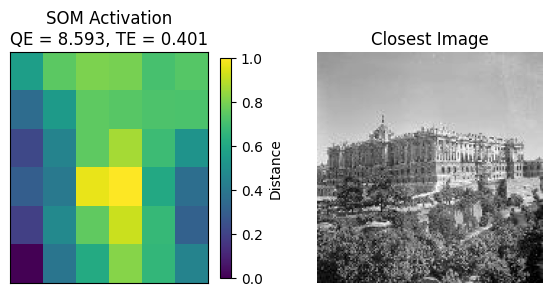

1/1 [==============================] - 0s 62ms/step


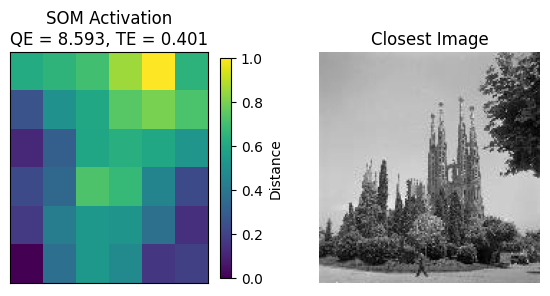

1/1 [==============================] - 0s 65ms/step


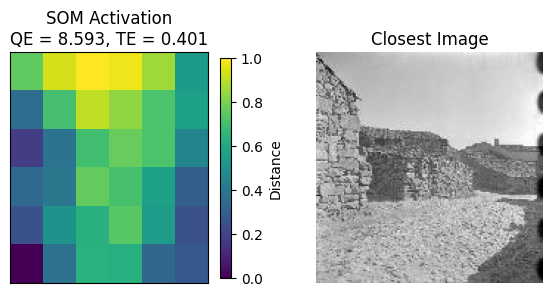

1/1 [==============================] - 0s 62ms/step


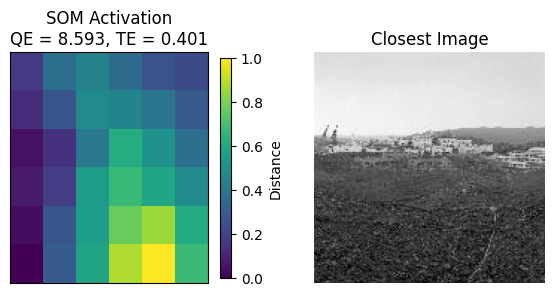

1/1 [==============================] - 0s 204ms/step


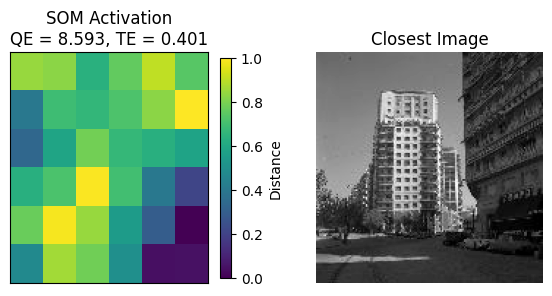

In [ ]:
# Ten examples
import os
import random

folder_path = "/content/drive/MyDrive/ImageSom2"
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
random_images = random.sample(image_files, 10)

for image_file in random_images:
    image_path = os.path.join(folder_path, image_file)
    search_imagesom(image_path)


#C.3.3 Input video

In [ ]:
# Similar to the method used to input pictures, only the code to convert the movie snippet
# into a frame has been added, so the previously defined functions are omitted here

In [ ]:
import cv2
import random

video_path = "/content/drive/MyDrive/film/Dolor_y_gloria.mkv"
video_capture = cv2.VideoCapture(video_path)
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
num_frames_to_extract = 10

extracted_frames = []

selected_frame_indices = random.sample(range(total_frames), num_frames_to_extract)
for frame_index in selected_frame_indices:
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = video_capture.read()
    if ret:
        extracted_frames.append(frame)

video_capture.release()
print("Extracted frames:", len(extracted_frames))


Extracted frames: 10


1/1 [==============================] - 0s 65ms/step


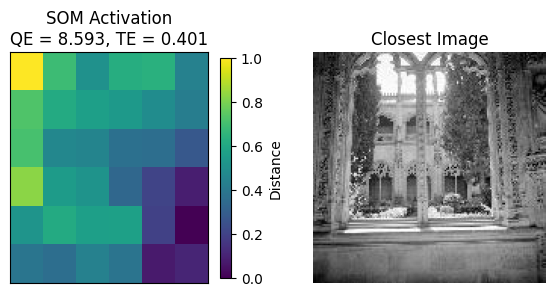

1/1 [==============================] - 0s 110ms/step


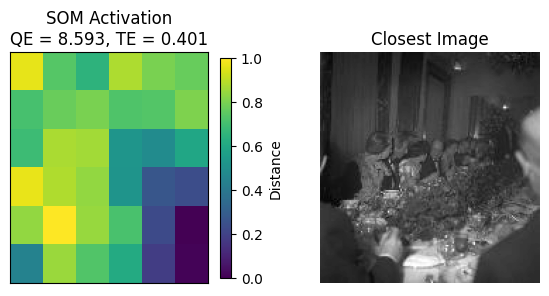

1/1 [==============================] - 0s 106ms/step


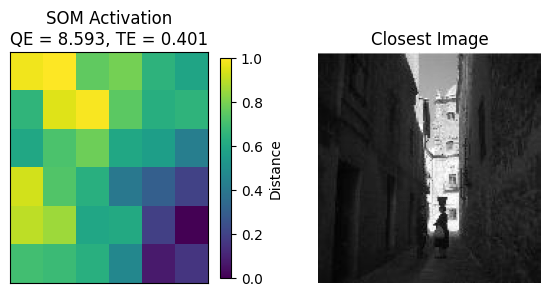

1/1 [==============================] - 0s 105ms/step


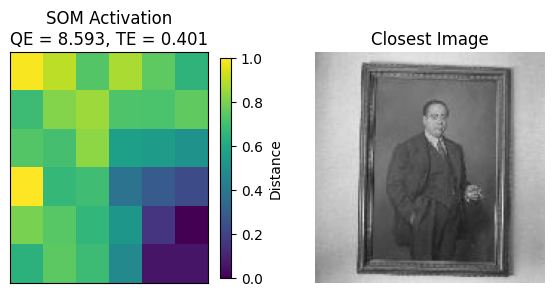

1/1 [==============================] - 0s 98ms/step


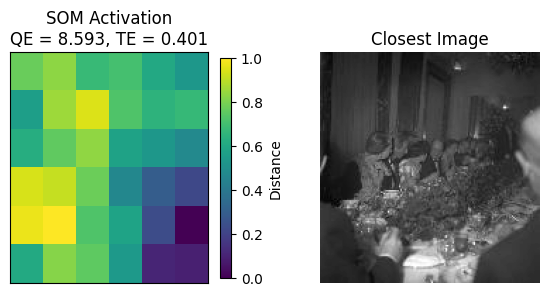

1/1 [==============================] - 0s 96ms/step


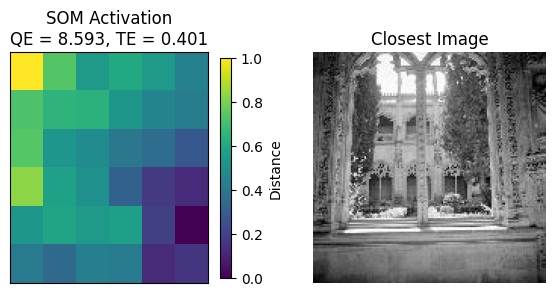

1/1 [==============================] - 0s 91ms/step


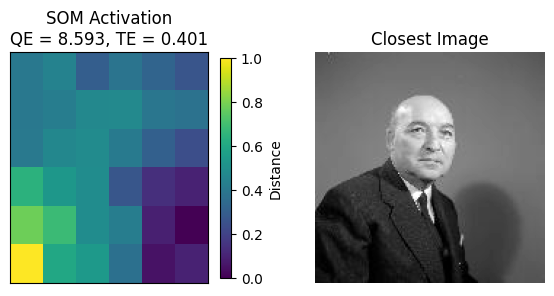

1/1 [==============================] - 0s 59ms/step


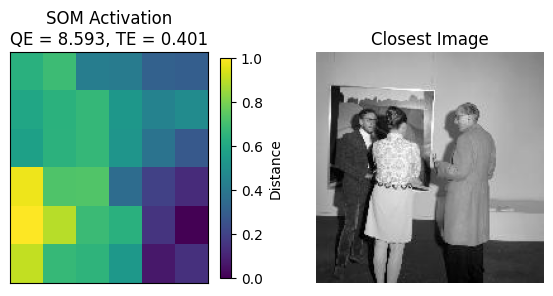

1/1 [==============================] - 0s 70ms/step


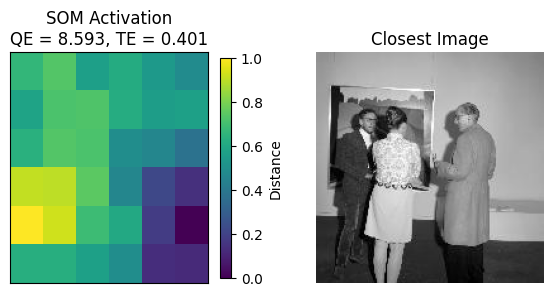

1/1 [==============================] - 0s 67ms/step


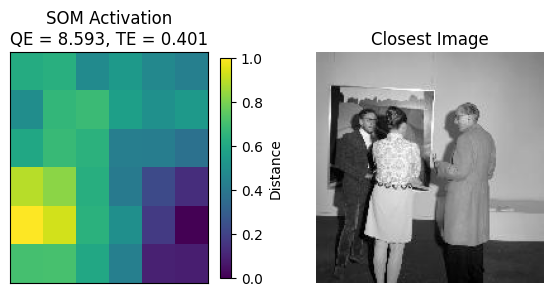

In [ ]:
import tempfile
import os
for frame in extracted_frames:
    temp_image_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_image_path = temp_image_file.name
    cv2.imwrite(temp_image_path, frame)

    search_imagesom(temp_image_path)

    os.unlink(temp_image_path)


# **D. Text-Image-Video Example**

##### I set up three different activation methods for each database. We can use them flexibly to deal with different input types. The search engine accepts any type of input, and the output from the data set can be entered into any other type of data set. Here I want to show our search method in the project. The "image" is obtained from “text", and the corresponding "video" segment is obtained from image.

#### Search in Text Dataset

In [ ]:
# Load the processed text
import pickle
load_path = "/content/drive/MyDrive/LiteratureSim/novel_model2.pkl"
with open(load_path, 'rb') as f:
    novel_model = pickle.load(f)

In [ ]:
# Get initial input
paragraph_values = novel_model.get_key_words(novel_model.vectorize('Chivalry never dies, even though the armor will rust one day, the sword will always be sharp'), n=10)
print(paragraph_values)

['changed', 'tom', 'closer', 'one', 'never', 'kept', 'even', 'always', 'though', 'day']


In [ ]:
# This list will as input of next step
paragraph_values = []

for paragraph in paragraphs_list:
    results = novel_model.search(paragraph, n=1)
    for result in results:
        paragraph_value = result['paragraph']
        paragraph_values.append(paragraph_value)

print("Paragraph Values:", paragraph_values)


Paragraph Values: [' Mockridge thought of other things. ‘Portsmouth,’ he mused. ‘I know a lot of girls there.’ The eye geared to distances had already focused firmly on girls. Stanley Kirkeby agreed and declared that this was just what the doctor ordered.', ' ‘How was it?’ John reflected for a moment, then made a decision and stuck to it. ‘I’m in love,’ he said. ‘Only I was a bit discouraged at first because of the buttons.’ That was no lie, really. For a long time the pleasant scent of her skin lingered in his mind.', ' Noticing my raised eyebrows, he added, "City of Bombs—you know that\'s what they call Barcelona? At least once a year the Ramblas is filled with smoke. Between that and church burnings, the city is reborn. It isn\'t a bad thing, necessarily. There are some nice public plazas where cathedrals once stood."', ' "But I\'m wasting your talent," she said. "You shouldn\'t be giving anyone Spanish lessons. You should be giving music lessons." "Do you play?" I said, too eagerly

#### Load Image SOM and data

In [ ]:
import sys
# update the location
sys.path.append('/content/drive/MyDrive/LiteratureSim')

In [ ]:
import pickle

load_path = "/content/drive/MyDrive/image_fuyu_model2.pkl"

with open(load_path, 'rb') as f:
    imagefuyu_model = pickle.load(f)


In [ ]:
SOM = soms

In [ ]:
# Load the SOM
import pickle
som_file_path = "/content/drive/MyDrive/pickle_files/imagefuyu_som_epochs_21.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)

In [ ]:
# Dimensions of the SOM grid
m = 5
n = 5
# Number of training examples
n_x = 1100
rand = np.random.RandomState(0)
# Initialize the training data
train_data = imagefuyu_model.vector_matrix

# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

start_color = (0, 148, 148)
middle_color = (241, 235, 201)
end_color = (209, 87, 127)

start_color = tuple(map(lambda x: x / 255, start_color))
middle_color = tuple(map(lambda x: x / 255, middle_color))
end_color = tuple(map(lambda x: x / 255, end_color))
colors = [start_color, middle_color, end_color]
cmap_diverging = LinearSegmentedColormap.from_list('my_cmap', colors)

In [ ]:
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(imagefuyu_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

#### Then Search in Image Dataset

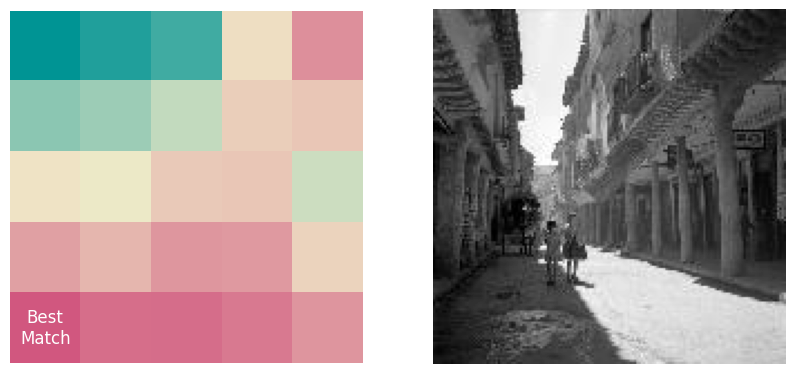

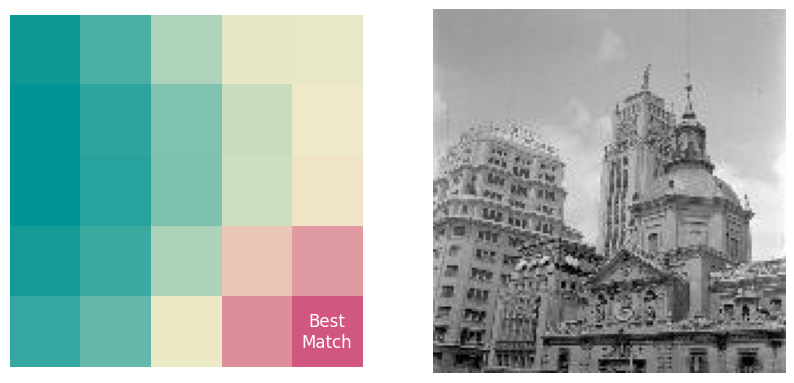

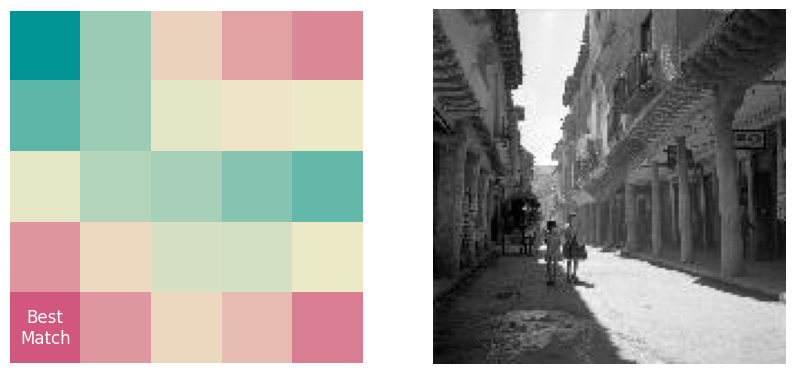

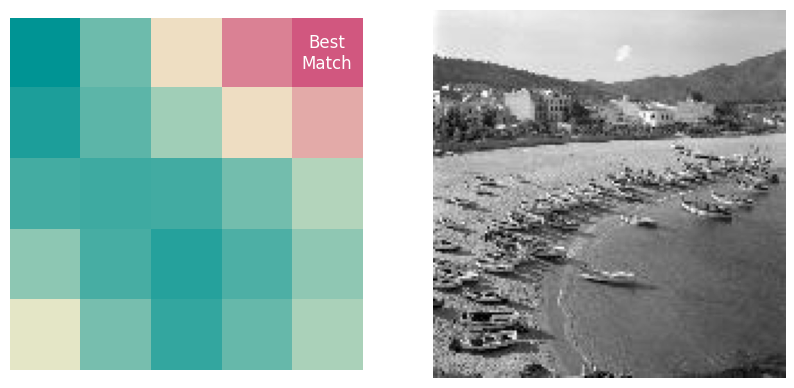

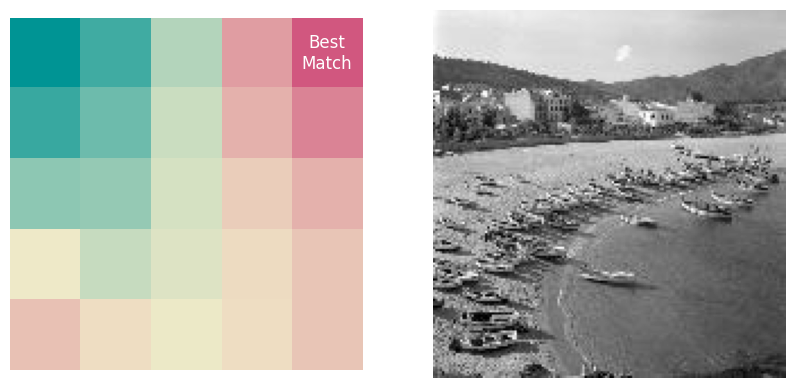

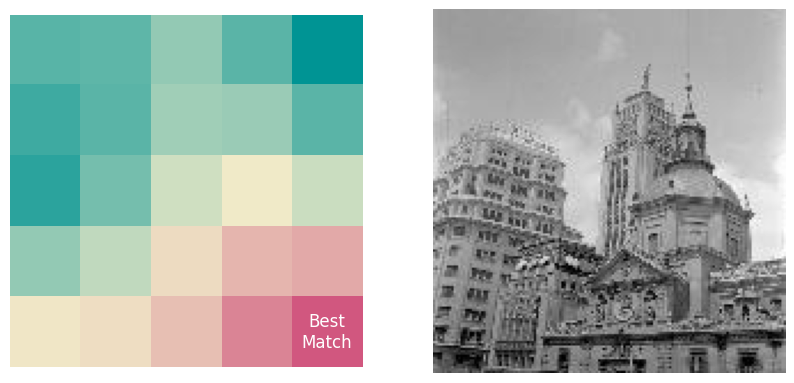

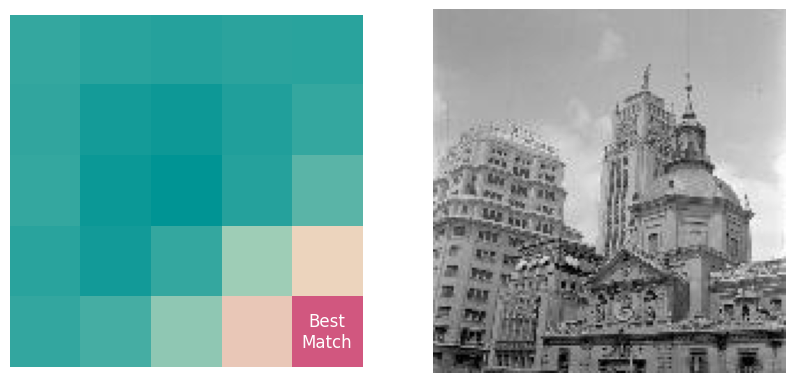

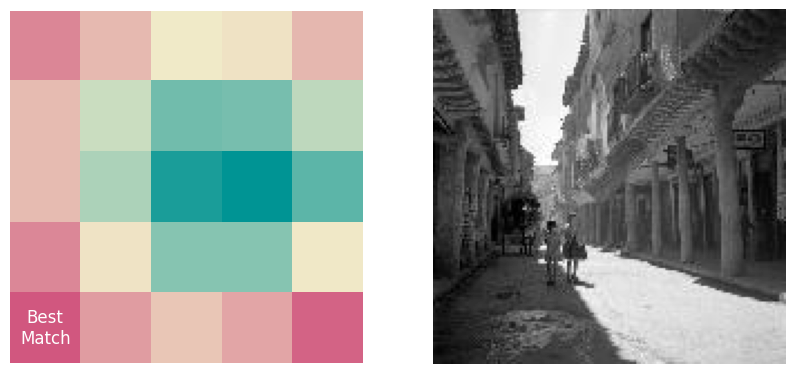

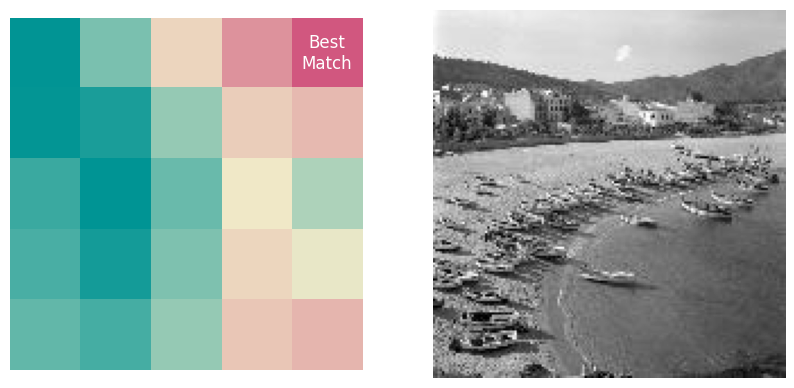

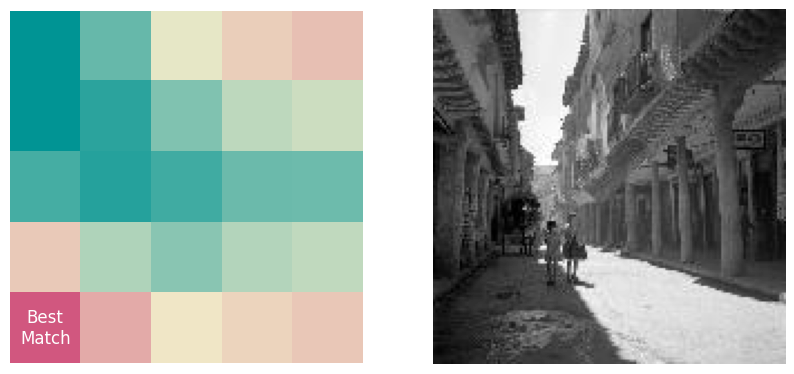

All Top Sentences: ['photo_8_page_24_image_12.jpg', 'photo_8_page_12_image_10.jpg', 'photo_8_page_24_image_12.jpg', 'photo_8_page_21_image_13.jpg', 'photo_8_page_21_image_13.jpg', 'photo_8_page_12_image_10.jpg', 'photo_8_page_12_image_10.jpg', 'photo_8_page_24_image_12.jpg', 'photo_8_page_21_image_13.jpg', 'photo_8_page_24_image_12.jpg']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Store the output id
related_image_list = []

for input_sentence in paragraph_values:
    vectorized_input_sentence = novel_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    top_index = np.argmax(activated_SOM)
    top_coordinate = (top_index // activated_SOM.shape[1], top_index % activated_SOM.shape[1])

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Show SOM
    axes[0].imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    axes[0].axis('off')

    axes[0].text(top_coordinate[1], top_coordinate[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')
    top_sentence = neuron_word_mapping[top_coordinate][0]["ID"]
    related_image_list.append(top_sentence)

    # Get ID
    image_file_name = neuron_word_mapping[top_coordinate][0]["ID"]

    # Concatenated file path
    image_path = os.path.join("/content/drive/MyDrive/ImageSom2", image_file_name)

    # Load and display the picture
    image = plt.imread(image_path)

    # Displays an image with the same name, specified as a grayscale color map
    axes[1].imshow(image, cmap='gray')
    axes[1].axis('off')

    plt.show()

print("All Top Sentences:", related_image_list)


#### Finally we can get the video clip through the Video dataset

In [ ]:
related_image_list

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/image_fuyu.csv"
df = pd.read_csv(file_path)

related_image_list2 = []
for image_name in related_image_list:
    row_index = df.index[df['ID'] == image_name].tolist()

    if row_index:
        related_image_list2.extend(df.iloc[row_index, 1].tolist())

print(related_image_list2)


['In the picture, there is a narrow street with buildings on both sides and a person walking down the middle of the street. The street is surrounded by buildings on both sides, creating a narrow passage.\n\nThere are multiple people walking down the narrow street, some closer to the camera and others farther away. The pedestrians are spread out along the street, with some closer to the camera and others farther away.\n\nThe scene captures the essence of a typical urban environment with people going about their daily activities.', 'In the picture, there is a large building with a clock tower on top of it. The building is surrounded by other buildings, creating a dense urban environment.\n', 'In the picture, there is a narrow street with buildings on both sides and a person walking down the middle of the street. The street is surrounded by buildings on both sides, creating a narrow passage.\n\nThere are multiple people walking down the narrow street, some closer to the camera and others 

In [ ]:
import pickle

som_file_path = "/content/drive/MyDrive/SomMovie/som_epochs_25.pkl"
with open(som_file_path, 'rb') as f:
    soms = pickle.load(f)


In [ ]:
save_pathM = "/content/drive/MyDrive/SomMovie/movie_model.pkl"

with open(save_pathM, 'rb') as f:
    movie_model = pickle.load(f)


In [ ]:
SOM = soms
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(movie_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

Best Match - Index: (0, 0), Content: I know. I can't believe this conversation. Last night I realized I was fooling myself. I don't want to leave Madrid. And I'd rather be on my own. I always knew there was something important in your life that you never shared with me. You never wanted to talk about it and I always respected that. I'd like you to keep respecting it. - Hello, Inocencio. - Hmm? Miss Julieta! - It's been ages! - Yes, indeed. By chance, have any letters come for me? In all these years? No. I've moved back to Madrid. Is my old apartment free? No. I thought you'd left Spain. Yes, but I've come back, and I miss this street. Is there another apartment free? There's one on the second floor. That's wonderful! Can I see it?


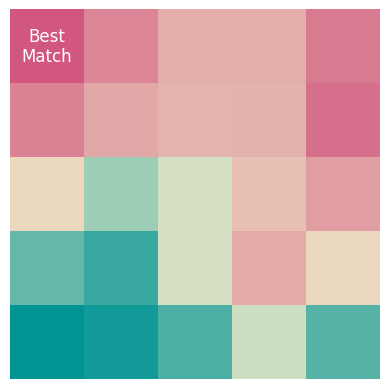

Best Match - Index: (2, 4), Content: I'm an editor at Vogue. I travel a lot. I was at Lake Como for a photo shoot. That's great... Say hello to your mother. - Mom died three years ago. - I'm sorry. My brother lives here. We're meeting him and my nieces now and we're late. What else did Antía say? Very little. I asked about you, she said you were still living in Madrid, and now look! Yes, I'm still here, and I'm staying here. And did she look well? She had no make-up and she was very thin, but she was pretty. I'm delighted to see you looking so well. Goodbye. She's the mother of an old friend... - Hello? - It's me, let me in. Hello. Are you all right?


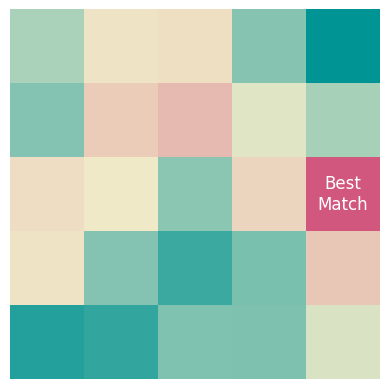

Best Match - Index: (0, 0), Content: I know. I can't believe this conversation. Last night I realized I was fooling myself. I don't want to leave Madrid. And I'd rather be on my own. I always knew there was something important in your life that you never shared with me. You never wanted to talk about it and I always respected that. I'd like you to keep respecting it. - Hello, Inocencio. - Hmm? Miss Julieta! - It's been ages! - Yes, indeed. By chance, have any letters come for me? In all these years? No. I've moved back to Madrid. Is my old apartment free? No. I thought you'd left Spain. Yes, but I've come back, and I miss this street. Is there another apartment free? There's one on the second floor. That's wonderful! Can I see it?


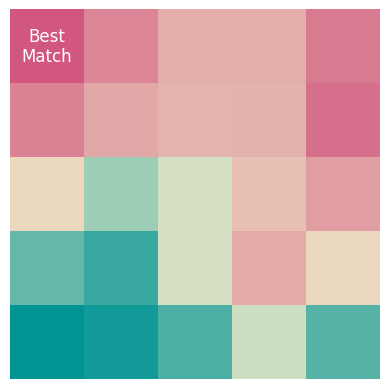

Best Match - Index: (2, 0), Content: Come on, Canelo! Leave it there. We'll go into the kitchen. When did you meet Ana? Ana? I didn't know her. I supposed so. She was in bed the last six years. The sea! It's really striking the first time. Sit down. So you've come to see Xoan. Do you want a cookie? No. I don't think he'll be back tonight. He's with Ava. Do you know Ava? She does ceramics and sculptures. Ana and Ava were good friends, when Ana could still talk or listen. The poor thing was a vegetable, and a man needs a woman. But it's not for me to criticize Xoan. More coffee? - No. - Then give me the cup. So what are you going to do?


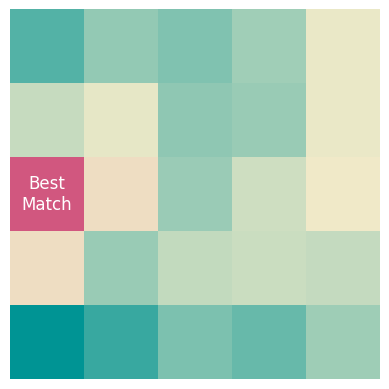

Best Match - Index: (2, 0), Content: Come on, Canelo! Leave it there. We'll go into the kitchen. When did you meet Ana? Ana? I didn't know her. I supposed so. She was in bed the last six years. The sea! It's really striking the first time. Sit down. So you've come to see Xoan. Do you want a cookie? No. I don't think he'll be back tonight. He's with Ava. Do you know Ava? She does ceramics and sculptures. Ana and Ava were good friends, when Ana could still talk or listen. The poor thing was a vegetable, and a man needs a woman. But it's not for me to criticize Xoan. More coffee? - No. - Then give me the cup. So what are you going to do?


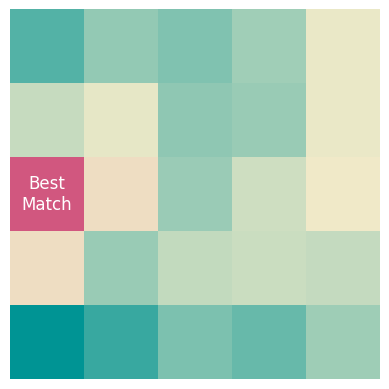

Best Match - Index: (2, 4), Content: I'm an editor at Vogue. I travel a lot. I was at Lake Como for a photo shoot. That's great... Say hello to your mother. - Mom died three years ago. - I'm sorry. My brother lives here. We're meeting him and my nieces now and we're late. What else did Antía say? Very little. I asked about you, she said you were still living in Madrid, and now look! Yes, I'm still here, and I'm staying here. And did she look well? She had no make-up and she was very thin, but she was pretty. I'm delighted to see you looking so well. Goodbye. She's the mother of an old friend... - Hello? - It's me, let me in. Hello. Are you all right?


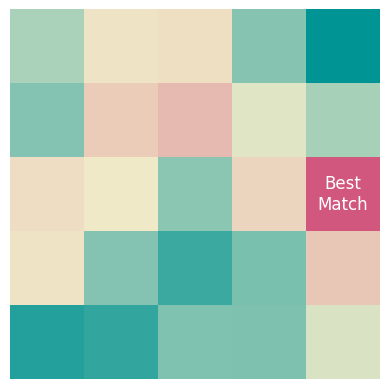

Best Match - Index: (2, 4), Content: I'm an editor at Vogue. I travel a lot. I was at Lake Como for a photo shoot. That's great... Say hello to your mother. - Mom died three years ago. - I'm sorry. My brother lives here. We're meeting him and my nieces now and we're late. What else did Antía say? Very little. I asked about you, she said you were still living in Madrid, and now look! Yes, I'm still here, and I'm staying here. And did she look well? She had no make-up and she was very thin, but she was pretty. I'm delighted to see you looking so well. Goodbye. She's the mother of an old friend... - Hello? - It's me, let me in. Hello. Are you all right?


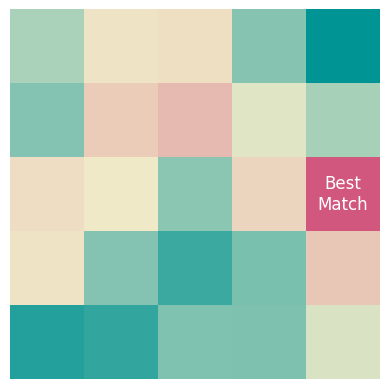

Best Match - Index: (0, 0), Content: I know. I can't believe this conversation. Last night I realized I was fooling myself. I don't want to leave Madrid. And I'd rather be on my own. I always knew there was something important in your life that you never shared with me. You never wanted to talk about it and I always respected that. I'd like you to keep respecting it. - Hello, Inocencio. - Hmm? Miss Julieta! - It's been ages! - Yes, indeed. By chance, have any letters come for me? In all these years? No. I've moved back to Madrid. Is my old apartment free? No. I thought you'd left Spain. Yes, but I've come back, and I miss this street. Is there another apartment free? There's one on the second floor. That's wonderful! Can I see it?


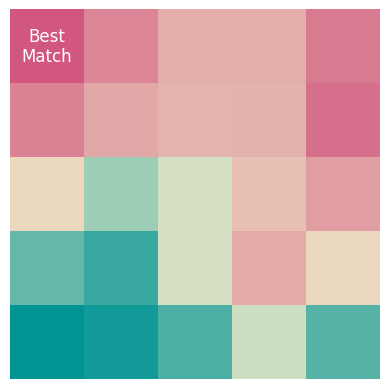

Best Match - Index: (2, 0), Content: Come on, Canelo! Leave it there. We'll go into the kitchen. When did you meet Ana? Ana? I didn't know her. I supposed so. She was in bed the last six years. The sea! It's really striking the first time. Sit down. So you've come to see Xoan. Do you want a cookie? No. I don't think he'll be back tonight. He's with Ava. Do you know Ava? She does ceramics and sculptures. Ana and Ava were good friends, when Ana could still talk or listen. The poor thing was a vegetable, and a man needs a woman. But it's not for me to criticize Xoan. More coffee? - No. - Then give me the cup. So what are you going to do?


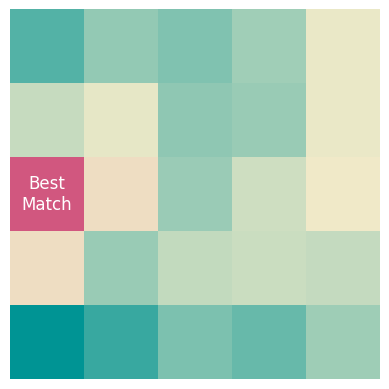

Best Match - Index: (0, 0), Content: I know. I can't believe this conversation. Last night I realized I was fooling myself. I don't want to leave Madrid. And I'd rather be on my own. I always knew there was something important in your life that you never shared with me. You never wanted to talk about it and I always respected that. I'd like you to keep respecting it. - Hello, Inocencio. - Hmm? Miss Julieta! - It's been ages! - Yes, indeed. By chance, have any letters come for me? In all these years? No. I've moved back to Madrid. Is my old apartment free? No. I thought you'd left Spain. Yes, but I've come back, and I miss this street. Is there another apartment free? There's one on the second floor. That's wonderful! Can I see it?


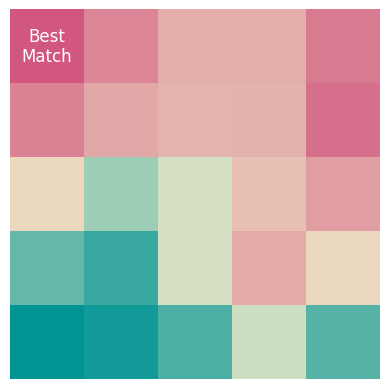

In [ ]:
import re

best_subtitle_list = []

for i in related_image_list2:
    # input
    input_sentence = i

    # vectorize
    vectorized_input_sentence = movie_model.vectorize(input_sentence)
    vectorized_input_sentence = np.squeeze(vectorized_input_sentence)

    # activate
    activated_SOM = SOMlib.activate(SOM, vectorized_input_sentence)

    # beat match
    best_match_index = np.unravel_index(np.argmax(activated_SOM), activated_SOM.shape)
    best_subtitle = neuron_word_mapping[best_match_index][0]["paragraph"]
    best_subtitle_list.append(best_subtitle)

    # clear the title
    plt.title('')

    # visualize
    plt.imshow(activated_SOM, cmap=cmap_diverging, interpolation='none')
    plt.axis('off')

    # mark
    plt.text(best_match_index[1], best_match_index[0], "Best\nMatch", color='white', fontsize=12, ha='center', va='center')

    print(f"Best Match - Index: {best_match_index}, Content: {best_subtitle}")

    plt.show()


In [ ]:
import os
import re

# My data set is too small, so here I extract the first 3 words from best_subtitle_list to search
# in order to get more content
keywords = [' '.join(sentence.split()[:2]) for sentence in best_subtitle_list]
print(keywords)

['I know.', "I'm an", 'I know.', 'Come on,', 'Come on,', "I'm an", "I'm an", 'I know.', 'Come on,', 'I know.']


In [ ]:
import pickle

load_path = "/content/drive/MyDrive/screenshotsPairs.pkl"

with open(load_path, 'rb') as f:
    screenshotsPairs = pickle.load(f)

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

image_folder = "/content/drive/MyDrive/filmshot"


for keyword in keywords:
    print(f"Keyword: {keyword}")
    matching_images = [screenshot['image'] for screenshot in screenshotsPairs if keyword in screenshot['paragraph']]
    selected_images = random.sample(matching_images, min(3, len(matching_images)))
    for image_name in selected_images:
        image_path = os.path.join(image_folder, image_name)
        if os.path.exists(image_path):
            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(f"Keyword: {keyword}, Image: {image_name}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image {image_name} not found.")


Output hidden; open in https://colab.research.google.com to view.